In [1]:
import warnings
from IPython.utils import io
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


with io.capture_output() as captured:
    import sys

    import matplotlib.pyplot as plt
    import mbuild
    import nglview
    import mdtraj

    from tqdm import tqdm
    from rdkit import Chem
    from rdkit.Chem import Draw

    import openmm
    from openff import toolkit, utilities, interchange, models
    from openff.toolkit import topology 
    from openff.units import unit
    from openff.interchange.components._packmol import UNIT_CUBE, pack_box

In [2]:
molecules_rdkit = dict(
    ocm2=Chem.MolFromSmiles('CC(C(OCCOC(OCCOCCOC(OCCOC(C(C)=C)=O)=O)=O)=O)=C'),
    dmag=Chem.MolFromSmiles('C=C(C)C(OCCOC(C(C)=C)=O)=O'),
    peta=Chem.MolFromSmiles('C=CC(OCC(COC(C=C)=O)(COC(C=C)=O)CO)=O'),
    butanol1=Chem.MolFromSmiles('OCCCC'),
)


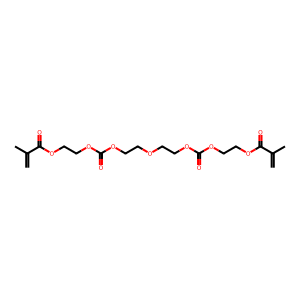

In [3]:
Draw.MolToImage(molecules_rdkit['ocm2'])

In [12]:
molecules = {}
for molecule_name, rdkit_mol in molecules_rdkit.items():
    mol = toolkit.Molecule.from_rdkit(rdkit_mol)
    molecules[molecule_name] = mol
    mol.generate_conformers(n_conformers=1)
    mol.name = molecule_name

    for atom in mol.atoms:
        atom.metadata["residue_name"]=molecule_name[:3].upper()

    mol.add_hierarchy_scheme(iterator_name='residue',uniqueness_criteria=['residue_name'])

In [17]:
with io.capture_output() as captured:    
    a = molecules['peta']
    view= a.visualize(backend='nglview')
view

NGLWidget()

# Parametrize

In [ ]:
# inters = {}
# for key in tqdm(iterable=molecules):

#     mol = molecules[key]
#     mol.assign_partial_charges(
#         partial_charge_method="am1bcc",
#         use_conformers=mol.conformers,
#     )
#     top = mol.to_topology()
#     ff = toolkit.ForceField('openff_unconstrained-2.1.0.offxml')
#     inter = interchange.Interchange.from_smirnoff(
#         force_field=ff,
#         topology=top,
#         charge_from_molecules=[mol],
#         partial_bond_orders_from_molecules=[mol],
#         allow_nonintegral_charges=True,
#     )
#     inters[key] = inter
# topology = {key: mol.to_topology() for key, mol in molecules.items()}

# Pack

In [18]:
box=pack_box(
    molecules=[molecules['ocm2'],molecules['butanol1']],
    number_of_copies=2 * [10],
    mass_density=500 * unit.kilogram / unit.meter**3,
    box_shape=UNIT_CUBE
)

In [20]:
with io.capture_output() as captured:   
    view = box.visualize()
view

NGLWidget()

In [21]:
box.to_file(file='box_top.pdb',ensure_unique_atom_names=True)

In [28]:
box2= toolkit.Topology.from_pdb('box_top.pdb')

UnassignedChemistryInPDBError: Some bonds or atoms in the input could not be identified.

Hint: The following residue names with unassigned atoms were not found in the substructure library. While the OpenFF Toolkit identifies residues by matching chemical substructures rather than by residue name, it currently only supports the 20 'canonical' amino acids.
    UNK


Error: The following 3500 atoms exist in the input but could not be assigned chemical information from the substructure library:
    Atom     0 (C1x) in residue A:UNK#0001
    Atom     1 (C2x) in residue A:UNK#0001
    Atom     2 (C3x) in residue A:UNK#0001
    Atom     3 (O1x) in residue A:UNK#0001
    Atom     4 (C4x) in residue A:UNK#0001
    Atom     5 (C5x) in residue A:UNK#0001
    Atom     6 (O2x) in residue A:UNK#0001
    Atom     7 (C6x) in residue A:UNK#0001
    Atom     8 (O3x) in residue A:UNK#0001
    Atom     9 (C7x) in residue A:UNK#0001
    Atom    10 (C8x) in residue A:UNK#0001
    Atom    11 (O4x) in residue A:UNK#0001
    Atom    12 (C9x) in residue A:UNK#0001
    Atom    13 (C10x) in residue A:UNK#0001
    Atom    14 (O5x) in residue A:UNK#0001
    Atom    15 (C11x) in residue A:UNK#0001
    Atom    16 (O6x) in residue A:UNK#0001
    Atom    17 (C12x) in residue A:UNK#0001
    Atom    18 (C13x) in residue A:UNK#0001
    Atom    19 (O7x) in residue A:UNK#0001
    Atom    20 (C14x) in residue A:UNK#0001
    Atom    21 (C15x) in residue A:UNK#0001
    Atom    22 (C16x) in residue A:UNK#0001
    Atom    23 (C17x) in residue A:UNK#0001
    Atom    24 (O8x) in residue A:UNK#0001
    Atom    25 (O9x) in residue A:UNK#0001
    Atom    26 (O10x) in residue A:UNK#0001
    Atom    27 (O11x) in residue A:UNK#0001
    Atom    28 (C18x) in residue A:UNK#0001
    Atom    29 (H1x) in residue A:UNK#0001
    Atom    30 (H2x) in residue A:UNK#0001
    Atom    31 (H3x) in residue A:UNK#0001
    Atom    32 (H4x) in residue A:UNK#0001
    Atom    33 (H5x) in residue A:UNK#0001
    Atom    34 (H6x) in residue A:UNK#0001
    Atom    35 (H7x) in residue A:UNK#0001
    Atom    36 (H8x) in residue A:UNK#0001
    Atom    37 (H9x) in residue A:UNK#0001
    Atom    38 (H10x) in residue A:UNK#0001
    Atom    39 (H11x) in residue A:UNK#0001
    Atom    40 (H12x) in residue A:UNK#0001
    Atom    41 (H13x) in residue A:UNK#0001
    Atom    42 (H14x) in residue A:UNK#0001
    Atom    43 (H15x) in residue A:UNK#0001
    Atom    44 (H16x) in residue A:UNK#0001
    Atom    45 (H17x) in residue A:UNK#0001
    Atom    46 (H18x) in residue A:UNK#0001
    Atom    47 (H19x) in residue A:UNK#0001
    Atom    48 (H20x) in residue A:UNK#0001
    Atom    49 (H21x) in residue A:UNK#0001
    Atom    50 (H22x) in residue A:UNK#0001
    Atom    51 (H23x) in residue A:UNK#0001
    Atom    52 (H24x) in residue A:UNK#0001
    Atom    53 (H25x) in residue A:UNK#0001
    Atom    54 (H26x) in residue A:UNK#0001
    Atom    55 (C1x) in residue B:UNK#0001
    Atom    56 (C2x) in residue B:UNK#0001
    Atom    57 (C3x) in residue B:UNK#0001
    Atom    58 (O1x) in residue B:UNK#0001
    Atom    59 (C4x) in residue B:UNK#0001
    Atom    60 (C5x) in residue B:UNK#0001
    Atom    61 (O2x) in residue B:UNK#0001
    Atom    62 (C6x) in residue B:UNK#0001
    Atom    63 (O3x) in residue B:UNK#0001
    Atom    64 (C7x) in residue B:UNK#0001
    Atom    65 (C8x) in residue B:UNK#0001
    Atom    66 (O4x) in residue B:UNK#0001
    Atom    67 (C9x) in residue B:UNK#0001
    Atom    68 (C10x) in residue B:UNK#0001
    Atom    69 (O5x) in residue B:UNK#0001
    Atom    70 (C11x) in residue B:UNK#0001
    Atom    71 (O6x) in residue B:UNK#0001
    Atom    72 (C12x) in residue B:UNK#0001
    Atom    73 (C13x) in residue B:UNK#0001
    Atom    74 (O7x) in residue B:UNK#0001
    Atom    75 (C14x) in residue B:UNK#0001
    Atom    76 (C15x) in residue B:UNK#0001
    Atom    77 (C16x) in residue B:UNK#0001
    Atom    78 (C17x) in residue B:UNK#0001
    Atom    79 (O8x) in residue B:UNK#0001
    Atom    80 (O9x) in residue B:UNK#0001
    Atom    81 (O10x) in residue B:UNK#0001
    Atom    82 (O11x) in residue B:UNK#0001
    Atom    83 (C18x) in residue B:UNK#0001
    Atom    84 (H1x) in residue B:UNK#0001
    Atom    85 (H2x) in residue B:UNK#0001
    Atom    86 (H3x) in residue B:UNK#0001
    Atom    87 (H4x) in residue B:UNK#0001
    Atom    88 (H5x) in residue B:UNK#0001
    Atom    89 (H6x) in residue B:UNK#0001
    Atom    90 (H7x) in residue B:UNK#0001
    Atom    91 (H8x) in residue B:UNK#0001
    Atom    92 (H9x) in residue B:UNK#0001
    Atom    93 (H10x) in residue B:UNK#0001
    Atom    94 (H11x) in residue B:UNK#0001
    Atom    95 (H12x) in residue B:UNK#0001
    Atom    96 (H13x) in residue B:UNK#0001
    Atom    97 (H14x) in residue B:UNK#0001
    Atom    98 (H15x) in residue B:UNK#0001
    Atom    99 (H16x) in residue B:UNK#0001
    Atom   100 (H17x) in residue B:UNK#0001
    Atom   101 (H18x) in residue B:UNK#0001
    Atom   102 (H19x) in residue B:UNK#0001
    Atom   103 (H20x) in residue B:UNK#0001
    Atom   104 (H21x) in residue B:UNK#0001
    Atom   105 (H22x) in residue B:UNK#0001
    Atom   106 (H23x) in residue B:UNK#0001
    Atom   107 (H24x) in residue B:UNK#0001
    Atom   108 (H25x) in residue B:UNK#0001
    Atom   109 (H26x) in residue B:UNK#0001
    Atom   110 (C1x) in residue C:UNK#0001
    Atom   111 (C2x) in residue C:UNK#0001
    Atom   112 (C3x) in residue C:UNK#0001
    Atom   113 (O1x) in residue C:UNK#0001
    Atom   114 (C4x) in residue C:UNK#0001
    Atom   115 (C5x) in residue C:UNK#0001
    Atom   116 (O2x) in residue C:UNK#0001
    Atom   117 (C6x) in residue C:UNK#0001
    Atom   118 (O3x) in residue C:UNK#0001
    Atom   119 (C7x) in residue C:UNK#0001
    Atom   120 (C8x) in residue C:UNK#0001
    Atom   121 (O4x) in residue C:UNK#0001
    Atom   122 (C9x) in residue C:UNK#0001
    Atom   123 (C10x) in residue C:UNK#0001
    Atom   124 (O5x) in residue C:UNK#0001
    Atom   125 (C11x) in residue C:UNK#0001
    Atom   126 (O6x) in residue C:UNK#0001
    Atom   127 (C12x) in residue C:UNK#0001
    Atom   128 (C13x) in residue C:UNK#0001
    Atom   129 (O7x) in residue C:UNK#0001
    Atom   130 (C14x) in residue C:UNK#0001
    Atom   131 (C15x) in residue C:UNK#0001
    Atom   132 (C16x) in residue C:UNK#0001
    Atom   133 (C17x) in residue C:UNK#0001
    Atom   134 (O8x) in residue C:UNK#0001
    Atom   135 (O9x) in residue C:UNK#0001
    Atom   136 (O10x) in residue C:UNK#0001
    Atom   137 (O11x) in residue C:UNK#0001
    Atom   138 (C18x) in residue C:UNK#0001
    Atom   139 (H1x) in residue C:UNK#0001
    Atom   140 (H2x) in residue C:UNK#0001
    Atom   141 (H3x) in residue C:UNK#0001
    Atom   142 (H4x) in residue C:UNK#0001
    Atom   143 (H5x) in residue C:UNK#0001
    Atom   144 (H6x) in residue C:UNK#0001
    Atom   145 (H7x) in residue C:UNK#0001
    Atom   146 (H8x) in residue C:UNK#0001
    Atom   147 (H9x) in residue C:UNK#0001
    Atom   148 (H10x) in residue C:UNK#0001
    Atom   149 (H11x) in residue C:UNK#0001
    Atom   150 (H12x) in residue C:UNK#0001
    Atom   151 (H13x) in residue C:UNK#0001
    Atom   152 (H14x) in residue C:UNK#0001
    Atom   153 (H15x) in residue C:UNK#0001
    Atom   154 (H16x) in residue C:UNK#0001
    Atom   155 (H17x) in residue C:UNK#0001
    Atom   156 (H18x) in residue C:UNK#0001
    Atom   157 (H19x) in residue C:UNK#0001
    Atom   158 (H20x) in residue C:UNK#0001
    Atom   159 (H21x) in residue C:UNK#0001
    Atom   160 (H22x) in residue C:UNK#0001
    Atom   161 (H23x) in residue C:UNK#0001
    Atom   162 (H24x) in residue C:UNK#0001
    Atom   163 (H25x) in residue C:UNK#0001
    Atom   164 (H26x) in residue C:UNK#0001
    Atom   165 (C1x) in residue D:UNK#0001
    Atom   166 (C2x) in residue D:UNK#0001
    Atom   167 (C3x) in residue D:UNK#0001
    Atom   168 (O1x) in residue D:UNK#0001
    Atom   169 (C4x) in residue D:UNK#0001
    Atom   170 (C5x) in residue D:UNK#0001
    Atom   171 (O2x) in residue D:UNK#0001
    Atom   172 (C6x) in residue D:UNK#0001
    Atom   173 (O3x) in residue D:UNK#0001
    Atom   174 (C7x) in residue D:UNK#0001
    Atom   175 (C8x) in residue D:UNK#0001
    Atom   176 (O4x) in residue D:UNK#0001
    Atom   177 (C9x) in residue D:UNK#0001
    Atom   178 (C10x) in residue D:UNK#0001
    Atom   179 (O5x) in residue D:UNK#0001
    Atom   180 (C11x) in residue D:UNK#0001
    Atom   181 (O6x) in residue D:UNK#0001
    Atom   182 (C12x) in residue D:UNK#0001
    Atom   183 (C13x) in residue D:UNK#0001
    Atom   184 (O7x) in residue D:UNK#0001
    Atom   185 (C14x) in residue D:UNK#0001
    Atom   186 (C15x) in residue D:UNK#0001
    Atom   187 (C16x) in residue D:UNK#0001
    Atom   188 (C17x) in residue D:UNK#0001
    Atom   189 (O8x) in residue D:UNK#0001
    Atom   190 (O9x) in residue D:UNK#0001
    Atom   191 (O10x) in residue D:UNK#0001
    Atom   192 (O11x) in residue D:UNK#0001
    Atom   193 (C18x) in residue D:UNK#0001
    Atom   194 (H1x) in residue D:UNK#0001
    Atom   195 (H2x) in residue D:UNK#0001
    Atom   196 (H3x) in residue D:UNK#0001
    Atom   197 (H4x) in residue D:UNK#0001
    Atom   198 (H5x) in residue D:UNK#0001
    Atom   199 (H6x) in residue D:UNK#0001
    Atom   200 (H7x) in residue D:UNK#0001
    Atom   201 (H8x) in residue D:UNK#0001
    Atom   202 (H9x) in residue D:UNK#0001
    Atom   203 (H10x) in residue D:UNK#0001
    Atom   204 (H11x) in residue D:UNK#0001
    Atom   205 (H12x) in residue D:UNK#0001
    Atom   206 (H13x) in residue D:UNK#0001
    Atom   207 (H14x) in residue D:UNK#0001
    Atom   208 (H15x) in residue D:UNK#0001
    Atom   209 (H16x) in residue D:UNK#0001
    Atom   210 (H17x) in residue D:UNK#0001
    Atom   211 (H18x) in residue D:UNK#0001
    Atom   212 (H19x) in residue D:UNK#0001
    Atom   213 (H20x) in residue D:UNK#0001
    Atom   214 (H21x) in residue D:UNK#0001
    Atom   215 (H22x) in residue D:UNK#0001
    Atom   216 (H23x) in residue D:UNK#0001
    Atom   217 (H24x) in residue D:UNK#0001
    Atom   218 (H25x) in residue D:UNK#0001
    Atom   219 (H26x) in residue D:UNK#0001
    Atom   220 (C1x) in residue E:UNK#0001
    Atom   221 (C2x) in residue E:UNK#0001
    Atom   222 (C3x) in residue E:UNK#0001
    Atom   223 (O1x) in residue E:UNK#0001
    Atom   224 (C4x) in residue E:UNK#0001
    Atom   225 (C5x) in residue E:UNK#0001
    Atom   226 (O2x) in residue E:UNK#0001
    Atom   227 (C6x) in residue E:UNK#0001
    Atom   228 (O3x) in residue E:UNK#0001
    Atom   229 (C7x) in residue E:UNK#0001
    Atom   230 (C8x) in residue E:UNK#0001
    Atom   231 (O4x) in residue E:UNK#0001
    Atom   232 (C9x) in residue E:UNK#0001
    Atom   233 (C10x) in residue E:UNK#0001
    Atom   234 (O5x) in residue E:UNK#0001
    Atom   235 (C11x) in residue E:UNK#0001
    Atom   236 (O6x) in residue E:UNK#0001
    Atom   237 (C12x) in residue E:UNK#0001
    Atom   238 (C13x) in residue E:UNK#0001
    Atom   239 (O7x) in residue E:UNK#0001
    Atom   240 (C14x) in residue E:UNK#0001
    Atom   241 (C15x) in residue E:UNK#0001
    Atom   242 (C16x) in residue E:UNK#0001
    Atom   243 (C17x) in residue E:UNK#0001
    Atom   244 (O8x) in residue E:UNK#0001
    Atom   245 (O9x) in residue E:UNK#0001
    Atom   246 (O10x) in residue E:UNK#0001
    Atom   247 (O11x) in residue E:UNK#0001
    Atom   248 (C18x) in residue E:UNK#0001
    Atom   249 (H1x) in residue E:UNK#0001
    Atom   250 (H2x) in residue E:UNK#0001
    Atom   251 (H3x) in residue E:UNK#0001
    Atom   252 (H4x) in residue E:UNK#0001
    Atom   253 (H5x) in residue E:UNK#0001
    Atom   254 (H6x) in residue E:UNK#0001
    Atom   255 (H7x) in residue E:UNK#0001
    Atom   256 (H8x) in residue E:UNK#0001
    Atom   257 (H9x) in residue E:UNK#0001
    Atom   258 (H10x) in residue E:UNK#0001
    Atom   259 (H11x) in residue E:UNK#0001
    Atom   260 (H12x) in residue E:UNK#0001
    Atom   261 (H13x) in residue E:UNK#0001
    Atom   262 (H14x) in residue E:UNK#0001
    Atom   263 (H15x) in residue E:UNK#0001
    Atom   264 (H16x) in residue E:UNK#0001
    Atom   265 (H17x) in residue E:UNK#0001
    Atom   266 (H18x) in residue E:UNK#0001
    Atom   267 (H19x) in residue E:UNK#0001
    Atom   268 (H20x) in residue E:UNK#0001
    Atom   269 (H21x) in residue E:UNK#0001
    Atom   270 (H22x) in residue E:UNK#0001
    Atom   271 (H23x) in residue E:UNK#0001
    Atom   272 (H24x) in residue E:UNK#0001
    Atom   273 (H25x) in residue E:UNK#0001
    Atom   274 (H26x) in residue E:UNK#0001
    Atom   275 (C1x) in residue F:UNK#0001
    Atom   276 (C2x) in residue F:UNK#0001
    Atom   277 (C3x) in residue F:UNK#0001
    Atom   278 (O1x) in residue F:UNK#0001
    Atom   279 (C4x) in residue F:UNK#0001
    Atom   280 (C5x) in residue F:UNK#0001
    Atom   281 (O2x) in residue F:UNK#0001
    Atom   282 (C6x) in residue F:UNK#0001
    Atom   283 (O3x) in residue F:UNK#0001
    Atom   284 (C7x) in residue F:UNK#0001
    Atom   285 (C8x) in residue F:UNK#0001
    Atom   286 (O4x) in residue F:UNK#0001
    Atom   287 (C9x) in residue F:UNK#0001
    Atom   288 (C10x) in residue F:UNK#0001
    Atom   289 (O5x) in residue F:UNK#0001
    Atom   290 (C11x) in residue F:UNK#0001
    Atom   291 (O6x) in residue F:UNK#0001
    Atom   292 (C12x) in residue F:UNK#0001
    Atom   293 (C13x) in residue F:UNK#0001
    Atom   294 (O7x) in residue F:UNK#0001
    Atom   295 (C14x) in residue F:UNK#0001
    Atom   296 (C15x) in residue F:UNK#0001
    Atom   297 (C16x) in residue F:UNK#0001
    Atom   298 (C17x) in residue F:UNK#0001
    Atom   299 (O8x) in residue F:UNK#0001
    Atom   300 (O9x) in residue F:UNK#0001
    Atom   301 (O10x) in residue F:UNK#0001
    Atom   302 (O11x) in residue F:UNK#0001
    Atom   303 (C18x) in residue F:UNK#0001
    Atom   304 (H1x) in residue F:UNK#0001
    Atom   305 (H2x) in residue F:UNK#0001
    Atom   306 (H3x) in residue F:UNK#0001
    Atom   307 (H4x) in residue F:UNK#0001
    Atom   308 (H5x) in residue F:UNK#0001
    Atom   309 (H6x) in residue F:UNK#0001
    Atom   310 (H7x) in residue F:UNK#0001
    Atom   311 (H8x) in residue F:UNK#0001
    Atom   312 (H9x) in residue F:UNK#0001
    Atom   313 (H10x) in residue F:UNK#0001
    Atom   314 (H11x) in residue F:UNK#0001
    Atom   315 (H12x) in residue F:UNK#0001
    Atom   316 (H13x) in residue F:UNK#0001
    Atom   317 (H14x) in residue F:UNK#0001
    Atom   318 (H15x) in residue F:UNK#0001
    Atom   319 (H16x) in residue F:UNK#0001
    Atom   320 (H17x) in residue F:UNK#0001
    Atom   321 (H18x) in residue F:UNK#0001
    Atom   322 (H19x) in residue F:UNK#0001
    Atom   323 (H20x) in residue F:UNK#0001
    Atom   324 (H21x) in residue F:UNK#0001
    Atom   325 (H22x) in residue F:UNK#0001
    Atom   326 (H23x) in residue F:UNK#0001
    Atom   327 (H24x) in residue F:UNK#0001
    Atom   328 (H25x) in residue F:UNK#0001
    Atom   329 (H26x) in residue F:UNK#0001
    Atom   330 (C1x) in residue G:UNK#0001
    Atom   331 (C2x) in residue G:UNK#0001
    Atom   332 (C3x) in residue G:UNK#0001
    Atom   333 (O1x) in residue G:UNK#0001
    Atom   334 (C4x) in residue G:UNK#0001
    Atom   335 (C5x) in residue G:UNK#0001
    Atom   336 (O2x) in residue G:UNK#0001
    Atom   337 (C6x) in residue G:UNK#0001
    Atom   338 (O3x) in residue G:UNK#0001
    Atom   339 (C7x) in residue G:UNK#0001
    Atom   340 (C8x) in residue G:UNK#0001
    Atom   341 (O4x) in residue G:UNK#0001
    Atom   342 (C9x) in residue G:UNK#0001
    Atom   343 (C10x) in residue G:UNK#0001
    Atom   344 (O5x) in residue G:UNK#0001
    Atom   345 (C11x) in residue G:UNK#0001
    Atom   346 (O6x) in residue G:UNK#0001
    Atom   347 (C12x) in residue G:UNK#0001
    Atom   348 (C13x) in residue G:UNK#0001
    Atom   349 (O7x) in residue G:UNK#0001
    Atom   350 (C14x) in residue G:UNK#0001
    Atom   351 (C15x) in residue G:UNK#0001
    Atom   352 (C16x) in residue G:UNK#0001
    Atom   353 (C17x) in residue G:UNK#0001
    Atom   354 (O8x) in residue G:UNK#0001
    Atom   355 (O9x) in residue G:UNK#0001
    Atom   356 (O10x) in residue G:UNK#0001
    Atom   357 (O11x) in residue G:UNK#0001
    Atom   358 (C18x) in residue G:UNK#0001
    Atom   359 (H1x) in residue G:UNK#0001
    Atom   360 (H2x) in residue G:UNK#0001
    Atom   361 (H3x) in residue G:UNK#0001
    Atom   362 (H4x) in residue G:UNK#0001
    Atom   363 (H5x) in residue G:UNK#0001
    Atom   364 (H6x) in residue G:UNK#0001
    Atom   365 (H7x) in residue G:UNK#0001
    Atom   366 (H8x) in residue G:UNK#0001
    Atom   367 (H9x) in residue G:UNK#0001
    Atom   368 (H10x) in residue G:UNK#0001
    Atom   369 (H11x) in residue G:UNK#0001
    Atom   370 (H12x) in residue G:UNK#0001
    Atom   371 (H13x) in residue G:UNK#0001
    Atom   372 (H14x) in residue G:UNK#0001
    Atom   373 (H15x) in residue G:UNK#0001
    Atom   374 (H16x) in residue G:UNK#0001
    Atom   375 (H17x) in residue G:UNK#0001
    Atom   376 (H18x) in residue G:UNK#0001
    Atom   377 (H19x) in residue G:UNK#0001
    Atom   378 (H20x) in residue G:UNK#0001
    Atom   379 (H21x) in residue G:UNK#0001
    Atom   380 (H22x) in residue G:UNK#0001
    Atom   381 (H23x) in residue G:UNK#0001
    Atom   382 (H24x) in residue G:UNK#0001
    Atom   383 (H25x) in residue G:UNK#0001
    Atom   384 (H26x) in residue G:UNK#0001
    Atom   385 (C1x) in residue H:UNK#0001
    Atom   386 (C2x) in residue H:UNK#0001
    Atom   387 (C3x) in residue H:UNK#0001
    Atom   388 (O1x) in residue H:UNK#0001
    Atom   389 (C4x) in residue H:UNK#0001
    Atom   390 (C5x) in residue H:UNK#0001
    Atom   391 (O2x) in residue H:UNK#0001
    Atom   392 (C6x) in residue H:UNK#0001
    Atom   393 (O3x) in residue H:UNK#0001
    Atom   394 (C7x) in residue H:UNK#0001
    Atom   395 (C8x) in residue H:UNK#0001
    Atom   396 (O4x) in residue H:UNK#0001
    Atom   397 (C9x) in residue H:UNK#0001
    Atom   398 (C10x) in residue H:UNK#0001
    Atom   399 (O5x) in residue H:UNK#0001
    Atom   400 (C11x) in residue H:UNK#0001
    Atom   401 (O6x) in residue H:UNK#0001
    Atom   402 (C12x) in residue H:UNK#0001
    Atom   403 (C13x) in residue H:UNK#0001
    Atom   404 (O7x) in residue H:UNK#0001
    Atom   405 (C14x) in residue H:UNK#0001
    Atom   406 (C15x) in residue H:UNK#0001
    Atom   407 (C16x) in residue H:UNK#0001
    Atom   408 (C17x) in residue H:UNK#0001
    Atom   409 (O8x) in residue H:UNK#0001
    Atom   410 (O9x) in residue H:UNK#0001
    Atom   411 (O10x) in residue H:UNK#0001
    Atom   412 (O11x) in residue H:UNK#0001
    Atom   413 (C18x) in residue H:UNK#0001
    Atom   414 (H1x) in residue H:UNK#0001
    Atom   415 (H2x) in residue H:UNK#0001
    Atom   416 (H3x) in residue H:UNK#0001
    Atom   417 (H4x) in residue H:UNK#0001
    Atom   418 (H5x) in residue H:UNK#0001
    Atom   419 (H6x) in residue H:UNK#0001
    Atom   420 (H7x) in residue H:UNK#0001
    Atom   421 (H8x) in residue H:UNK#0001
    Atom   422 (H9x) in residue H:UNK#0001
    Atom   423 (H10x) in residue H:UNK#0001
    Atom   424 (H11x) in residue H:UNK#0001
    Atom   425 (H12x) in residue H:UNK#0001
    Atom   426 (H13x) in residue H:UNK#0001
    Atom   427 (H14x) in residue H:UNK#0001
    Atom   428 (H15x) in residue H:UNK#0001
    Atom   429 (H16x) in residue H:UNK#0001
    Atom   430 (H17x) in residue H:UNK#0001
    Atom   431 (H18x) in residue H:UNK#0001
    Atom   432 (H19x) in residue H:UNK#0001
    Atom   433 (H20x) in residue H:UNK#0001
    Atom   434 (H21x) in residue H:UNK#0001
    Atom   435 (H22x) in residue H:UNK#0001
    Atom   436 (H23x) in residue H:UNK#0001
    Atom   437 (H24x) in residue H:UNK#0001
    Atom   438 (H25x) in residue H:UNK#0001
    Atom   439 (H26x) in residue H:UNK#0001
    Atom   440 (C1x) in residue I:UNK#0001
    Atom   441 (C2x) in residue I:UNK#0001
    Atom   442 (C3x) in residue I:UNK#0001
    Atom   443 (O1x) in residue I:UNK#0001
    Atom   444 (C4x) in residue I:UNK#0001
    Atom   445 (C5x) in residue I:UNK#0001
    Atom   446 (O2x) in residue I:UNK#0001
    Atom   447 (C6x) in residue I:UNK#0001
    Atom   448 (O3x) in residue I:UNK#0001
    Atom   449 (C7x) in residue I:UNK#0001
    Atom   450 (C8x) in residue I:UNK#0001
    Atom   451 (O4x) in residue I:UNK#0001
    Atom   452 (C9x) in residue I:UNK#0001
    Atom   453 (C10x) in residue I:UNK#0001
    Atom   454 (O5x) in residue I:UNK#0001
    Atom   455 (C11x) in residue I:UNK#0001
    Atom   456 (O6x) in residue I:UNK#0001
    Atom   457 (C12x) in residue I:UNK#0001
    Atom   458 (C13x) in residue I:UNK#0001
    Atom   459 (O7x) in residue I:UNK#0001
    Atom   460 (C14x) in residue I:UNK#0001
    Atom   461 (C15x) in residue I:UNK#0001
    Atom   462 (C16x) in residue I:UNK#0001
    Atom   463 (C17x) in residue I:UNK#0001
    Atom   464 (O8x) in residue I:UNK#0001
    Atom   465 (O9x) in residue I:UNK#0001
    Atom   466 (O10x) in residue I:UNK#0001
    Atom   467 (O11x) in residue I:UNK#0001
    Atom   468 (C18x) in residue I:UNK#0001
    Atom   469 (H1x) in residue I:UNK#0001
    Atom   470 (H2x) in residue I:UNK#0001
    Atom   471 (H3x) in residue I:UNK#0001
    Atom   472 (H4x) in residue I:UNK#0001
    Atom   473 (H5x) in residue I:UNK#0001
    Atom   474 (H6x) in residue I:UNK#0001
    Atom   475 (H7x) in residue I:UNK#0001
    Atom   476 (H8x) in residue I:UNK#0001
    Atom   477 (H9x) in residue I:UNK#0001
    Atom   478 (H10x) in residue I:UNK#0001
    Atom   479 (H11x) in residue I:UNK#0001
    Atom   480 (H12x) in residue I:UNK#0001
    Atom   481 (H13x) in residue I:UNK#0001
    Atom   482 (H14x) in residue I:UNK#0001
    Atom   483 (H15x) in residue I:UNK#0001
    Atom   484 (H16x) in residue I:UNK#0001
    Atom   485 (H17x) in residue I:UNK#0001
    Atom   486 (H18x) in residue I:UNK#0001
    Atom   487 (H19x) in residue I:UNK#0001
    Atom   488 (H20x) in residue I:UNK#0001
    Atom   489 (H21x) in residue I:UNK#0001
    Atom   490 (H22x) in residue I:UNK#0001
    Atom   491 (H23x) in residue I:UNK#0001
    Atom   492 (H24x) in residue I:UNK#0001
    Atom   493 (H25x) in residue I:UNK#0001
    Atom   494 (H26x) in residue I:UNK#0001
    Atom   495 (C1x) in residue J:UNK#0001
    Atom   496 (C2x) in residue J:UNK#0001
    Atom   497 (C3x) in residue J:UNK#0001
    Atom   498 (O1x) in residue J:UNK#0001
    Atom   499 (C4x) in residue J:UNK#0001
    Atom   500 (C5x) in residue J:UNK#0001
    Atom   501 (O2x) in residue J:UNK#0001
    Atom   502 (C6x) in residue J:UNK#0001
    Atom   503 (O3x) in residue J:UNK#0001
    Atom   504 (C7x) in residue J:UNK#0001
    Atom   505 (C8x) in residue J:UNK#0001
    Atom   506 (O4x) in residue J:UNK#0001
    Atom   507 (C9x) in residue J:UNK#0001
    Atom   508 (C10x) in residue J:UNK#0001
    Atom   509 (O5x) in residue J:UNK#0001
    Atom   510 (C11x) in residue J:UNK#0001
    Atom   511 (O6x) in residue J:UNK#0001
    Atom   512 (C12x) in residue J:UNK#0001
    Atom   513 (C13x) in residue J:UNK#0001
    Atom   514 (O7x) in residue J:UNK#0001
    Atom   515 (C14x) in residue J:UNK#0001
    Atom   516 (C15x) in residue J:UNK#0001
    Atom   517 (C16x) in residue J:UNK#0001
    Atom   518 (C17x) in residue J:UNK#0001
    Atom   519 (O8x) in residue J:UNK#0001
    Atom   520 (O9x) in residue J:UNK#0001
    Atom   521 (O10x) in residue J:UNK#0001
    Atom   522 (O11x) in residue J:UNK#0001
    Atom   523 (C18x) in residue J:UNK#0001
    Atom   524 (H1x) in residue J:UNK#0001
    Atom   525 (H2x) in residue J:UNK#0001
    Atom   526 (H3x) in residue J:UNK#0001
    Atom   527 (H4x) in residue J:UNK#0001
    Atom   528 (H5x) in residue J:UNK#0001
    Atom   529 (H6x) in residue J:UNK#0001
    Atom   530 (H7x) in residue J:UNK#0001
    Atom   531 (H8x) in residue J:UNK#0001
    Atom   532 (H9x) in residue J:UNK#0001
    Atom   533 (H10x) in residue J:UNK#0001
    Atom   534 (H11x) in residue J:UNK#0001
    Atom   535 (H12x) in residue J:UNK#0001
    Atom   536 (H13x) in residue J:UNK#0001
    Atom   537 (H14x) in residue J:UNK#0001
    Atom   538 (H15x) in residue J:UNK#0001
    Atom   539 (H16x) in residue J:UNK#0001
    Atom   540 (H17x) in residue J:UNK#0001
    Atom   541 (H18x) in residue J:UNK#0001
    Atom   542 (H19x) in residue J:UNK#0001
    Atom   543 (H20x) in residue J:UNK#0001
    Atom   544 (H21x) in residue J:UNK#0001
    Atom   545 (H22x) in residue J:UNK#0001
    Atom   546 (H23x) in residue J:UNK#0001
    Atom   547 (H24x) in residue J:UNK#0001
    Atom   548 (H25x) in residue J:UNK#0001
    Atom   549 (H26x) in residue J:UNK#0001
    Atom   550 (C1x) in residue K:UNK#0001
    Atom   551 (C2x) in residue K:UNK#0001
    Atom   552 (C3x) in residue K:UNK#0001
    Atom   553 (O1x) in residue K:UNK#0001
    Atom   554 (C4x) in residue K:UNK#0001
    Atom   555 (C5x) in residue K:UNK#0001
    Atom   556 (O2x) in residue K:UNK#0001
    Atom   557 (C6x) in residue K:UNK#0001
    Atom   558 (O3x) in residue K:UNK#0001
    Atom   559 (C7x) in residue K:UNK#0001
    Atom   560 (C8x) in residue K:UNK#0001
    Atom   561 (O4x) in residue K:UNK#0001
    Atom   562 (C9x) in residue K:UNK#0001
    Atom   563 (C10x) in residue K:UNK#0001
    Atom   564 (O5x) in residue K:UNK#0001
    Atom   565 (C11x) in residue K:UNK#0001
    Atom   566 (O6x) in residue K:UNK#0001
    Atom   567 (C12x) in residue K:UNK#0001
    Atom   568 (C13x) in residue K:UNK#0001
    Atom   569 (O7x) in residue K:UNK#0001
    Atom   570 (C14x) in residue K:UNK#0001
    Atom   571 (C15x) in residue K:UNK#0001
    Atom   572 (C16x) in residue K:UNK#0001
    Atom   573 (C17x) in residue K:UNK#0001
    Atom   574 (O8x) in residue K:UNK#0001
    Atom   575 (O9x) in residue K:UNK#0001
    Atom   576 (O10x) in residue K:UNK#0001
    Atom   577 (O11x) in residue K:UNK#0001
    Atom   578 (C18x) in residue K:UNK#0001
    Atom   579 (H1x) in residue K:UNK#0001
    Atom   580 (H2x) in residue K:UNK#0001
    Atom   581 (H3x) in residue K:UNK#0001
    Atom   582 (H4x) in residue K:UNK#0001
    Atom   583 (H5x) in residue K:UNK#0001
    Atom   584 (H6x) in residue K:UNK#0001
    Atom   585 (H7x) in residue K:UNK#0001
    Atom   586 (H8x) in residue K:UNK#0001
    Atom   587 (H9x) in residue K:UNK#0001
    Atom   588 (H10x) in residue K:UNK#0001
    Atom   589 (H11x) in residue K:UNK#0001
    Atom   590 (H12x) in residue K:UNK#0001
    Atom   591 (H13x) in residue K:UNK#0001
    Atom   592 (H14x) in residue K:UNK#0001
    Atom   593 (H15x) in residue K:UNK#0001
    Atom   594 (H16x) in residue K:UNK#0001
    Atom   595 (H17x) in residue K:UNK#0001
    Atom   596 (H18x) in residue K:UNK#0001
    Atom   597 (H19x) in residue K:UNK#0001
    Atom   598 (H20x) in residue K:UNK#0001
    Atom   599 (H21x) in residue K:UNK#0001
    Atom   600 (H22x) in residue K:UNK#0001
    Atom   601 (H23x) in residue K:UNK#0001
    Atom   602 (H24x) in residue K:UNK#0001
    Atom   603 (H25x) in residue K:UNK#0001
    Atom   604 (H26x) in residue K:UNK#0001
    Atom   605 (C1x) in residue L:UNK#0001
    Atom   606 (C2x) in residue L:UNK#0001
    Atom   607 (C3x) in residue L:UNK#0001
    Atom   608 (O1x) in residue L:UNK#0001
    Atom   609 (C4x) in residue L:UNK#0001
    Atom   610 (C5x) in residue L:UNK#0001
    Atom   611 (O2x) in residue L:UNK#0001
    Atom   612 (C6x) in residue L:UNK#0001
    Atom   613 (O3x) in residue L:UNK#0001
    Atom   614 (C7x) in residue L:UNK#0001
    Atom   615 (C8x) in residue L:UNK#0001
    Atom   616 (O4x) in residue L:UNK#0001
    Atom   617 (C9x) in residue L:UNK#0001
    Atom   618 (C10x) in residue L:UNK#0001
    Atom   619 (O5x) in residue L:UNK#0001
    Atom   620 (C11x) in residue L:UNK#0001
    Atom   621 (O6x) in residue L:UNK#0001
    Atom   622 (C12x) in residue L:UNK#0001
    Atom   623 (C13x) in residue L:UNK#0001
    Atom   624 (O7x) in residue L:UNK#0001
    Atom   625 (C14x) in residue L:UNK#0001
    Atom   626 (C15x) in residue L:UNK#0001
    Atom   627 (C16x) in residue L:UNK#0001
    Atom   628 (C17x) in residue L:UNK#0001
    Atom   629 (O8x) in residue L:UNK#0001
    Atom   630 (O9x) in residue L:UNK#0001
    Atom   631 (O10x) in residue L:UNK#0001
    Atom   632 (O11x) in residue L:UNK#0001
    Atom   633 (C18x) in residue L:UNK#0001
    Atom   634 (H1x) in residue L:UNK#0001
    Atom   635 (H2x) in residue L:UNK#0001
    Atom   636 (H3x) in residue L:UNK#0001
    Atom   637 (H4x) in residue L:UNK#0001
    Atom   638 (H5x) in residue L:UNK#0001
    Atom   639 (H6x) in residue L:UNK#0001
    Atom   640 (H7x) in residue L:UNK#0001
    Atom   641 (H8x) in residue L:UNK#0001
    Atom   642 (H9x) in residue L:UNK#0001
    Atom   643 (H10x) in residue L:UNK#0001
    Atom   644 (H11x) in residue L:UNK#0001
    Atom   645 (H12x) in residue L:UNK#0001
    Atom   646 (H13x) in residue L:UNK#0001
    Atom   647 (H14x) in residue L:UNK#0001
    Atom   648 (H15x) in residue L:UNK#0001
    Atom   649 (H16x) in residue L:UNK#0001
    Atom   650 (H17x) in residue L:UNK#0001
    Atom   651 (H18x) in residue L:UNK#0001
    Atom   652 (H19x) in residue L:UNK#0001
    Atom   653 (H20x) in residue L:UNK#0001
    Atom   654 (H21x) in residue L:UNK#0001
    Atom   655 (H22x) in residue L:UNK#0001
    Atom   656 (H23x) in residue L:UNK#0001
    Atom   657 (H24x) in residue L:UNK#0001
    Atom   658 (H25x) in residue L:UNK#0001
    Atom   659 (H26x) in residue L:UNK#0001
    Atom   660 (C1x) in residue M:UNK#0001
    Atom   661 (C2x) in residue M:UNK#0001
    Atom   662 (C3x) in residue M:UNK#0001
    Atom   663 (O1x) in residue M:UNK#0001
    Atom   664 (C4x) in residue M:UNK#0001
    Atom   665 (C5x) in residue M:UNK#0001
    Atom   666 (O2x) in residue M:UNK#0001
    Atom   667 (C6x) in residue M:UNK#0001
    Atom   668 (O3x) in residue M:UNK#0001
    Atom   669 (C7x) in residue M:UNK#0001
    Atom   670 (C8x) in residue M:UNK#0001
    Atom   671 (O4x) in residue M:UNK#0001
    Atom   672 (C9x) in residue M:UNK#0001
    Atom   673 (C10x) in residue M:UNK#0001
    Atom   674 (O5x) in residue M:UNK#0001
    Atom   675 (C11x) in residue M:UNK#0001
    Atom   676 (O6x) in residue M:UNK#0001
    Atom   677 (C12x) in residue M:UNK#0001
    Atom   678 (C13x) in residue M:UNK#0001
    Atom   679 (O7x) in residue M:UNK#0001
    Atom   680 (C14x) in residue M:UNK#0001
    Atom   681 (C15x) in residue M:UNK#0001
    Atom   682 (C16x) in residue M:UNK#0001
    Atom   683 (C17x) in residue M:UNK#0001
    Atom   684 (O8x) in residue M:UNK#0001
    Atom   685 (O9x) in residue M:UNK#0001
    Atom   686 (O10x) in residue M:UNK#0001
    Atom   687 (O11x) in residue M:UNK#0001
    Atom   688 (C18x) in residue M:UNK#0001
    Atom   689 (H1x) in residue M:UNK#0001
    Atom   690 (H2x) in residue M:UNK#0001
    Atom   691 (H3x) in residue M:UNK#0001
    Atom   692 (H4x) in residue M:UNK#0001
    Atom   693 (H5x) in residue M:UNK#0001
    Atom   694 (H6x) in residue M:UNK#0001
    Atom   695 (H7x) in residue M:UNK#0001
    Atom   696 (H8x) in residue M:UNK#0001
    Atom   697 (H9x) in residue M:UNK#0001
    Atom   698 (H10x) in residue M:UNK#0001
    Atom   699 (H11x) in residue M:UNK#0001
    Atom   700 (H12x) in residue M:UNK#0001
    Atom   701 (H13x) in residue M:UNK#0001
    Atom   702 (H14x) in residue M:UNK#0001
    Atom   703 (H15x) in residue M:UNK#0001
    Atom   704 (H16x) in residue M:UNK#0001
    Atom   705 (H17x) in residue M:UNK#0001
    Atom   706 (H18x) in residue M:UNK#0001
    Atom   707 (H19x) in residue M:UNK#0001
    Atom   708 (H20x) in residue M:UNK#0001
    Atom   709 (H21x) in residue M:UNK#0001
    Atom   710 (H22x) in residue M:UNK#0001
    Atom   711 (H23x) in residue M:UNK#0001
    Atom   712 (H24x) in residue M:UNK#0001
    Atom   713 (H25x) in residue M:UNK#0001
    Atom   714 (H26x) in residue M:UNK#0001
    Atom   715 (C1x) in residue N:UNK#0001
    Atom   716 (C2x) in residue N:UNK#0001
    Atom   717 (C3x) in residue N:UNK#0001
    Atom   718 (O1x) in residue N:UNK#0001
    Atom   719 (C4x) in residue N:UNK#0001
    Atom   720 (C5x) in residue N:UNK#0001
    Atom   721 (O2x) in residue N:UNK#0001
    Atom   722 (C6x) in residue N:UNK#0001
    Atom   723 (O3x) in residue N:UNK#0001
    Atom   724 (C7x) in residue N:UNK#0001
    Atom   725 (C8x) in residue N:UNK#0001
    Atom   726 (O4x) in residue N:UNK#0001
    Atom   727 (C9x) in residue N:UNK#0001
    Atom   728 (C10x) in residue N:UNK#0001
    Atom   729 (O5x) in residue N:UNK#0001
    Atom   730 (C11x) in residue N:UNK#0001
    Atom   731 (O6x) in residue N:UNK#0001
    Atom   732 (C12x) in residue N:UNK#0001
    Atom   733 (C13x) in residue N:UNK#0001
    Atom   734 (O7x) in residue N:UNK#0001
    Atom   735 (C14x) in residue N:UNK#0001
    Atom   736 (C15x) in residue N:UNK#0001
    Atom   737 (C16x) in residue N:UNK#0001
    Atom   738 (C17x) in residue N:UNK#0001
    Atom   739 (O8x) in residue N:UNK#0001
    Atom   740 (O9x) in residue N:UNK#0001
    Atom   741 (O10x) in residue N:UNK#0001
    Atom   742 (O11x) in residue N:UNK#0001
    Atom   743 (C18x) in residue N:UNK#0001
    Atom   744 (H1x) in residue N:UNK#0001
    Atom   745 (H2x) in residue N:UNK#0001
    Atom   746 (H3x) in residue N:UNK#0001
    Atom   747 (H4x) in residue N:UNK#0001
    Atom   748 (H5x) in residue N:UNK#0001
    Atom   749 (H6x) in residue N:UNK#0001
    Atom   750 (H7x) in residue N:UNK#0001
    Atom   751 (H8x) in residue N:UNK#0001
    Atom   752 (H9x) in residue N:UNK#0001
    Atom   753 (H10x) in residue N:UNK#0001
    Atom   754 (H11x) in residue N:UNK#0001
    Atom   755 (H12x) in residue N:UNK#0001
    Atom   756 (H13x) in residue N:UNK#0001
    Atom   757 (H14x) in residue N:UNK#0001
    Atom   758 (H15x) in residue N:UNK#0001
    Atom   759 (H16x) in residue N:UNK#0001
    Atom   760 (H17x) in residue N:UNK#0001
    Atom   761 (H18x) in residue N:UNK#0001
    Atom   762 (H19x) in residue N:UNK#0001
    Atom   763 (H20x) in residue N:UNK#0001
    Atom   764 (H21x) in residue N:UNK#0001
    Atom   765 (H22x) in residue N:UNK#0001
    Atom   766 (H23x) in residue N:UNK#0001
    Atom   767 (H24x) in residue N:UNK#0001
    Atom   768 (H25x) in residue N:UNK#0001
    Atom   769 (H26x) in residue N:UNK#0001
    Atom   770 (C1x) in residue O:UNK#0001
    Atom   771 (C2x) in residue O:UNK#0001
    Atom   772 (C3x) in residue O:UNK#0001
    Atom   773 (O1x) in residue O:UNK#0001
    Atom   774 (C4x) in residue O:UNK#0001
    Atom   775 (C5x) in residue O:UNK#0001
    Atom   776 (O2x) in residue O:UNK#0001
    Atom   777 (C6x) in residue O:UNK#0001
    Atom   778 (O3x) in residue O:UNK#0001
    Atom   779 (C7x) in residue O:UNK#0001
    Atom   780 (C8x) in residue O:UNK#0001
    Atom   781 (O4x) in residue O:UNK#0001
    Atom   782 (C9x) in residue O:UNK#0001
    Atom   783 (C10x) in residue O:UNK#0001
    Atom   784 (O5x) in residue O:UNK#0001
    Atom   785 (C11x) in residue O:UNK#0001
    Atom   786 (O6x) in residue O:UNK#0001
    Atom   787 (C12x) in residue O:UNK#0001
    Atom   788 (C13x) in residue O:UNK#0001
    Atom   789 (O7x) in residue O:UNK#0001
    Atom   790 (C14x) in residue O:UNK#0001
    Atom   791 (C15x) in residue O:UNK#0001
    Atom   792 (C16x) in residue O:UNK#0001
    Atom   793 (C17x) in residue O:UNK#0001
    Atom   794 (O8x) in residue O:UNK#0001
    Atom   795 (O9x) in residue O:UNK#0001
    Atom   796 (O10x) in residue O:UNK#0001
    Atom   797 (O11x) in residue O:UNK#0001
    Atom   798 (C18x) in residue O:UNK#0001
    Atom   799 (H1x) in residue O:UNK#0001
    Atom   800 (H2x) in residue O:UNK#0001
    Atom   801 (H3x) in residue O:UNK#0001
    Atom   802 (H4x) in residue O:UNK#0001
    Atom   803 (H5x) in residue O:UNK#0001
    Atom   804 (H6x) in residue O:UNK#0001
    Atom   805 (H7x) in residue O:UNK#0001
    Atom   806 (H8x) in residue O:UNK#0001
    Atom   807 (H9x) in residue O:UNK#0001
    Atom   808 (H10x) in residue O:UNK#0001
    Atom   809 (H11x) in residue O:UNK#0001
    Atom   810 (H12x) in residue O:UNK#0001
    Atom   811 (H13x) in residue O:UNK#0001
    Atom   812 (H14x) in residue O:UNK#0001
    Atom   813 (H15x) in residue O:UNK#0001
    Atom   814 (H16x) in residue O:UNK#0001
    Atom   815 (H17x) in residue O:UNK#0001
    Atom   816 (H18x) in residue O:UNK#0001
    Atom   817 (H19x) in residue O:UNK#0001
    Atom   818 (H20x) in residue O:UNK#0001
    Atom   819 (H21x) in residue O:UNK#0001
    Atom   820 (H22x) in residue O:UNK#0001
    Atom   821 (H23x) in residue O:UNK#0001
    Atom   822 (H24x) in residue O:UNK#0001
    Atom   823 (H25x) in residue O:UNK#0001
    Atom   824 (H26x) in residue O:UNK#0001
    Atom   825 (C1x) in residue P:UNK#0001
    Atom   826 (C2x) in residue P:UNK#0001
    Atom   827 (C3x) in residue P:UNK#0001
    Atom   828 (O1x) in residue P:UNK#0001
    Atom   829 (C4x) in residue P:UNK#0001
    Atom   830 (C5x) in residue P:UNK#0001
    Atom   831 (O2x) in residue P:UNK#0001
    Atom   832 (C6x) in residue P:UNK#0001
    Atom   833 (O3x) in residue P:UNK#0001
    Atom   834 (C7x) in residue P:UNK#0001
    Atom   835 (C8x) in residue P:UNK#0001
    Atom   836 (O4x) in residue P:UNK#0001
    Atom   837 (C9x) in residue P:UNK#0001
    Atom   838 (C10x) in residue P:UNK#0001
    Atom   839 (O5x) in residue P:UNK#0001
    Atom   840 (C11x) in residue P:UNK#0001
    Atom   841 (O6x) in residue P:UNK#0001
    Atom   842 (C12x) in residue P:UNK#0001
    Atom   843 (C13x) in residue P:UNK#0001
    Atom   844 (O7x) in residue P:UNK#0001
    Atom   845 (C14x) in residue P:UNK#0001
    Atom   846 (C15x) in residue P:UNK#0001
    Atom   847 (C16x) in residue P:UNK#0001
    Atom   848 (C17x) in residue P:UNK#0001
    Atom   849 (O8x) in residue P:UNK#0001
    Atom   850 (O9x) in residue P:UNK#0001
    Atom   851 (O10x) in residue P:UNK#0001
    Atom   852 (O11x) in residue P:UNK#0001
    Atom   853 (C18x) in residue P:UNK#0001
    Atom   854 (H1x) in residue P:UNK#0001
    Atom   855 (H2x) in residue P:UNK#0001
    Atom   856 (H3x) in residue P:UNK#0001
    Atom   857 (H4x) in residue P:UNK#0001
    Atom   858 (H5x) in residue P:UNK#0001
    Atom   859 (H6x) in residue P:UNK#0001
    Atom   860 (H7x) in residue P:UNK#0001
    Atom   861 (H8x) in residue P:UNK#0001
    Atom   862 (H9x) in residue P:UNK#0001
    Atom   863 (H10x) in residue P:UNK#0001
    Atom   864 (H11x) in residue P:UNK#0001
    Atom   865 (H12x) in residue P:UNK#0001
    Atom   866 (H13x) in residue P:UNK#0001
    Atom   867 (H14x) in residue P:UNK#0001
    Atom   868 (H15x) in residue P:UNK#0001
    Atom   869 (H16x) in residue P:UNK#0001
    Atom   870 (H17x) in residue P:UNK#0001
    Atom   871 (H18x) in residue P:UNK#0001
    Atom   872 (H19x) in residue P:UNK#0001
    Atom   873 (H20x) in residue P:UNK#0001
    Atom   874 (H21x) in residue P:UNK#0001
    Atom   875 (H22x) in residue P:UNK#0001
    Atom   876 (H23x) in residue P:UNK#0001
    Atom   877 (H24x) in residue P:UNK#0001
    Atom   878 (H25x) in residue P:UNK#0001
    Atom   879 (H26x) in residue P:UNK#0001
    Atom   880 (C1x) in residue Q:UNK#0001
    Atom   881 (C2x) in residue Q:UNK#0001
    Atom   882 (C3x) in residue Q:UNK#0001
    Atom   883 (O1x) in residue Q:UNK#0001
    Atom   884 (C4x) in residue Q:UNK#0001
    Atom   885 (C5x) in residue Q:UNK#0001
    Atom   886 (O2x) in residue Q:UNK#0001
    Atom   887 (C6x) in residue Q:UNK#0001
    Atom   888 (O3x) in residue Q:UNK#0001
    Atom   889 (C7x) in residue Q:UNK#0001
    Atom   890 (C8x) in residue Q:UNK#0001
    Atom   891 (O4x) in residue Q:UNK#0001
    Atom   892 (C9x) in residue Q:UNK#0001
    Atom   893 (C10x) in residue Q:UNK#0001
    Atom   894 (O5x) in residue Q:UNK#0001
    Atom   895 (C11x) in residue Q:UNK#0001
    Atom   896 (O6x) in residue Q:UNK#0001
    Atom   897 (C12x) in residue Q:UNK#0001
    Atom   898 (C13x) in residue Q:UNK#0001
    Atom   899 (O7x) in residue Q:UNK#0001
    Atom   900 (C14x) in residue Q:UNK#0001
    Atom   901 (C15x) in residue Q:UNK#0001
    Atom   902 (C16x) in residue Q:UNK#0001
    Atom   903 (C17x) in residue Q:UNK#0001
    Atom   904 (O8x) in residue Q:UNK#0001
    Atom   905 (O9x) in residue Q:UNK#0001
    Atom   906 (O10x) in residue Q:UNK#0001
    Atom   907 (O11x) in residue Q:UNK#0001
    Atom   908 (C18x) in residue Q:UNK#0001
    Atom   909 (H1x) in residue Q:UNK#0001
    Atom   910 (H2x) in residue Q:UNK#0001
    Atom   911 (H3x) in residue Q:UNK#0001
    Atom   912 (H4x) in residue Q:UNK#0001
    Atom   913 (H5x) in residue Q:UNK#0001
    Atom   914 (H6x) in residue Q:UNK#0001
    Atom   915 (H7x) in residue Q:UNK#0001
    Atom   916 (H8x) in residue Q:UNK#0001
    Atom   917 (H9x) in residue Q:UNK#0001
    Atom   918 (H10x) in residue Q:UNK#0001
    Atom   919 (H11x) in residue Q:UNK#0001
    Atom   920 (H12x) in residue Q:UNK#0001
    Atom   921 (H13x) in residue Q:UNK#0001
    Atom   922 (H14x) in residue Q:UNK#0001
    Atom   923 (H15x) in residue Q:UNK#0001
    Atom   924 (H16x) in residue Q:UNK#0001
    Atom   925 (H17x) in residue Q:UNK#0001
    Atom   926 (H18x) in residue Q:UNK#0001
    Atom   927 (H19x) in residue Q:UNK#0001
    Atom   928 (H20x) in residue Q:UNK#0001
    Atom   929 (H21x) in residue Q:UNK#0001
    Atom   930 (H22x) in residue Q:UNK#0001
    Atom   931 (H23x) in residue Q:UNK#0001
    Atom   932 (H24x) in residue Q:UNK#0001
    Atom   933 (H25x) in residue Q:UNK#0001
    Atom   934 (H26x) in residue Q:UNK#0001
    Atom   935 (C1x) in residue R:UNK#0001
    Atom   936 (C2x) in residue R:UNK#0001
    Atom   937 (C3x) in residue R:UNK#0001
    Atom   938 (O1x) in residue R:UNK#0001
    Atom   939 (C4x) in residue R:UNK#0001
    Atom   940 (C5x) in residue R:UNK#0001
    Atom   941 (O2x) in residue R:UNK#0001
    Atom   942 (C6x) in residue R:UNK#0001
    Atom   943 (O3x) in residue R:UNK#0001
    Atom   944 (C7x) in residue R:UNK#0001
    Atom   945 (C8x) in residue R:UNK#0001
    Atom   946 (O4x) in residue R:UNK#0001
    Atom   947 (C9x) in residue R:UNK#0001
    Atom   948 (C10x) in residue R:UNK#0001
    Atom   949 (O5x) in residue R:UNK#0001
    Atom   950 (C11x) in residue R:UNK#0001
    Atom   951 (O6x) in residue R:UNK#0001
    Atom   952 (C12x) in residue R:UNK#0001
    Atom   953 (C13x) in residue R:UNK#0001
    Atom   954 (O7x) in residue R:UNK#0001
    Atom   955 (C14x) in residue R:UNK#0001
    Atom   956 (C15x) in residue R:UNK#0001
    Atom   957 (C16x) in residue R:UNK#0001
    Atom   958 (C17x) in residue R:UNK#0001
    Atom   959 (O8x) in residue R:UNK#0001
    Atom   960 (O9x) in residue R:UNK#0001
    Atom   961 (O10x) in residue R:UNK#0001
    Atom   962 (O11x) in residue R:UNK#0001
    Atom   963 (C18x) in residue R:UNK#0001
    Atom   964 (H1x) in residue R:UNK#0001
    Atom   965 (H2x) in residue R:UNK#0001
    Atom   966 (H3x) in residue R:UNK#0001
    Atom   967 (H4x) in residue R:UNK#0001
    Atom   968 (H5x) in residue R:UNK#0001
    Atom   969 (H6x) in residue R:UNK#0001
    Atom   970 (H7x) in residue R:UNK#0001
    Atom   971 (H8x) in residue R:UNK#0001
    Atom   972 (H9x) in residue R:UNK#0001
    Atom   973 (H10x) in residue R:UNK#0001
    Atom   974 (H11x) in residue R:UNK#0001
    Atom   975 (H12x) in residue R:UNK#0001
    Atom   976 (H13x) in residue R:UNK#0001
    Atom   977 (H14x) in residue R:UNK#0001
    Atom   978 (H15x) in residue R:UNK#0001
    Atom   979 (H16x) in residue R:UNK#0001
    Atom   980 (H17x) in residue R:UNK#0001
    Atom   981 (H18x) in residue R:UNK#0001
    Atom   982 (H19x) in residue R:UNK#0001
    Atom   983 (H20x) in residue R:UNK#0001
    Atom   984 (H21x) in residue R:UNK#0001
    Atom   985 (H22x) in residue R:UNK#0001
    Atom   986 (H23x) in residue R:UNK#0001
    Atom   987 (H24x) in residue R:UNK#0001
    Atom   988 (H25x) in residue R:UNK#0001
    Atom   989 (H26x) in residue R:UNK#0001
    Atom   990 (C1x) in residue S:UNK#0001
    Atom   991 (C2x) in residue S:UNK#0001
    Atom   992 (C3x) in residue S:UNK#0001
    Atom   993 (O1x) in residue S:UNK#0001
    Atom   994 (C4x) in residue S:UNK#0001
    Atom   995 (C5x) in residue S:UNK#0001
    Atom   996 (O2x) in residue S:UNK#0001
    Atom   997 (C6x) in residue S:UNK#0001
    Atom   998 (O3x) in residue S:UNK#0001
    Atom   999 (C7x) in residue S:UNK#0001
    Atom  1000 (C8x) in residue S:UNK#0001
    Atom  1001 (O4x) in residue S:UNK#0001
    Atom  1002 (C9x) in residue S:UNK#0001
    Atom  1003 (C10x) in residue S:UNK#0001
    Atom  1004 (O5x) in residue S:UNK#0001
    Atom  1005 (C11x) in residue S:UNK#0001
    Atom  1006 (O6x) in residue S:UNK#0001
    Atom  1007 (C12x) in residue S:UNK#0001
    Atom  1008 (C13x) in residue S:UNK#0001
    Atom  1009 (O7x) in residue S:UNK#0001
    Atom  1010 (C14x) in residue S:UNK#0001
    Atom  1011 (C15x) in residue S:UNK#0001
    Atom  1012 (C16x) in residue S:UNK#0001
    Atom  1013 (C17x) in residue S:UNK#0001
    Atom  1014 (O8x) in residue S:UNK#0001
    Atom  1015 (O9x) in residue S:UNK#0001
    Atom  1016 (O10x) in residue S:UNK#0001
    Atom  1017 (O11x) in residue S:UNK#0001
    Atom  1018 (C18x) in residue S:UNK#0001
    Atom  1019 (H1x) in residue S:UNK#0001
    Atom  1020 (H2x) in residue S:UNK#0001
    Atom  1021 (H3x) in residue S:UNK#0001
    Atom  1022 (H4x) in residue S:UNK#0001
    Atom  1023 (H5x) in residue S:UNK#0001
    Atom  1024 (H6x) in residue S:UNK#0001
    Atom  1025 (H7x) in residue S:UNK#0001
    Atom  1026 (H8x) in residue S:UNK#0001
    Atom  1027 (H9x) in residue S:UNK#0001
    Atom  1028 (H10x) in residue S:UNK#0001
    Atom  1029 (H11x) in residue S:UNK#0001
    Atom  1030 (H12x) in residue S:UNK#0001
    Atom  1031 (H13x) in residue S:UNK#0001
    Atom  1032 (H14x) in residue S:UNK#0001
    Atom  1033 (H15x) in residue S:UNK#0001
    Atom  1034 (H16x) in residue S:UNK#0001
    Atom  1035 (H17x) in residue S:UNK#0001
    Atom  1036 (H18x) in residue S:UNK#0001
    Atom  1037 (H19x) in residue S:UNK#0001
    Atom  1038 (H20x) in residue S:UNK#0001
    Atom  1039 (H21x) in residue S:UNK#0001
    Atom  1040 (H22x) in residue S:UNK#0001
    Atom  1041 (H23x) in residue S:UNK#0001
    Atom  1042 (H24x) in residue S:UNK#0001
    Atom  1043 (H25x) in residue S:UNK#0001
    Atom  1044 (H26x) in residue S:UNK#0001
    Atom  1045 (C1x) in residue T:UNK#0001
    Atom  1046 (C2x) in residue T:UNK#0001
    Atom  1047 (C3x) in residue T:UNK#0001
    Atom  1048 (O1x) in residue T:UNK#0001
    Atom  1049 (C4x) in residue T:UNK#0001
    Atom  1050 (C5x) in residue T:UNK#0001
    Atom  1051 (O2x) in residue T:UNK#0001
    Atom  1052 (C6x) in residue T:UNK#0001
    Atom  1053 (O3x) in residue T:UNK#0001
    Atom  1054 (C7x) in residue T:UNK#0001
    Atom  1055 (C8x) in residue T:UNK#0001
    Atom  1056 (O4x) in residue T:UNK#0001
    Atom  1057 (C9x) in residue T:UNK#0001
    Atom  1058 (C10x) in residue T:UNK#0001
    Atom  1059 (O5x) in residue T:UNK#0001
    Atom  1060 (C11x) in residue T:UNK#0001
    Atom  1061 (O6x) in residue T:UNK#0001
    Atom  1062 (C12x) in residue T:UNK#0001
    Atom  1063 (C13x) in residue T:UNK#0001
    Atom  1064 (O7x) in residue T:UNK#0001
    Atom  1065 (C14x) in residue T:UNK#0001
    Atom  1066 (C15x) in residue T:UNK#0001
    Atom  1067 (C16x) in residue T:UNK#0001
    Atom  1068 (C17x) in residue T:UNK#0001
    Atom  1069 (O8x) in residue T:UNK#0001
    Atom  1070 (O9x) in residue T:UNK#0001
    Atom  1071 (O10x) in residue T:UNK#0001
    Atom  1072 (O11x) in residue T:UNK#0001
    Atom  1073 (C18x) in residue T:UNK#0001
    Atom  1074 (H1x) in residue T:UNK#0001
    Atom  1075 (H2x) in residue T:UNK#0001
    Atom  1076 (H3x) in residue T:UNK#0001
    Atom  1077 (H4x) in residue T:UNK#0001
    Atom  1078 (H5x) in residue T:UNK#0001
    Atom  1079 (H6x) in residue T:UNK#0001
    Atom  1080 (H7x) in residue T:UNK#0001
    Atom  1081 (H8x) in residue T:UNK#0001
    Atom  1082 (H9x) in residue T:UNK#0001
    Atom  1083 (H10x) in residue T:UNK#0001
    Atom  1084 (H11x) in residue T:UNK#0001
    Atom  1085 (H12x) in residue T:UNK#0001
    Atom  1086 (H13x) in residue T:UNK#0001
    Atom  1087 (H14x) in residue T:UNK#0001
    Atom  1088 (H15x) in residue T:UNK#0001
    Atom  1089 (H16x) in residue T:UNK#0001
    Atom  1090 (H17x) in residue T:UNK#0001
    Atom  1091 (H18x) in residue T:UNK#0001
    Atom  1092 (H19x) in residue T:UNK#0001
    Atom  1093 (H20x) in residue T:UNK#0001
    Atom  1094 (H21x) in residue T:UNK#0001
    Atom  1095 (H22x) in residue T:UNK#0001
    Atom  1096 (H23x) in residue T:UNK#0001
    Atom  1097 (H24x) in residue T:UNK#0001
    Atom  1098 (H25x) in residue T:UNK#0001
    Atom  1099 (H26x) in residue T:UNK#0001
    Atom  1100 (C1x) in residue U:UNK#0001
    Atom  1101 (C2x) in residue U:UNK#0001
    Atom  1102 (C3x) in residue U:UNK#0001
    Atom  1103 (O1x) in residue U:UNK#0001
    Atom  1104 (C4x) in residue U:UNK#0001
    Atom  1105 (C5x) in residue U:UNK#0001
    Atom  1106 (O2x) in residue U:UNK#0001
    Atom  1107 (C6x) in residue U:UNK#0001
    Atom  1108 (O3x) in residue U:UNK#0001
    Atom  1109 (C7x) in residue U:UNK#0001
    Atom  1110 (C8x) in residue U:UNK#0001
    Atom  1111 (O4x) in residue U:UNK#0001
    Atom  1112 (C9x) in residue U:UNK#0001
    Atom  1113 (C10x) in residue U:UNK#0001
    Atom  1114 (O5x) in residue U:UNK#0001
    Atom  1115 (C11x) in residue U:UNK#0001
    Atom  1116 (O6x) in residue U:UNK#0001
    Atom  1117 (C12x) in residue U:UNK#0001
    Atom  1118 (C13x) in residue U:UNK#0001
    Atom  1119 (O7x) in residue U:UNK#0001
    Atom  1120 (C14x) in residue U:UNK#0001
    Atom  1121 (C15x) in residue U:UNK#0001
    Atom  1122 (C16x) in residue U:UNK#0001
    Atom  1123 (C17x) in residue U:UNK#0001
    Atom  1124 (O8x) in residue U:UNK#0001
    Atom  1125 (O9x) in residue U:UNK#0001
    Atom  1126 (O10x) in residue U:UNK#0001
    Atom  1127 (O11x) in residue U:UNK#0001
    Atom  1128 (C18x) in residue U:UNK#0001
    Atom  1129 (H1x) in residue U:UNK#0001
    Atom  1130 (H2x) in residue U:UNK#0001
    Atom  1131 (H3x) in residue U:UNK#0001
    Atom  1132 (H4x) in residue U:UNK#0001
    Atom  1133 (H5x) in residue U:UNK#0001
    Atom  1134 (H6x) in residue U:UNK#0001
    Atom  1135 (H7x) in residue U:UNK#0001
    Atom  1136 (H8x) in residue U:UNK#0001
    Atom  1137 (H9x) in residue U:UNK#0001
    Atom  1138 (H10x) in residue U:UNK#0001
    Atom  1139 (H11x) in residue U:UNK#0001
    Atom  1140 (H12x) in residue U:UNK#0001
    Atom  1141 (H13x) in residue U:UNK#0001
    Atom  1142 (H14x) in residue U:UNK#0001
    Atom  1143 (H15x) in residue U:UNK#0001
    Atom  1144 (H16x) in residue U:UNK#0001
    Atom  1145 (H17x) in residue U:UNK#0001
    Atom  1146 (H18x) in residue U:UNK#0001
    Atom  1147 (H19x) in residue U:UNK#0001
    Atom  1148 (H20x) in residue U:UNK#0001
    Atom  1149 (H21x) in residue U:UNK#0001
    Atom  1150 (H22x) in residue U:UNK#0001
    Atom  1151 (H23x) in residue U:UNK#0001
    Atom  1152 (H24x) in residue U:UNK#0001
    Atom  1153 (H25x) in residue U:UNK#0001
    Atom  1154 (H26x) in residue U:UNK#0001
    Atom  1155 (C1x) in residue V:UNK#0001
    Atom  1156 (C2x) in residue V:UNK#0001
    Atom  1157 (C3x) in residue V:UNK#0001
    Atom  1158 (O1x) in residue V:UNK#0001
    Atom  1159 (C4x) in residue V:UNK#0001
    Atom  1160 (C5x) in residue V:UNK#0001
    Atom  1161 (O2x) in residue V:UNK#0001
    Atom  1162 (C6x) in residue V:UNK#0001
    Atom  1163 (O3x) in residue V:UNK#0001
    Atom  1164 (C7x) in residue V:UNK#0001
    Atom  1165 (C8x) in residue V:UNK#0001
    Atom  1166 (O4x) in residue V:UNK#0001
    Atom  1167 (C9x) in residue V:UNK#0001
    Atom  1168 (C10x) in residue V:UNK#0001
    Atom  1169 (O5x) in residue V:UNK#0001
    Atom  1170 (C11x) in residue V:UNK#0001
    Atom  1171 (O6x) in residue V:UNK#0001
    Atom  1172 (C12x) in residue V:UNK#0001
    Atom  1173 (C13x) in residue V:UNK#0001
    Atom  1174 (O7x) in residue V:UNK#0001
    Atom  1175 (C14x) in residue V:UNK#0001
    Atom  1176 (C15x) in residue V:UNK#0001
    Atom  1177 (C16x) in residue V:UNK#0001
    Atom  1178 (C17x) in residue V:UNK#0001
    Atom  1179 (O8x) in residue V:UNK#0001
    Atom  1180 (O9x) in residue V:UNK#0001
    Atom  1181 (O10x) in residue V:UNK#0001
    Atom  1182 (O11x) in residue V:UNK#0001
    Atom  1183 (C18x) in residue V:UNK#0001
    Atom  1184 (H1x) in residue V:UNK#0001
    Atom  1185 (H2x) in residue V:UNK#0001
    Atom  1186 (H3x) in residue V:UNK#0001
    Atom  1187 (H4x) in residue V:UNK#0001
    Atom  1188 (H5x) in residue V:UNK#0001
    Atom  1189 (H6x) in residue V:UNK#0001
    Atom  1190 (H7x) in residue V:UNK#0001
    Atom  1191 (H8x) in residue V:UNK#0001
    Atom  1192 (H9x) in residue V:UNK#0001
    Atom  1193 (H10x) in residue V:UNK#0001
    Atom  1194 (H11x) in residue V:UNK#0001
    Atom  1195 (H12x) in residue V:UNK#0001
    Atom  1196 (H13x) in residue V:UNK#0001
    Atom  1197 (H14x) in residue V:UNK#0001
    Atom  1198 (H15x) in residue V:UNK#0001
    Atom  1199 (H16x) in residue V:UNK#0001
    Atom  1200 (H17x) in residue V:UNK#0001
    Atom  1201 (H18x) in residue V:UNK#0001
    Atom  1202 (H19x) in residue V:UNK#0001
    Atom  1203 (H20x) in residue V:UNK#0001
    Atom  1204 (H21x) in residue V:UNK#0001
    Atom  1205 (H22x) in residue V:UNK#0001
    Atom  1206 (H23x) in residue V:UNK#0001
    Atom  1207 (H24x) in residue V:UNK#0001
    Atom  1208 (H25x) in residue V:UNK#0001
    Atom  1209 (H26x) in residue V:UNK#0001
    Atom  1210 (C1x) in residue W:UNK#0001
    Atom  1211 (C2x) in residue W:UNK#0001
    Atom  1212 (C3x) in residue W:UNK#0001
    Atom  1213 (O1x) in residue W:UNK#0001
    Atom  1214 (C4x) in residue W:UNK#0001
    Atom  1215 (C5x) in residue W:UNK#0001
    Atom  1216 (O2x) in residue W:UNK#0001
    Atom  1217 (C6x) in residue W:UNK#0001
    Atom  1218 (O3x) in residue W:UNK#0001
    Atom  1219 (C7x) in residue W:UNK#0001
    Atom  1220 (C8x) in residue W:UNK#0001
    Atom  1221 (O4x) in residue W:UNK#0001
    Atom  1222 (C9x) in residue W:UNK#0001
    Atom  1223 (C10x) in residue W:UNK#0001
    Atom  1224 (O5x) in residue W:UNK#0001
    Atom  1225 (C11x) in residue W:UNK#0001
    Atom  1226 (O6x) in residue W:UNK#0001
    Atom  1227 (C12x) in residue W:UNK#0001
    Atom  1228 (C13x) in residue W:UNK#0001
    Atom  1229 (O7x) in residue W:UNK#0001
    Atom  1230 (C14x) in residue W:UNK#0001
    Atom  1231 (C15x) in residue W:UNK#0001
    Atom  1232 (C16x) in residue W:UNK#0001
    Atom  1233 (C17x) in residue W:UNK#0001
    Atom  1234 (O8x) in residue W:UNK#0001
    Atom  1235 (O9x) in residue W:UNK#0001
    Atom  1236 (O10x) in residue W:UNK#0001
    Atom  1237 (O11x) in residue W:UNK#0001
    Atom  1238 (C18x) in residue W:UNK#0001
    Atom  1239 (H1x) in residue W:UNK#0001
    Atom  1240 (H2x) in residue W:UNK#0001
    Atom  1241 (H3x) in residue W:UNK#0001
    Atom  1242 (H4x) in residue W:UNK#0001
    Atom  1243 (H5x) in residue W:UNK#0001
    Atom  1244 (H6x) in residue W:UNK#0001
    Atom  1245 (H7x) in residue W:UNK#0001
    Atom  1246 (H8x) in residue W:UNK#0001
    Atom  1247 (H9x) in residue W:UNK#0001
    Atom  1248 (H10x) in residue W:UNK#0001
    Atom  1249 (H11x) in residue W:UNK#0001
    Atom  1250 (H12x) in residue W:UNK#0001
    Atom  1251 (H13x) in residue W:UNK#0001
    Atom  1252 (H14x) in residue W:UNK#0001
    Atom  1253 (H15x) in residue W:UNK#0001
    Atom  1254 (H16x) in residue W:UNK#0001
    Atom  1255 (H17x) in residue W:UNK#0001
    Atom  1256 (H18x) in residue W:UNK#0001
    Atom  1257 (H19x) in residue W:UNK#0001
    Atom  1258 (H20x) in residue W:UNK#0001
    Atom  1259 (H21x) in residue W:UNK#0001
    Atom  1260 (H22x) in residue W:UNK#0001
    Atom  1261 (H23x) in residue W:UNK#0001
    Atom  1262 (H24x) in residue W:UNK#0001
    Atom  1263 (H25x) in residue W:UNK#0001
    Atom  1264 (H26x) in residue W:UNK#0001
    Atom  1265 (C1x) in residue X:UNK#0001
    Atom  1266 (C2x) in residue X:UNK#0001
    Atom  1267 (C3x) in residue X:UNK#0001
    Atom  1268 (O1x) in residue X:UNK#0001
    Atom  1269 (C4x) in residue X:UNK#0001
    Atom  1270 (C5x) in residue X:UNK#0001
    Atom  1271 (O2x) in residue X:UNK#0001
    Atom  1272 (C6x) in residue X:UNK#0001
    Atom  1273 (O3x) in residue X:UNK#0001
    Atom  1274 (C7x) in residue X:UNK#0001
    Atom  1275 (C8x) in residue X:UNK#0001
    Atom  1276 (O4x) in residue X:UNK#0001
    Atom  1277 (C9x) in residue X:UNK#0001
    Atom  1278 (C10x) in residue X:UNK#0001
    Atom  1279 (O5x) in residue X:UNK#0001
    Atom  1280 (C11x) in residue X:UNK#0001
    Atom  1281 (O6x) in residue X:UNK#0001
    Atom  1282 (C12x) in residue X:UNK#0001
    Atom  1283 (C13x) in residue X:UNK#0001
    Atom  1284 (O7x) in residue X:UNK#0001
    Atom  1285 (C14x) in residue X:UNK#0001
    Atom  1286 (C15x) in residue X:UNK#0001
    Atom  1287 (C16x) in residue X:UNK#0001
    Atom  1288 (C17x) in residue X:UNK#0001
    Atom  1289 (O8x) in residue X:UNK#0001
    Atom  1290 (O9x) in residue X:UNK#0001
    Atom  1291 (O10x) in residue X:UNK#0001
    Atom  1292 (O11x) in residue X:UNK#0001
    Atom  1293 (C18x) in residue X:UNK#0001
    Atom  1294 (H1x) in residue X:UNK#0001
    Atom  1295 (H2x) in residue X:UNK#0001
    Atom  1296 (H3x) in residue X:UNK#0001
    Atom  1297 (H4x) in residue X:UNK#0001
    Atom  1298 (H5x) in residue X:UNK#0001
    Atom  1299 (H6x) in residue X:UNK#0001
    Atom  1300 (H7x) in residue X:UNK#0001
    Atom  1301 (H8x) in residue X:UNK#0001
    Atom  1302 (H9x) in residue X:UNK#0001
    Atom  1303 (H10x) in residue X:UNK#0001
    Atom  1304 (H11x) in residue X:UNK#0001
    Atom  1305 (H12x) in residue X:UNK#0001
    Atom  1306 (H13x) in residue X:UNK#0001
    Atom  1307 (H14x) in residue X:UNK#0001
    Atom  1308 (H15x) in residue X:UNK#0001
    Atom  1309 (H16x) in residue X:UNK#0001
    Atom  1310 (H17x) in residue X:UNK#0001
    Atom  1311 (H18x) in residue X:UNK#0001
    Atom  1312 (H19x) in residue X:UNK#0001
    Atom  1313 (H20x) in residue X:UNK#0001
    Atom  1314 (H21x) in residue X:UNK#0001
    Atom  1315 (H22x) in residue X:UNK#0001
    Atom  1316 (H23x) in residue X:UNK#0001
    Atom  1317 (H24x) in residue X:UNK#0001
    Atom  1318 (H25x) in residue X:UNK#0001
    Atom  1319 (H26x) in residue X:UNK#0001
    Atom  1320 (C1x) in residue Y:UNK#0001
    Atom  1321 (C2x) in residue Y:UNK#0001
    Atom  1322 (C3x) in residue Y:UNK#0001
    Atom  1323 (O1x) in residue Y:UNK#0001
    Atom  1324 (C4x) in residue Y:UNK#0001
    Atom  1325 (C5x) in residue Y:UNK#0001
    Atom  1326 (O2x) in residue Y:UNK#0001
    Atom  1327 (C6x) in residue Y:UNK#0001
    Atom  1328 (O3x) in residue Y:UNK#0001
    Atom  1329 (C7x) in residue Y:UNK#0001
    Atom  1330 (C8x) in residue Y:UNK#0001
    Atom  1331 (O4x) in residue Y:UNK#0001
    Atom  1332 (C9x) in residue Y:UNK#0001
    Atom  1333 (C10x) in residue Y:UNK#0001
    Atom  1334 (O5x) in residue Y:UNK#0001
    Atom  1335 (C11x) in residue Y:UNK#0001
    Atom  1336 (O6x) in residue Y:UNK#0001
    Atom  1337 (C12x) in residue Y:UNK#0001
    Atom  1338 (C13x) in residue Y:UNK#0001
    Atom  1339 (O7x) in residue Y:UNK#0001
    Atom  1340 (C14x) in residue Y:UNK#0001
    Atom  1341 (C15x) in residue Y:UNK#0001
    Atom  1342 (C16x) in residue Y:UNK#0001
    Atom  1343 (C17x) in residue Y:UNK#0001
    Atom  1344 (O8x) in residue Y:UNK#0001
    Atom  1345 (O9x) in residue Y:UNK#0001
    Atom  1346 (O10x) in residue Y:UNK#0001
    Atom  1347 (O11x) in residue Y:UNK#0001
    Atom  1348 (C18x) in residue Y:UNK#0001
    Atom  1349 (H1x) in residue Y:UNK#0001
    Atom  1350 (H2x) in residue Y:UNK#0001
    Atom  1351 (H3x) in residue Y:UNK#0001
    Atom  1352 (H4x) in residue Y:UNK#0001
    Atom  1353 (H5x) in residue Y:UNK#0001
    Atom  1354 (H6x) in residue Y:UNK#0001
    Atom  1355 (H7x) in residue Y:UNK#0001
    Atom  1356 (H8x) in residue Y:UNK#0001
    Atom  1357 (H9x) in residue Y:UNK#0001
    Atom  1358 (H10x) in residue Y:UNK#0001
    Atom  1359 (H11x) in residue Y:UNK#0001
    Atom  1360 (H12x) in residue Y:UNK#0001
    Atom  1361 (H13x) in residue Y:UNK#0001
    Atom  1362 (H14x) in residue Y:UNK#0001
    Atom  1363 (H15x) in residue Y:UNK#0001
    Atom  1364 (H16x) in residue Y:UNK#0001
    Atom  1365 (H17x) in residue Y:UNK#0001
    Atom  1366 (H18x) in residue Y:UNK#0001
    Atom  1367 (H19x) in residue Y:UNK#0001
    Atom  1368 (H20x) in residue Y:UNK#0001
    Atom  1369 (H21x) in residue Y:UNK#0001
    Atom  1370 (H22x) in residue Y:UNK#0001
    Atom  1371 (H23x) in residue Y:UNK#0001
    Atom  1372 (H24x) in residue Y:UNK#0001
    Atom  1373 (H25x) in residue Y:UNK#0001
    Atom  1374 (H26x) in residue Y:UNK#0001
    Atom  1375 (C1x) in residue Z:UNK#0001
    Atom  1376 (C2x) in residue Z:UNK#0001
    Atom  1377 (C3x) in residue Z:UNK#0001
    Atom  1378 (O1x) in residue Z:UNK#0001
    Atom  1379 (C4x) in residue Z:UNK#0001
    Atom  1380 (C5x) in residue Z:UNK#0001
    Atom  1381 (O2x) in residue Z:UNK#0001
    Atom  1382 (C6x) in residue Z:UNK#0001
    Atom  1383 (O3x) in residue Z:UNK#0001
    Atom  1384 (C7x) in residue Z:UNK#0001
    Atom  1385 (C8x) in residue Z:UNK#0001
    Atom  1386 (O4x) in residue Z:UNK#0001
    Atom  1387 (C9x) in residue Z:UNK#0001
    Atom  1388 (C10x) in residue Z:UNK#0001
    Atom  1389 (O5x) in residue Z:UNK#0001
    Atom  1390 (C11x) in residue Z:UNK#0001
    Atom  1391 (O6x) in residue Z:UNK#0001
    Atom  1392 (C12x) in residue Z:UNK#0001
    Atom  1393 (C13x) in residue Z:UNK#0001
    Atom  1394 (O7x) in residue Z:UNK#0001
    Atom  1395 (C14x) in residue Z:UNK#0001
    Atom  1396 (C15x) in residue Z:UNK#0001
    Atom  1397 (C16x) in residue Z:UNK#0001
    Atom  1398 (C17x) in residue Z:UNK#0001
    Atom  1399 (O8x) in residue Z:UNK#0001
    Atom  1400 (O9x) in residue Z:UNK#0001
    Atom  1401 (O10x) in residue Z:UNK#0001
    Atom  1402 (O11x) in residue Z:UNK#0001
    Atom  1403 (C18x) in residue Z:UNK#0001
    Atom  1404 (H1x) in residue Z:UNK#0001
    Atom  1405 (H2x) in residue Z:UNK#0001
    Atom  1406 (H3x) in residue Z:UNK#0001
    Atom  1407 (H4x) in residue Z:UNK#0001
    Atom  1408 (H5x) in residue Z:UNK#0001
    Atom  1409 (H6x) in residue Z:UNK#0001
    Atom  1410 (H7x) in residue Z:UNK#0001
    Atom  1411 (H8x) in residue Z:UNK#0001
    Atom  1412 (H9x) in residue Z:UNK#0001
    Atom  1413 (H10x) in residue Z:UNK#0001
    Atom  1414 (H11x) in residue Z:UNK#0001
    Atom  1415 (H12x) in residue Z:UNK#0001
    Atom  1416 (H13x) in residue Z:UNK#0001
    Atom  1417 (H14x) in residue Z:UNK#0001
    Atom  1418 (H15x) in residue Z:UNK#0001
    Atom  1419 (H16x) in residue Z:UNK#0001
    Atom  1420 (H17x) in residue Z:UNK#0001
    Atom  1421 (H18x) in residue Z:UNK#0001
    Atom  1422 (H19x) in residue Z:UNK#0001
    Atom  1423 (H20x) in residue Z:UNK#0001
    Atom  1424 (H21x) in residue Z:UNK#0001
    Atom  1425 (H22x) in residue Z:UNK#0001
    Atom  1426 (H23x) in residue Z:UNK#0001
    Atom  1427 (H24x) in residue Z:UNK#0001
    Atom  1428 (H25x) in residue Z:UNK#0001
    Atom  1429 (H26x) in residue Z:UNK#0001
    Atom  1430 (C1x) in residue A:UNK#0001
    Atom  1431 (C2x) in residue A:UNK#0001
    Atom  1432 (C3x) in residue A:UNK#0001
    Atom  1433 (O1x) in residue A:UNK#0001
    Atom  1434 (C4x) in residue A:UNK#0001
    Atom  1435 (C5x) in residue A:UNK#0001
    Atom  1436 (O2x) in residue A:UNK#0001
    Atom  1437 (C6x) in residue A:UNK#0001
    Atom  1438 (O3x) in residue A:UNK#0001
    Atom  1439 (C7x) in residue A:UNK#0001
    Atom  1440 (C8x) in residue A:UNK#0001
    Atom  1441 (O4x) in residue A:UNK#0001
    Atom  1442 (C9x) in residue A:UNK#0001
    Atom  1443 (C10x) in residue A:UNK#0001
    Atom  1444 (O5x) in residue A:UNK#0001
    Atom  1445 (C11x) in residue A:UNK#0001
    Atom  1446 (O6x) in residue A:UNK#0001
    Atom  1447 (C12x) in residue A:UNK#0001
    Atom  1448 (C13x) in residue A:UNK#0001
    Atom  1449 (O7x) in residue A:UNK#0001
    Atom  1450 (C14x) in residue A:UNK#0001
    Atom  1451 (C15x) in residue A:UNK#0001
    Atom  1452 (C16x) in residue A:UNK#0001
    Atom  1453 (C17x) in residue A:UNK#0001
    Atom  1454 (O8x) in residue A:UNK#0001
    Atom  1455 (O9x) in residue A:UNK#0001
    Atom  1456 (O10x) in residue A:UNK#0001
    Atom  1457 (O11x) in residue A:UNK#0001
    Atom  1458 (C18x) in residue A:UNK#0001
    Atom  1459 (H1x) in residue A:UNK#0001
    Atom  1460 (H2x) in residue A:UNK#0001
    Atom  1461 (H3x) in residue A:UNK#0001
    Atom  1462 (H4x) in residue A:UNK#0001
    Atom  1463 (H5x) in residue A:UNK#0001
    Atom  1464 (H6x) in residue A:UNK#0001
    Atom  1465 (H7x) in residue A:UNK#0001
    Atom  1466 (H8x) in residue A:UNK#0001
    Atom  1467 (H9x) in residue A:UNK#0001
    Atom  1468 (H10x) in residue A:UNK#0001
    Atom  1469 (H11x) in residue A:UNK#0001
    Atom  1470 (H12x) in residue A:UNK#0001
    Atom  1471 (H13x) in residue A:UNK#0001
    Atom  1472 (H14x) in residue A:UNK#0001
    Atom  1473 (H15x) in residue A:UNK#0001
    Atom  1474 (H16x) in residue A:UNK#0001
    Atom  1475 (H17x) in residue A:UNK#0001
    Atom  1476 (H18x) in residue A:UNK#0001
    Atom  1477 (H19x) in residue A:UNK#0001
    Atom  1478 (H20x) in residue A:UNK#0001
    Atom  1479 (H21x) in residue A:UNK#0001
    Atom  1480 (H22x) in residue A:UNK#0001
    Atom  1481 (H23x) in residue A:UNK#0001
    Atom  1482 (H24x) in residue A:UNK#0001
    Atom  1483 (H25x) in residue A:UNK#0001
    Atom  1484 (H26x) in residue A:UNK#0001
    Atom  1485 (C1x) in residue B:UNK#0001
    Atom  1486 (C2x) in residue B:UNK#0001
    Atom  1487 (C3x) in residue B:UNK#0001
    Atom  1488 (O1x) in residue B:UNK#0001
    Atom  1489 (C4x) in residue B:UNK#0001
    Atom  1490 (C5x) in residue B:UNK#0001
    Atom  1491 (O2x) in residue B:UNK#0001
    Atom  1492 (C6x) in residue B:UNK#0001
    Atom  1493 (O3x) in residue B:UNK#0001
    Atom  1494 (C7x) in residue B:UNK#0001
    Atom  1495 (C8x) in residue B:UNK#0001
    Atom  1496 (O4x) in residue B:UNK#0001
    Atom  1497 (C9x) in residue B:UNK#0001
    Atom  1498 (C10x) in residue B:UNK#0001
    Atom  1499 (O5x) in residue B:UNK#0001
    Atom  1500 (C11x) in residue B:UNK#0001
    Atom  1501 (O6x) in residue B:UNK#0001
    Atom  1502 (C12x) in residue B:UNK#0001
    Atom  1503 (C13x) in residue B:UNK#0001
    Atom  1504 (O7x) in residue B:UNK#0001
    Atom  1505 (C14x) in residue B:UNK#0001
    Atom  1506 (C15x) in residue B:UNK#0001
    Atom  1507 (C16x) in residue B:UNK#0001
    Atom  1508 (C17x) in residue B:UNK#0001
    Atom  1509 (O8x) in residue B:UNK#0001
    Atom  1510 (O9x) in residue B:UNK#0001
    Atom  1511 (O10x) in residue B:UNK#0001
    Atom  1512 (O11x) in residue B:UNK#0001
    Atom  1513 (C18x) in residue B:UNK#0001
    Atom  1514 (H1x) in residue B:UNK#0001
    Atom  1515 (H2x) in residue B:UNK#0001
    Atom  1516 (H3x) in residue B:UNK#0001
    Atom  1517 (H4x) in residue B:UNK#0001
    Atom  1518 (H5x) in residue B:UNK#0001
    Atom  1519 (H6x) in residue B:UNK#0001
    Atom  1520 (H7x) in residue B:UNK#0001
    Atom  1521 (H8x) in residue B:UNK#0001
    Atom  1522 (H9x) in residue B:UNK#0001
    Atom  1523 (H10x) in residue B:UNK#0001
    Atom  1524 (H11x) in residue B:UNK#0001
    Atom  1525 (H12x) in residue B:UNK#0001
    Atom  1526 (H13x) in residue B:UNK#0001
    Atom  1527 (H14x) in residue B:UNK#0001
    Atom  1528 (H15x) in residue B:UNK#0001
    Atom  1529 (H16x) in residue B:UNK#0001
    Atom  1530 (H17x) in residue B:UNK#0001
    Atom  1531 (H18x) in residue B:UNK#0001
    Atom  1532 (H19x) in residue B:UNK#0001
    Atom  1533 (H20x) in residue B:UNK#0001
    Atom  1534 (H21x) in residue B:UNK#0001
    Atom  1535 (H22x) in residue B:UNK#0001
    Atom  1536 (H23x) in residue B:UNK#0001
    Atom  1537 (H24x) in residue B:UNK#0001
    Atom  1538 (H25x) in residue B:UNK#0001
    Atom  1539 (H26x) in residue B:UNK#0001
    Atom  1540 (C1x) in residue C:UNK#0001
    Atom  1541 (C2x) in residue C:UNK#0001
    Atom  1542 (C3x) in residue C:UNK#0001
    Atom  1543 (O1x) in residue C:UNK#0001
    Atom  1544 (C4x) in residue C:UNK#0001
    Atom  1545 (C5x) in residue C:UNK#0001
    Atom  1546 (O2x) in residue C:UNK#0001
    Atom  1547 (C6x) in residue C:UNK#0001
    Atom  1548 (O3x) in residue C:UNK#0001
    Atom  1549 (C7x) in residue C:UNK#0001
    Atom  1550 (C8x) in residue C:UNK#0001
    Atom  1551 (O4x) in residue C:UNK#0001
    Atom  1552 (C9x) in residue C:UNK#0001
    Atom  1553 (C10x) in residue C:UNK#0001
    Atom  1554 (O5x) in residue C:UNK#0001
    Atom  1555 (C11x) in residue C:UNK#0001
    Atom  1556 (O6x) in residue C:UNK#0001
    Atom  1557 (C12x) in residue C:UNK#0001
    Atom  1558 (C13x) in residue C:UNK#0001
    Atom  1559 (O7x) in residue C:UNK#0001
    Atom  1560 (C14x) in residue C:UNK#0001
    Atom  1561 (C15x) in residue C:UNK#0001
    Atom  1562 (C16x) in residue C:UNK#0001
    Atom  1563 (C17x) in residue C:UNK#0001
    Atom  1564 (O8x) in residue C:UNK#0001
    Atom  1565 (O9x) in residue C:UNK#0001
    Atom  1566 (O10x) in residue C:UNK#0001
    Atom  1567 (O11x) in residue C:UNK#0001
    Atom  1568 (C18x) in residue C:UNK#0001
    Atom  1569 (H1x) in residue C:UNK#0001
    Atom  1570 (H2x) in residue C:UNK#0001
    Atom  1571 (H3x) in residue C:UNK#0001
    Atom  1572 (H4x) in residue C:UNK#0001
    Atom  1573 (H5x) in residue C:UNK#0001
    Atom  1574 (H6x) in residue C:UNK#0001
    Atom  1575 (H7x) in residue C:UNK#0001
    Atom  1576 (H8x) in residue C:UNK#0001
    Atom  1577 (H9x) in residue C:UNK#0001
    Atom  1578 (H10x) in residue C:UNK#0001
    Atom  1579 (H11x) in residue C:UNK#0001
    Atom  1580 (H12x) in residue C:UNK#0001
    Atom  1581 (H13x) in residue C:UNK#0001
    Atom  1582 (H14x) in residue C:UNK#0001
    Atom  1583 (H15x) in residue C:UNK#0001
    Atom  1584 (H16x) in residue C:UNK#0001
    Atom  1585 (H17x) in residue C:UNK#0001
    Atom  1586 (H18x) in residue C:UNK#0001
    Atom  1587 (H19x) in residue C:UNK#0001
    Atom  1588 (H20x) in residue C:UNK#0001
    Atom  1589 (H21x) in residue C:UNK#0001
    Atom  1590 (H22x) in residue C:UNK#0001
    Atom  1591 (H23x) in residue C:UNK#0001
    Atom  1592 (H24x) in residue C:UNK#0001
    Atom  1593 (H25x) in residue C:UNK#0001
    Atom  1594 (H26x) in residue C:UNK#0001
    Atom  1595 (C1x) in residue D:UNK#0001
    Atom  1596 (C2x) in residue D:UNK#0001
    Atom  1597 (C3x) in residue D:UNK#0001
    Atom  1598 (O1x) in residue D:UNK#0001
    Atom  1599 (C4x) in residue D:UNK#0001
    Atom  1600 (C5x) in residue D:UNK#0001
    Atom  1601 (O2x) in residue D:UNK#0001
    Atom  1602 (C6x) in residue D:UNK#0001
    Atom  1603 (O3x) in residue D:UNK#0001
    Atom  1604 (C7x) in residue D:UNK#0001
    Atom  1605 (C8x) in residue D:UNK#0001
    Atom  1606 (O4x) in residue D:UNK#0001
    Atom  1607 (C9x) in residue D:UNK#0001
    Atom  1608 (C10x) in residue D:UNK#0001
    Atom  1609 (O5x) in residue D:UNK#0001
    Atom  1610 (C11x) in residue D:UNK#0001
    Atom  1611 (O6x) in residue D:UNK#0001
    Atom  1612 (C12x) in residue D:UNK#0001
    Atom  1613 (C13x) in residue D:UNK#0001
    Atom  1614 (O7x) in residue D:UNK#0001
    Atom  1615 (C14x) in residue D:UNK#0001
    Atom  1616 (C15x) in residue D:UNK#0001
    Atom  1617 (C16x) in residue D:UNK#0001
    Atom  1618 (C17x) in residue D:UNK#0001
    Atom  1619 (O8x) in residue D:UNK#0001
    Atom  1620 (O9x) in residue D:UNK#0001
    Atom  1621 (O10x) in residue D:UNK#0001
    Atom  1622 (O11x) in residue D:UNK#0001
    Atom  1623 (C18x) in residue D:UNK#0001
    Atom  1624 (H1x) in residue D:UNK#0001
    Atom  1625 (H2x) in residue D:UNK#0001
    Atom  1626 (H3x) in residue D:UNK#0001
    Atom  1627 (H4x) in residue D:UNK#0001
    Atom  1628 (H5x) in residue D:UNK#0001
    Atom  1629 (H6x) in residue D:UNK#0001
    Atom  1630 (H7x) in residue D:UNK#0001
    Atom  1631 (H8x) in residue D:UNK#0001
    Atom  1632 (H9x) in residue D:UNK#0001
    Atom  1633 (H10x) in residue D:UNK#0001
    Atom  1634 (H11x) in residue D:UNK#0001
    Atom  1635 (H12x) in residue D:UNK#0001
    Atom  1636 (H13x) in residue D:UNK#0001
    Atom  1637 (H14x) in residue D:UNK#0001
    Atom  1638 (H15x) in residue D:UNK#0001
    Atom  1639 (H16x) in residue D:UNK#0001
    Atom  1640 (H17x) in residue D:UNK#0001
    Atom  1641 (H18x) in residue D:UNK#0001
    Atom  1642 (H19x) in residue D:UNK#0001
    Atom  1643 (H20x) in residue D:UNK#0001
    Atom  1644 (H21x) in residue D:UNK#0001
    Atom  1645 (H22x) in residue D:UNK#0001
    Atom  1646 (H23x) in residue D:UNK#0001
    Atom  1647 (H24x) in residue D:UNK#0001
    Atom  1648 (H25x) in residue D:UNK#0001
    Atom  1649 (H26x) in residue D:UNK#0001
    Atom  1650 (C1x) in residue E:UNK#0001
    Atom  1651 (C2x) in residue E:UNK#0001
    Atom  1652 (C3x) in residue E:UNK#0001
    Atom  1653 (O1x) in residue E:UNK#0001
    Atom  1654 (C4x) in residue E:UNK#0001
    Atom  1655 (C5x) in residue E:UNK#0001
    Atom  1656 (O2x) in residue E:UNK#0001
    Atom  1657 (C6x) in residue E:UNK#0001
    Atom  1658 (O3x) in residue E:UNK#0001
    Atom  1659 (C7x) in residue E:UNK#0001
    Atom  1660 (C8x) in residue E:UNK#0001
    Atom  1661 (O4x) in residue E:UNK#0001
    Atom  1662 (C9x) in residue E:UNK#0001
    Atom  1663 (C10x) in residue E:UNK#0001
    Atom  1664 (O5x) in residue E:UNK#0001
    Atom  1665 (C11x) in residue E:UNK#0001
    Atom  1666 (O6x) in residue E:UNK#0001
    Atom  1667 (C12x) in residue E:UNK#0001
    Atom  1668 (C13x) in residue E:UNK#0001
    Atom  1669 (O7x) in residue E:UNK#0001
    Atom  1670 (C14x) in residue E:UNK#0001
    Atom  1671 (C15x) in residue E:UNK#0001
    Atom  1672 (C16x) in residue E:UNK#0001
    Atom  1673 (C17x) in residue E:UNK#0001
    Atom  1674 (O8x) in residue E:UNK#0001
    Atom  1675 (O9x) in residue E:UNK#0001
    Atom  1676 (O10x) in residue E:UNK#0001
    Atom  1677 (O11x) in residue E:UNK#0001
    Atom  1678 (C18x) in residue E:UNK#0001
    Atom  1679 (H1x) in residue E:UNK#0001
    Atom  1680 (H2x) in residue E:UNK#0001
    Atom  1681 (H3x) in residue E:UNK#0001
    Atom  1682 (H4x) in residue E:UNK#0001
    Atom  1683 (H5x) in residue E:UNK#0001
    Atom  1684 (H6x) in residue E:UNK#0001
    Atom  1685 (H7x) in residue E:UNK#0001
    Atom  1686 (H8x) in residue E:UNK#0001
    Atom  1687 (H9x) in residue E:UNK#0001
    Atom  1688 (H10x) in residue E:UNK#0001
    Atom  1689 (H11x) in residue E:UNK#0001
    Atom  1690 (H12x) in residue E:UNK#0001
    Atom  1691 (H13x) in residue E:UNK#0001
    Atom  1692 (H14x) in residue E:UNK#0001
    Atom  1693 (H15x) in residue E:UNK#0001
    Atom  1694 (H16x) in residue E:UNK#0001
    Atom  1695 (H17x) in residue E:UNK#0001
    Atom  1696 (H18x) in residue E:UNK#0001
    Atom  1697 (H19x) in residue E:UNK#0001
    Atom  1698 (H20x) in residue E:UNK#0001
    Atom  1699 (H21x) in residue E:UNK#0001
    Atom  1700 (H22x) in residue E:UNK#0001
    Atom  1701 (H23x) in residue E:UNK#0001
    Atom  1702 (H24x) in residue E:UNK#0001
    Atom  1703 (H25x) in residue E:UNK#0001
    Atom  1704 (H26x) in residue E:UNK#0001
    Atom  1705 (C1x) in residue F:UNK#0001
    Atom  1706 (C2x) in residue F:UNK#0001
    Atom  1707 (C3x) in residue F:UNK#0001
    Atom  1708 (O1x) in residue F:UNK#0001
    Atom  1709 (C4x) in residue F:UNK#0001
    Atom  1710 (C5x) in residue F:UNK#0001
    Atom  1711 (O2x) in residue F:UNK#0001
    Atom  1712 (C6x) in residue F:UNK#0001
    Atom  1713 (O3x) in residue F:UNK#0001
    Atom  1714 (C7x) in residue F:UNK#0001
    Atom  1715 (C8x) in residue F:UNK#0001
    Atom  1716 (O4x) in residue F:UNK#0001
    Atom  1717 (C9x) in residue F:UNK#0001
    Atom  1718 (C10x) in residue F:UNK#0001
    Atom  1719 (O5x) in residue F:UNK#0001
    Atom  1720 (C11x) in residue F:UNK#0001
    Atom  1721 (O6x) in residue F:UNK#0001
    Atom  1722 (C12x) in residue F:UNK#0001
    Atom  1723 (C13x) in residue F:UNK#0001
    Atom  1724 (O7x) in residue F:UNK#0001
    Atom  1725 (C14x) in residue F:UNK#0001
    Atom  1726 (C15x) in residue F:UNK#0001
    Atom  1727 (C16x) in residue F:UNK#0001
    Atom  1728 (C17x) in residue F:UNK#0001
    Atom  1729 (O8x) in residue F:UNK#0001
    Atom  1730 (O9x) in residue F:UNK#0001
    Atom  1731 (O10x) in residue F:UNK#0001
    Atom  1732 (O11x) in residue F:UNK#0001
    Atom  1733 (C18x) in residue F:UNK#0001
    Atom  1734 (H1x) in residue F:UNK#0001
    Atom  1735 (H2x) in residue F:UNK#0001
    Atom  1736 (H3x) in residue F:UNK#0001
    Atom  1737 (H4x) in residue F:UNK#0001
    Atom  1738 (H5x) in residue F:UNK#0001
    Atom  1739 (H6x) in residue F:UNK#0001
    Atom  1740 (H7x) in residue F:UNK#0001
    Atom  1741 (H8x) in residue F:UNK#0001
    Atom  1742 (H9x) in residue F:UNK#0001
    Atom  1743 (H10x) in residue F:UNK#0001
    Atom  1744 (H11x) in residue F:UNK#0001
    Atom  1745 (H12x) in residue F:UNK#0001
    Atom  1746 (H13x) in residue F:UNK#0001
    Atom  1747 (H14x) in residue F:UNK#0001
    Atom  1748 (H15x) in residue F:UNK#0001
    Atom  1749 (H16x) in residue F:UNK#0001
    Atom  1750 (H17x) in residue F:UNK#0001
    Atom  1751 (H18x) in residue F:UNK#0001
    Atom  1752 (H19x) in residue F:UNK#0001
    Atom  1753 (H20x) in residue F:UNK#0001
    Atom  1754 (H21x) in residue F:UNK#0001
    Atom  1755 (H22x) in residue F:UNK#0001
    Atom  1756 (H23x) in residue F:UNK#0001
    Atom  1757 (H24x) in residue F:UNK#0001
    Atom  1758 (H25x) in residue F:UNK#0001
    Atom  1759 (H26x) in residue F:UNK#0001
    Atom  1760 (C1x) in residue G:UNK#0001
    Atom  1761 (C2x) in residue G:UNK#0001
    Atom  1762 (C3x) in residue G:UNK#0001
    Atom  1763 (O1x) in residue G:UNK#0001
    Atom  1764 (C4x) in residue G:UNK#0001
    Atom  1765 (C5x) in residue G:UNK#0001
    Atom  1766 (O2x) in residue G:UNK#0001
    Atom  1767 (C6x) in residue G:UNK#0001
    Atom  1768 (O3x) in residue G:UNK#0001
    Atom  1769 (C7x) in residue G:UNK#0001
    Atom  1770 (C8x) in residue G:UNK#0001
    Atom  1771 (O4x) in residue G:UNK#0001
    Atom  1772 (C9x) in residue G:UNK#0001
    Atom  1773 (C10x) in residue G:UNK#0001
    Atom  1774 (O5x) in residue G:UNK#0001
    Atom  1775 (C11x) in residue G:UNK#0001
    Atom  1776 (O6x) in residue G:UNK#0001
    Atom  1777 (C12x) in residue G:UNK#0001
    Atom  1778 (C13x) in residue G:UNK#0001
    Atom  1779 (O7x) in residue G:UNK#0001
    Atom  1780 (C14x) in residue G:UNK#0001
    Atom  1781 (C15x) in residue G:UNK#0001
    Atom  1782 (C16x) in residue G:UNK#0001
    Atom  1783 (C17x) in residue G:UNK#0001
    Atom  1784 (O8x) in residue G:UNK#0001
    Atom  1785 (O9x) in residue G:UNK#0001
    Atom  1786 (O10x) in residue G:UNK#0001
    Atom  1787 (O11x) in residue G:UNK#0001
    Atom  1788 (C18x) in residue G:UNK#0001
    Atom  1789 (H1x) in residue G:UNK#0001
    Atom  1790 (H2x) in residue G:UNK#0001
    Atom  1791 (H3x) in residue G:UNK#0001
    Atom  1792 (H4x) in residue G:UNK#0001
    Atom  1793 (H5x) in residue G:UNK#0001
    Atom  1794 (H6x) in residue G:UNK#0001
    Atom  1795 (H7x) in residue G:UNK#0001
    Atom  1796 (H8x) in residue G:UNK#0001
    Atom  1797 (H9x) in residue G:UNK#0001
    Atom  1798 (H10x) in residue G:UNK#0001
    Atom  1799 (H11x) in residue G:UNK#0001
    Atom  1800 (H12x) in residue G:UNK#0001
    Atom  1801 (H13x) in residue G:UNK#0001
    Atom  1802 (H14x) in residue G:UNK#0001
    Atom  1803 (H15x) in residue G:UNK#0001
    Atom  1804 (H16x) in residue G:UNK#0001
    Atom  1805 (H17x) in residue G:UNK#0001
    Atom  1806 (H18x) in residue G:UNK#0001
    Atom  1807 (H19x) in residue G:UNK#0001
    Atom  1808 (H20x) in residue G:UNK#0001
    Atom  1809 (H21x) in residue G:UNK#0001
    Atom  1810 (H22x) in residue G:UNK#0001
    Atom  1811 (H23x) in residue G:UNK#0001
    Atom  1812 (H24x) in residue G:UNK#0001
    Atom  1813 (H25x) in residue G:UNK#0001
    Atom  1814 (H26x) in residue G:UNK#0001
    Atom  1815 (C1x) in residue H:UNK#0001
    Atom  1816 (C2x) in residue H:UNK#0001
    Atom  1817 (C3x) in residue H:UNK#0001
    Atom  1818 (O1x) in residue H:UNK#0001
    Atom  1819 (C4x) in residue H:UNK#0001
    Atom  1820 (C5x) in residue H:UNK#0001
    Atom  1821 (O2x) in residue H:UNK#0001
    Atom  1822 (C6x) in residue H:UNK#0001
    Atom  1823 (O3x) in residue H:UNK#0001
    Atom  1824 (C7x) in residue H:UNK#0001
    Atom  1825 (C8x) in residue H:UNK#0001
    Atom  1826 (O4x) in residue H:UNK#0001
    Atom  1827 (C9x) in residue H:UNK#0001
    Atom  1828 (C10x) in residue H:UNK#0001
    Atom  1829 (O5x) in residue H:UNK#0001
    Atom  1830 (C11x) in residue H:UNK#0001
    Atom  1831 (O6x) in residue H:UNK#0001
    Atom  1832 (C12x) in residue H:UNK#0001
    Atom  1833 (C13x) in residue H:UNK#0001
    Atom  1834 (O7x) in residue H:UNK#0001
    Atom  1835 (C14x) in residue H:UNK#0001
    Atom  1836 (C15x) in residue H:UNK#0001
    Atom  1837 (C16x) in residue H:UNK#0001
    Atom  1838 (C17x) in residue H:UNK#0001
    Atom  1839 (O8x) in residue H:UNK#0001
    Atom  1840 (O9x) in residue H:UNK#0001
    Atom  1841 (O10x) in residue H:UNK#0001
    Atom  1842 (O11x) in residue H:UNK#0001
    Atom  1843 (C18x) in residue H:UNK#0001
    Atom  1844 (H1x) in residue H:UNK#0001
    Atom  1845 (H2x) in residue H:UNK#0001
    Atom  1846 (H3x) in residue H:UNK#0001
    Atom  1847 (H4x) in residue H:UNK#0001
    Atom  1848 (H5x) in residue H:UNK#0001
    Atom  1849 (H6x) in residue H:UNK#0001
    Atom  1850 (H7x) in residue H:UNK#0001
    Atom  1851 (H8x) in residue H:UNK#0001
    Atom  1852 (H9x) in residue H:UNK#0001
    Atom  1853 (H10x) in residue H:UNK#0001
    Atom  1854 (H11x) in residue H:UNK#0001
    Atom  1855 (H12x) in residue H:UNK#0001
    Atom  1856 (H13x) in residue H:UNK#0001
    Atom  1857 (H14x) in residue H:UNK#0001
    Atom  1858 (H15x) in residue H:UNK#0001
    Atom  1859 (H16x) in residue H:UNK#0001
    Atom  1860 (H17x) in residue H:UNK#0001
    Atom  1861 (H18x) in residue H:UNK#0001
    Atom  1862 (H19x) in residue H:UNK#0001
    Atom  1863 (H20x) in residue H:UNK#0001
    Atom  1864 (H21x) in residue H:UNK#0001
    Atom  1865 (H22x) in residue H:UNK#0001
    Atom  1866 (H23x) in residue H:UNK#0001
    Atom  1867 (H24x) in residue H:UNK#0001
    Atom  1868 (H25x) in residue H:UNK#0001
    Atom  1869 (H26x) in residue H:UNK#0001
    Atom  1870 (C1x) in residue I:UNK#0001
    Atom  1871 (C2x) in residue I:UNK#0001
    Atom  1872 (C3x) in residue I:UNK#0001
    Atom  1873 (O1x) in residue I:UNK#0001
    Atom  1874 (C4x) in residue I:UNK#0001
    Atom  1875 (C5x) in residue I:UNK#0001
    Atom  1876 (O2x) in residue I:UNK#0001
    Atom  1877 (C6x) in residue I:UNK#0001
    Atom  1878 (O3x) in residue I:UNK#0001
    Atom  1879 (C7x) in residue I:UNK#0001
    Atom  1880 (C8x) in residue I:UNK#0001
    Atom  1881 (O4x) in residue I:UNK#0001
    Atom  1882 (C9x) in residue I:UNK#0001
    Atom  1883 (C10x) in residue I:UNK#0001
    Atom  1884 (O5x) in residue I:UNK#0001
    Atom  1885 (C11x) in residue I:UNK#0001
    Atom  1886 (O6x) in residue I:UNK#0001
    Atom  1887 (C12x) in residue I:UNK#0001
    Atom  1888 (C13x) in residue I:UNK#0001
    Atom  1889 (O7x) in residue I:UNK#0001
    Atom  1890 (C14x) in residue I:UNK#0001
    Atom  1891 (C15x) in residue I:UNK#0001
    Atom  1892 (C16x) in residue I:UNK#0001
    Atom  1893 (C17x) in residue I:UNK#0001
    Atom  1894 (O8x) in residue I:UNK#0001
    Atom  1895 (O9x) in residue I:UNK#0001
    Atom  1896 (O10x) in residue I:UNK#0001
    Atom  1897 (O11x) in residue I:UNK#0001
    Atom  1898 (C18x) in residue I:UNK#0001
    Atom  1899 (H1x) in residue I:UNK#0001
    Atom  1900 (H2x) in residue I:UNK#0001
    Atom  1901 (H3x) in residue I:UNK#0001
    Atom  1902 (H4x) in residue I:UNK#0001
    Atom  1903 (H5x) in residue I:UNK#0001
    Atom  1904 (H6x) in residue I:UNK#0001
    Atom  1905 (H7x) in residue I:UNK#0001
    Atom  1906 (H8x) in residue I:UNK#0001
    Atom  1907 (H9x) in residue I:UNK#0001
    Atom  1908 (H10x) in residue I:UNK#0001
    Atom  1909 (H11x) in residue I:UNK#0001
    Atom  1910 (H12x) in residue I:UNK#0001
    Atom  1911 (H13x) in residue I:UNK#0001
    Atom  1912 (H14x) in residue I:UNK#0001
    Atom  1913 (H15x) in residue I:UNK#0001
    Atom  1914 (H16x) in residue I:UNK#0001
    Atom  1915 (H17x) in residue I:UNK#0001
    Atom  1916 (H18x) in residue I:UNK#0001
    Atom  1917 (H19x) in residue I:UNK#0001
    Atom  1918 (H20x) in residue I:UNK#0001
    Atom  1919 (H21x) in residue I:UNK#0001
    Atom  1920 (H22x) in residue I:UNK#0001
    Atom  1921 (H23x) in residue I:UNK#0001
    Atom  1922 (H24x) in residue I:UNK#0001
    Atom  1923 (H25x) in residue I:UNK#0001
    Atom  1924 (H26x) in residue I:UNK#0001
    Atom  1925 (C1x) in residue J:UNK#0001
    Atom  1926 (C2x) in residue J:UNK#0001
    Atom  1927 (C3x) in residue J:UNK#0001
    Atom  1928 (O1x) in residue J:UNK#0001
    Atom  1929 (C4x) in residue J:UNK#0001
    Atom  1930 (C5x) in residue J:UNK#0001
    Atom  1931 (O2x) in residue J:UNK#0001
    Atom  1932 (C6x) in residue J:UNK#0001
    Atom  1933 (O3x) in residue J:UNK#0001
    Atom  1934 (C7x) in residue J:UNK#0001
    Atom  1935 (C8x) in residue J:UNK#0001
    Atom  1936 (O4x) in residue J:UNK#0001
    Atom  1937 (C9x) in residue J:UNK#0001
    Atom  1938 (C10x) in residue J:UNK#0001
    Atom  1939 (O5x) in residue J:UNK#0001
    Atom  1940 (C11x) in residue J:UNK#0001
    Atom  1941 (O6x) in residue J:UNK#0001
    Atom  1942 (C12x) in residue J:UNK#0001
    Atom  1943 (C13x) in residue J:UNK#0001
    Atom  1944 (O7x) in residue J:UNK#0001
    Atom  1945 (C14x) in residue J:UNK#0001
    Atom  1946 (C15x) in residue J:UNK#0001
    Atom  1947 (C16x) in residue J:UNK#0001
    Atom  1948 (C17x) in residue J:UNK#0001
    Atom  1949 (O8x) in residue J:UNK#0001
    Atom  1950 (O9x) in residue J:UNK#0001
    Atom  1951 (O10x) in residue J:UNK#0001
    Atom  1952 (O11x) in residue J:UNK#0001
    Atom  1953 (C18x) in residue J:UNK#0001
    Atom  1954 (H1x) in residue J:UNK#0001
    Atom  1955 (H2x) in residue J:UNK#0001
    Atom  1956 (H3x) in residue J:UNK#0001
    Atom  1957 (H4x) in residue J:UNK#0001
    Atom  1958 (H5x) in residue J:UNK#0001
    Atom  1959 (H6x) in residue J:UNK#0001
    Atom  1960 (H7x) in residue J:UNK#0001
    Atom  1961 (H8x) in residue J:UNK#0001
    Atom  1962 (H9x) in residue J:UNK#0001
    Atom  1963 (H10x) in residue J:UNK#0001
    Atom  1964 (H11x) in residue J:UNK#0001
    Atom  1965 (H12x) in residue J:UNK#0001
    Atom  1966 (H13x) in residue J:UNK#0001
    Atom  1967 (H14x) in residue J:UNK#0001
    Atom  1968 (H15x) in residue J:UNK#0001
    Atom  1969 (H16x) in residue J:UNK#0001
    Atom  1970 (H17x) in residue J:UNK#0001
    Atom  1971 (H18x) in residue J:UNK#0001
    Atom  1972 (H19x) in residue J:UNK#0001
    Atom  1973 (H20x) in residue J:UNK#0001
    Atom  1974 (H21x) in residue J:UNK#0001
    Atom  1975 (H22x) in residue J:UNK#0001
    Atom  1976 (H23x) in residue J:UNK#0001
    Atom  1977 (H24x) in residue J:UNK#0001
    Atom  1978 (H25x) in residue J:UNK#0001
    Atom  1979 (H26x) in residue J:UNK#0001
    Atom  1980 (C1x) in residue K:UNK#0001
    Atom  1981 (C2x) in residue K:UNK#0001
    Atom  1982 (C3x) in residue K:UNK#0001
    Atom  1983 (O1x) in residue K:UNK#0001
    Atom  1984 (C4x) in residue K:UNK#0001
    Atom  1985 (C5x) in residue K:UNK#0001
    Atom  1986 (O2x) in residue K:UNK#0001
    Atom  1987 (C6x) in residue K:UNK#0001
    Atom  1988 (O3x) in residue K:UNK#0001
    Atom  1989 (C7x) in residue K:UNK#0001
    Atom  1990 (C8x) in residue K:UNK#0001
    Atom  1991 (O4x) in residue K:UNK#0001
    Atom  1992 (C9x) in residue K:UNK#0001
    Atom  1993 (C10x) in residue K:UNK#0001
    Atom  1994 (O5x) in residue K:UNK#0001
    Atom  1995 (C11x) in residue K:UNK#0001
    Atom  1996 (O6x) in residue K:UNK#0001
    Atom  1997 (C12x) in residue K:UNK#0001
    Atom  1998 (C13x) in residue K:UNK#0001
    Atom  1999 (O7x) in residue K:UNK#0001
    Atom  2000 (C14x) in residue K:UNK#0001
    Atom  2001 (C15x) in residue K:UNK#0001
    Atom  2002 (C16x) in residue K:UNK#0001
    Atom  2003 (C17x) in residue K:UNK#0001
    Atom  2004 (O8x) in residue K:UNK#0001
    Atom  2005 (O9x) in residue K:UNK#0001
    Atom  2006 (O10x) in residue K:UNK#0001
    Atom  2007 (O11x) in residue K:UNK#0001
    Atom  2008 (C18x) in residue K:UNK#0001
    Atom  2009 (H1x) in residue K:UNK#0001
    Atom  2010 (H2x) in residue K:UNK#0001
    Atom  2011 (H3x) in residue K:UNK#0001
    Atom  2012 (H4x) in residue K:UNK#0001
    Atom  2013 (H5x) in residue K:UNK#0001
    Atom  2014 (H6x) in residue K:UNK#0001
    Atom  2015 (H7x) in residue K:UNK#0001
    Atom  2016 (H8x) in residue K:UNK#0001
    Atom  2017 (H9x) in residue K:UNK#0001
    Atom  2018 (H10x) in residue K:UNK#0001
    Atom  2019 (H11x) in residue K:UNK#0001
    Atom  2020 (H12x) in residue K:UNK#0001
    Atom  2021 (H13x) in residue K:UNK#0001
    Atom  2022 (H14x) in residue K:UNK#0001
    Atom  2023 (H15x) in residue K:UNK#0001
    Atom  2024 (H16x) in residue K:UNK#0001
    Atom  2025 (H17x) in residue K:UNK#0001
    Atom  2026 (H18x) in residue K:UNK#0001
    Atom  2027 (H19x) in residue K:UNK#0001
    Atom  2028 (H20x) in residue K:UNK#0001
    Atom  2029 (H21x) in residue K:UNK#0001
    Atom  2030 (H22x) in residue K:UNK#0001
    Atom  2031 (H23x) in residue K:UNK#0001
    Atom  2032 (H24x) in residue K:UNK#0001
    Atom  2033 (H25x) in residue K:UNK#0001
    Atom  2034 (H26x) in residue K:UNK#0001
    Atom  2035 (C1x) in residue L:UNK#0001
    Atom  2036 (C2x) in residue L:UNK#0001
    Atom  2037 (C3x) in residue L:UNK#0001
    Atom  2038 (O1x) in residue L:UNK#0001
    Atom  2039 (C4x) in residue L:UNK#0001
    Atom  2040 (C5x) in residue L:UNK#0001
    Atom  2041 (O2x) in residue L:UNK#0001
    Atom  2042 (C6x) in residue L:UNK#0001
    Atom  2043 (O3x) in residue L:UNK#0001
    Atom  2044 (C7x) in residue L:UNK#0001
    Atom  2045 (C8x) in residue L:UNK#0001
    Atom  2046 (O4x) in residue L:UNK#0001
    Atom  2047 (C9x) in residue L:UNK#0001
    Atom  2048 (C10x) in residue L:UNK#0001
    Atom  2049 (O5x) in residue L:UNK#0001
    Atom  2050 (C11x) in residue L:UNK#0001
    Atom  2051 (O6x) in residue L:UNK#0001
    Atom  2052 (C12x) in residue L:UNK#0001
    Atom  2053 (C13x) in residue L:UNK#0001
    Atom  2054 (O7x) in residue L:UNK#0001
    Atom  2055 (C14x) in residue L:UNK#0001
    Atom  2056 (C15x) in residue L:UNK#0001
    Atom  2057 (C16x) in residue L:UNK#0001
    Atom  2058 (C17x) in residue L:UNK#0001
    Atom  2059 (O8x) in residue L:UNK#0001
    Atom  2060 (O9x) in residue L:UNK#0001
    Atom  2061 (O10x) in residue L:UNK#0001
    Atom  2062 (O11x) in residue L:UNK#0001
    Atom  2063 (C18x) in residue L:UNK#0001
    Atom  2064 (H1x) in residue L:UNK#0001
    Atom  2065 (H2x) in residue L:UNK#0001
    Atom  2066 (H3x) in residue L:UNK#0001
    Atom  2067 (H4x) in residue L:UNK#0001
    Atom  2068 (H5x) in residue L:UNK#0001
    Atom  2069 (H6x) in residue L:UNK#0001
    Atom  2070 (H7x) in residue L:UNK#0001
    Atom  2071 (H8x) in residue L:UNK#0001
    Atom  2072 (H9x) in residue L:UNK#0001
    Atom  2073 (H10x) in residue L:UNK#0001
    Atom  2074 (H11x) in residue L:UNK#0001
    Atom  2075 (H12x) in residue L:UNK#0001
    Atom  2076 (H13x) in residue L:UNK#0001
    Atom  2077 (H14x) in residue L:UNK#0001
    Atom  2078 (H15x) in residue L:UNK#0001
    Atom  2079 (H16x) in residue L:UNK#0001
    Atom  2080 (H17x) in residue L:UNK#0001
    Atom  2081 (H18x) in residue L:UNK#0001
    Atom  2082 (H19x) in residue L:UNK#0001
    Atom  2083 (H20x) in residue L:UNK#0001
    Atom  2084 (H21x) in residue L:UNK#0001
    Atom  2085 (H22x) in residue L:UNK#0001
    Atom  2086 (H23x) in residue L:UNK#0001
    Atom  2087 (H24x) in residue L:UNK#0001
    Atom  2088 (H25x) in residue L:UNK#0001
    Atom  2089 (H26x) in residue L:UNK#0001
    Atom  2090 (C1x) in residue M:UNK#0001
    Atom  2091 (C2x) in residue M:UNK#0001
    Atom  2092 (C3x) in residue M:UNK#0001
    Atom  2093 (O1x) in residue M:UNK#0001
    Atom  2094 (C4x) in residue M:UNK#0001
    Atom  2095 (C5x) in residue M:UNK#0001
    Atom  2096 (O2x) in residue M:UNK#0001
    Atom  2097 (C6x) in residue M:UNK#0001
    Atom  2098 (O3x) in residue M:UNK#0001
    Atom  2099 (C7x) in residue M:UNK#0001
    Atom  2100 (C8x) in residue M:UNK#0001
    Atom  2101 (O4x) in residue M:UNK#0001
    Atom  2102 (C9x) in residue M:UNK#0001
    Atom  2103 (C10x) in residue M:UNK#0001
    Atom  2104 (O5x) in residue M:UNK#0001
    Atom  2105 (C11x) in residue M:UNK#0001
    Atom  2106 (O6x) in residue M:UNK#0001
    Atom  2107 (C12x) in residue M:UNK#0001
    Atom  2108 (C13x) in residue M:UNK#0001
    Atom  2109 (O7x) in residue M:UNK#0001
    Atom  2110 (C14x) in residue M:UNK#0001
    Atom  2111 (C15x) in residue M:UNK#0001
    Atom  2112 (C16x) in residue M:UNK#0001
    Atom  2113 (C17x) in residue M:UNK#0001
    Atom  2114 (O8x) in residue M:UNK#0001
    Atom  2115 (O9x) in residue M:UNK#0001
    Atom  2116 (O10x) in residue M:UNK#0001
    Atom  2117 (O11x) in residue M:UNK#0001
    Atom  2118 (C18x) in residue M:UNK#0001
    Atom  2119 (H1x) in residue M:UNK#0001
    Atom  2120 (H2x) in residue M:UNK#0001
    Atom  2121 (H3x) in residue M:UNK#0001
    Atom  2122 (H4x) in residue M:UNK#0001
    Atom  2123 (H5x) in residue M:UNK#0001
    Atom  2124 (H6x) in residue M:UNK#0001
    Atom  2125 (H7x) in residue M:UNK#0001
    Atom  2126 (H8x) in residue M:UNK#0001
    Atom  2127 (H9x) in residue M:UNK#0001
    Atom  2128 (H10x) in residue M:UNK#0001
    Atom  2129 (H11x) in residue M:UNK#0001
    Atom  2130 (H12x) in residue M:UNK#0001
    Atom  2131 (H13x) in residue M:UNK#0001
    Atom  2132 (H14x) in residue M:UNK#0001
    Atom  2133 (H15x) in residue M:UNK#0001
    Atom  2134 (H16x) in residue M:UNK#0001
    Atom  2135 (H17x) in residue M:UNK#0001
    Atom  2136 (H18x) in residue M:UNK#0001
    Atom  2137 (H19x) in residue M:UNK#0001
    Atom  2138 (H20x) in residue M:UNK#0001
    Atom  2139 (H21x) in residue M:UNK#0001
    Atom  2140 (H22x) in residue M:UNK#0001
    Atom  2141 (H23x) in residue M:UNK#0001
    Atom  2142 (H24x) in residue M:UNK#0001
    Atom  2143 (H25x) in residue M:UNK#0001
    Atom  2144 (H26x) in residue M:UNK#0001
    Atom  2145 (C1x) in residue N:UNK#0001
    Atom  2146 (C2x) in residue N:UNK#0001
    Atom  2147 (C3x) in residue N:UNK#0001
    Atom  2148 (O1x) in residue N:UNK#0001
    Atom  2149 (C4x) in residue N:UNK#0001
    Atom  2150 (C5x) in residue N:UNK#0001
    Atom  2151 (O2x) in residue N:UNK#0001
    Atom  2152 (C6x) in residue N:UNK#0001
    Atom  2153 (O3x) in residue N:UNK#0001
    Atom  2154 (C7x) in residue N:UNK#0001
    Atom  2155 (C8x) in residue N:UNK#0001
    Atom  2156 (O4x) in residue N:UNK#0001
    Atom  2157 (C9x) in residue N:UNK#0001
    Atom  2158 (C10x) in residue N:UNK#0001
    Atom  2159 (O5x) in residue N:UNK#0001
    Atom  2160 (C11x) in residue N:UNK#0001
    Atom  2161 (O6x) in residue N:UNK#0001
    Atom  2162 (C12x) in residue N:UNK#0001
    Atom  2163 (C13x) in residue N:UNK#0001
    Atom  2164 (O7x) in residue N:UNK#0001
    Atom  2165 (C14x) in residue N:UNK#0001
    Atom  2166 (C15x) in residue N:UNK#0001
    Atom  2167 (C16x) in residue N:UNK#0001
    Atom  2168 (C17x) in residue N:UNK#0001
    Atom  2169 (O8x) in residue N:UNK#0001
    Atom  2170 (O9x) in residue N:UNK#0001
    Atom  2171 (O10x) in residue N:UNK#0001
    Atom  2172 (O11x) in residue N:UNK#0001
    Atom  2173 (C18x) in residue N:UNK#0001
    Atom  2174 (H1x) in residue N:UNK#0001
    Atom  2175 (H2x) in residue N:UNK#0001
    Atom  2176 (H3x) in residue N:UNK#0001
    Atom  2177 (H4x) in residue N:UNK#0001
    Atom  2178 (H5x) in residue N:UNK#0001
    Atom  2179 (H6x) in residue N:UNK#0001
    Atom  2180 (H7x) in residue N:UNK#0001
    Atom  2181 (H8x) in residue N:UNK#0001
    Atom  2182 (H9x) in residue N:UNK#0001
    Atom  2183 (H10x) in residue N:UNK#0001
    Atom  2184 (H11x) in residue N:UNK#0001
    Atom  2185 (H12x) in residue N:UNK#0001
    Atom  2186 (H13x) in residue N:UNK#0001
    Atom  2187 (H14x) in residue N:UNK#0001
    Atom  2188 (H15x) in residue N:UNK#0001
    Atom  2189 (H16x) in residue N:UNK#0001
    Atom  2190 (H17x) in residue N:UNK#0001
    Atom  2191 (H18x) in residue N:UNK#0001
    Atom  2192 (H19x) in residue N:UNK#0001
    Atom  2193 (H20x) in residue N:UNK#0001
    Atom  2194 (H21x) in residue N:UNK#0001
    Atom  2195 (H22x) in residue N:UNK#0001
    Atom  2196 (H23x) in residue N:UNK#0001
    Atom  2197 (H24x) in residue N:UNK#0001
    Atom  2198 (H25x) in residue N:UNK#0001
    Atom  2199 (H26x) in residue N:UNK#0001
    Atom  2200 (C1x) in residue O:UNK#0001
    Atom  2201 (C2x) in residue O:UNK#0001
    Atom  2202 (C3x) in residue O:UNK#0001
    Atom  2203 (O1x) in residue O:UNK#0001
    Atom  2204 (C4x) in residue O:UNK#0001
    Atom  2205 (C5x) in residue O:UNK#0001
    Atom  2206 (O2x) in residue O:UNK#0001
    Atom  2207 (C6x) in residue O:UNK#0001
    Atom  2208 (O3x) in residue O:UNK#0001
    Atom  2209 (C7x) in residue O:UNK#0001
    Atom  2210 (C8x) in residue O:UNK#0001
    Atom  2211 (O4x) in residue O:UNK#0001
    Atom  2212 (C9x) in residue O:UNK#0001
    Atom  2213 (C10x) in residue O:UNK#0001
    Atom  2214 (O5x) in residue O:UNK#0001
    Atom  2215 (C11x) in residue O:UNK#0001
    Atom  2216 (O6x) in residue O:UNK#0001
    Atom  2217 (C12x) in residue O:UNK#0001
    Atom  2218 (C13x) in residue O:UNK#0001
    Atom  2219 (O7x) in residue O:UNK#0001
    Atom  2220 (C14x) in residue O:UNK#0001
    Atom  2221 (C15x) in residue O:UNK#0001
    Atom  2222 (C16x) in residue O:UNK#0001
    Atom  2223 (C17x) in residue O:UNK#0001
    Atom  2224 (O8x) in residue O:UNK#0001
    Atom  2225 (O9x) in residue O:UNK#0001
    Atom  2226 (O10x) in residue O:UNK#0001
    Atom  2227 (O11x) in residue O:UNK#0001
    Atom  2228 (C18x) in residue O:UNK#0001
    Atom  2229 (H1x) in residue O:UNK#0001
    Atom  2230 (H2x) in residue O:UNK#0001
    Atom  2231 (H3x) in residue O:UNK#0001
    Atom  2232 (H4x) in residue O:UNK#0001
    Atom  2233 (H5x) in residue O:UNK#0001
    Atom  2234 (H6x) in residue O:UNK#0001
    Atom  2235 (H7x) in residue O:UNK#0001
    Atom  2236 (H8x) in residue O:UNK#0001
    Atom  2237 (H9x) in residue O:UNK#0001
    Atom  2238 (H10x) in residue O:UNK#0001
    Atom  2239 (H11x) in residue O:UNK#0001
    Atom  2240 (H12x) in residue O:UNK#0001
    Atom  2241 (H13x) in residue O:UNK#0001
    Atom  2242 (H14x) in residue O:UNK#0001
    Atom  2243 (H15x) in residue O:UNK#0001
    Atom  2244 (H16x) in residue O:UNK#0001
    Atom  2245 (H17x) in residue O:UNK#0001
    Atom  2246 (H18x) in residue O:UNK#0001
    Atom  2247 (H19x) in residue O:UNK#0001
    Atom  2248 (H20x) in residue O:UNK#0001
    Atom  2249 (H21x) in residue O:UNK#0001
    Atom  2250 (H22x) in residue O:UNK#0001
    Atom  2251 (H23x) in residue O:UNK#0001
    Atom  2252 (H24x) in residue O:UNK#0001
    Atom  2253 (H25x) in residue O:UNK#0001
    Atom  2254 (H26x) in residue O:UNK#0001
    Atom  2255 (C1x) in residue P:UNK#0001
    Atom  2256 (C2x) in residue P:UNK#0001
    Atom  2257 (C3x) in residue P:UNK#0001
    Atom  2258 (O1x) in residue P:UNK#0001
    Atom  2259 (C4x) in residue P:UNK#0001
    Atom  2260 (C5x) in residue P:UNK#0001
    Atom  2261 (O2x) in residue P:UNK#0001
    Atom  2262 (C6x) in residue P:UNK#0001
    Atom  2263 (O3x) in residue P:UNK#0001
    Atom  2264 (C7x) in residue P:UNK#0001
    Atom  2265 (C8x) in residue P:UNK#0001
    Atom  2266 (O4x) in residue P:UNK#0001
    Atom  2267 (C9x) in residue P:UNK#0001
    Atom  2268 (C10x) in residue P:UNK#0001
    Atom  2269 (O5x) in residue P:UNK#0001
    Atom  2270 (C11x) in residue P:UNK#0001
    Atom  2271 (O6x) in residue P:UNK#0001
    Atom  2272 (C12x) in residue P:UNK#0001
    Atom  2273 (C13x) in residue P:UNK#0001
    Atom  2274 (O7x) in residue P:UNK#0001
    Atom  2275 (C14x) in residue P:UNK#0001
    Atom  2276 (C15x) in residue P:UNK#0001
    Atom  2277 (C16x) in residue P:UNK#0001
    Atom  2278 (C17x) in residue P:UNK#0001
    Atom  2279 (O8x) in residue P:UNK#0001
    Atom  2280 (O9x) in residue P:UNK#0001
    Atom  2281 (O10x) in residue P:UNK#0001
    Atom  2282 (O11x) in residue P:UNK#0001
    Atom  2283 (C18x) in residue P:UNK#0001
    Atom  2284 (H1x) in residue P:UNK#0001
    Atom  2285 (H2x) in residue P:UNK#0001
    Atom  2286 (H3x) in residue P:UNK#0001
    Atom  2287 (H4x) in residue P:UNK#0001
    Atom  2288 (H5x) in residue P:UNK#0001
    Atom  2289 (H6x) in residue P:UNK#0001
    Atom  2290 (H7x) in residue P:UNK#0001
    Atom  2291 (H8x) in residue P:UNK#0001
    Atom  2292 (H9x) in residue P:UNK#0001
    Atom  2293 (H10x) in residue P:UNK#0001
    Atom  2294 (H11x) in residue P:UNK#0001
    Atom  2295 (H12x) in residue P:UNK#0001
    Atom  2296 (H13x) in residue P:UNK#0001
    Atom  2297 (H14x) in residue P:UNK#0001
    Atom  2298 (H15x) in residue P:UNK#0001
    Atom  2299 (H16x) in residue P:UNK#0001
    Atom  2300 (H17x) in residue P:UNK#0001
    Atom  2301 (H18x) in residue P:UNK#0001
    Atom  2302 (H19x) in residue P:UNK#0001
    Atom  2303 (H20x) in residue P:UNK#0001
    Atom  2304 (H21x) in residue P:UNK#0001
    Atom  2305 (H22x) in residue P:UNK#0001
    Atom  2306 (H23x) in residue P:UNK#0001
    Atom  2307 (H24x) in residue P:UNK#0001
    Atom  2308 (H25x) in residue P:UNK#0001
    Atom  2309 (H26x) in residue P:UNK#0001
    Atom  2310 (C1x) in residue Q:UNK#0001
    Atom  2311 (C2x) in residue Q:UNK#0001
    Atom  2312 (C3x) in residue Q:UNK#0001
    Atom  2313 (O1x) in residue Q:UNK#0001
    Atom  2314 (C4x) in residue Q:UNK#0001
    Atom  2315 (C5x) in residue Q:UNK#0001
    Atom  2316 (O2x) in residue Q:UNK#0001
    Atom  2317 (C6x) in residue Q:UNK#0001
    Atom  2318 (O3x) in residue Q:UNK#0001
    Atom  2319 (C7x) in residue Q:UNK#0001
    Atom  2320 (C8x) in residue Q:UNK#0001
    Atom  2321 (O4x) in residue Q:UNK#0001
    Atom  2322 (C9x) in residue Q:UNK#0001
    Atom  2323 (C10x) in residue Q:UNK#0001
    Atom  2324 (O5x) in residue Q:UNK#0001
    Atom  2325 (C11x) in residue Q:UNK#0001
    Atom  2326 (O6x) in residue Q:UNK#0001
    Atom  2327 (C12x) in residue Q:UNK#0001
    Atom  2328 (C13x) in residue Q:UNK#0001
    Atom  2329 (O7x) in residue Q:UNK#0001
    Atom  2330 (C14x) in residue Q:UNK#0001
    Atom  2331 (C15x) in residue Q:UNK#0001
    Atom  2332 (C16x) in residue Q:UNK#0001
    Atom  2333 (C17x) in residue Q:UNK#0001
    Atom  2334 (O8x) in residue Q:UNK#0001
    Atom  2335 (O9x) in residue Q:UNK#0001
    Atom  2336 (O10x) in residue Q:UNK#0001
    Atom  2337 (O11x) in residue Q:UNK#0001
    Atom  2338 (C18x) in residue Q:UNK#0001
    Atom  2339 (H1x) in residue Q:UNK#0001
    Atom  2340 (H2x) in residue Q:UNK#0001
    Atom  2341 (H3x) in residue Q:UNK#0001
    Atom  2342 (H4x) in residue Q:UNK#0001
    Atom  2343 (H5x) in residue Q:UNK#0001
    Atom  2344 (H6x) in residue Q:UNK#0001
    Atom  2345 (H7x) in residue Q:UNK#0001
    Atom  2346 (H8x) in residue Q:UNK#0001
    Atom  2347 (H9x) in residue Q:UNK#0001
    Atom  2348 (H10x) in residue Q:UNK#0001
    Atom  2349 (H11x) in residue Q:UNK#0001
    Atom  2350 (H12x) in residue Q:UNK#0001
    Atom  2351 (H13x) in residue Q:UNK#0001
    Atom  2352 (H14x) in residue Q:UNK#0001
    Atom  2353 (H15x) in residue Q:UNK#0001
    Atom  2354 (H16x) in residue Q:UNK#0001
    Atom  2355 (H17x) in residue Q:UNK#0001
    Atom  2356 (H18x) in residue Q:UNK#0001
    Atom  2357 (H19x) in residue Q:UNK#0001
    Atom  2358 (H20x) in residue Q:UNK#0001
    Atom  2359 (H21x) in residue Q:UNK#0001
    Atom  2360 (H22x) in residue Q:UNK#0001
    Atom  2361 (H23x) in residue Q:UNK#0001
    Atom  2362 (H24x) in residue Q:UNK#0001
    Atom  2363 (H25x) in residue Q:UNK#0001
    Atom  2364 (H26x) in residue Q:UNK#0001
    Atom  2365 (C1x) in residue R:UNK#0001
    Atom  2366 (C2x) in residue R:UNK#0001
    Atom  2367 (C3x) in residue R:UNK#0001
    Atom  2368 (O1x) in residue R:UNK#0001
    Atom  2369 (C4x) in residue R:UNK#0001
    Atom  2370 (C5x) in residue R:UNK#0001
    Atom  2371 (O2x) in residue R:UNK#0001
    Atom  2372 (C6x) in residue R:UNK#0001
    Atom  2373 (O3x) in residue R:UNK#0001
    Atom  2374 (C7x) in residue R:UNK#0001
    Atom  2375 (C8x) in residue R:UNK#0001
    Atom  2376 (O4x) in residue R:UNK#0001
    Atom  2377 (C9x) in residue R:UNK#0001
    Atom  2378 (C10x) in residue R:UNK#0001
    Atom  2379 (O5x) in residue R:UNK#0001
    Atom  2380 (C11x) in residue R:UNK#0001
    Atom  2381 (O6x) in residue R:UNK#0001
    Atom  2382 (C12x) in residue R:UNK#0001
    Atom  2383 (C13x) in residue R:UNK#0001
    Atom  2384 (O7x) in residue R:UNK#0001
    Atom  2385 (C14x) in residue R:UNK#0001
    Atom  2386 (C15x) in residue R:UNK#0001
    Atom  2387 (C16x) in residue R:UNK#0001
    Atom  2388 (C17x) in residue R:UNK#0001
    Atom  2389 (O8x) in residue R:UNK#0001
    Atom  2390 (O9x) in residue R:UNK#0001
    Atom  2391 (O10x) in residue R:UNK#0001
    Atom  2392 (O11x) in residue R:UNK#0001
    Atom  2393 (C18x) in residue R:UNK#0001
    Atom  2394 (H1x) in residue R:UNK#0001
    Atom  2395 (H2x) in residue R:UNK#0001
    Atom  2396 (H3x) in residue R:UNK#0001
    Atom  2397 (H4x) in residue R:UNK#0001
    Atom  2398 (H5x) in residue R:UNK#0001
    Atom  2399 (H6x) in residue R:UNK#0001
    Atom  2400 (H7x) in residue R:UNK#0001
    Atom  2401 (H8x) in residue R:UNK#0001
    Atom  2402 (H9x) in residue R:UNK#0001
    Atom  2403 (H10x) in residue R:UNK#0001
    Atom  2404 (H11x) in residue R:UNK#0001
    Atom  2405 (H12x) in residue R:UNK#0001
    Atom  2406 (H13x) in residue R:UNK#0001
    Atom  2407 (H14x) in residue R:UNK#0001
    Atom  2408 (H15x) in residue R:UNK#0001
    Atom  2409 (H16x) in residue R:UNK#0001
    Atom  2410 (H17x) in residue R:UNK#0001
    Atom  2411 (H18x) in residue R:UNK#0001
    Atom  2412 (H19x) in residue R:UNK#0001
    Atom  2413 (H20x) in residue R:UNK#0001
    Atom  2414 (H21x) in residue R:UNK#0001
    Atom  2415 (H22x) in residue R:UNK#0001
    Atom  2416 (H23x) in residue R:UNK#0001
    Atom  2417 (H24x) in residue R:UNK#0001
    Atom  2418 (H25x) in residue R:UNK#0001
    Atom  2419 (H26x) in residue R:UNK#0001
    Atom  2420 (C1x) in residue S:UNK#0001
    Atom  2421 (C2x) in residue S:UNK#0001
    Atom  2422 (C3x) in residue S:UNK#0001
    Atom  2423 (O1x) in residue S:UNK#0001
    Atom  2424 (C4x) in residue S:UNK#0001
    Atom  2425 (C5x) in residue S:UNK#0001
    Atom  2426 (O2x) in residue S:UNK#0001
    Atom  2427 (C6x) in residue S:UNK#0001
    Atom  2428 (O3x) in residue S:UNK#0001
    Atom  2429 (C7x) in residue S:UNK#0001
    Atom  2430 (C8x) in residue S:UNK#0001
    Atom  2431 (O4x) in residue S:UNK#0001
    Atom  2432 (C9x) in residue S:UNK#0001
    Atom  2433 (C10x) in residue S:UNK#0001
    Atom  2434 (O5x) in residue S:UNK#0001
    Atom  2435 (C11x) in residue S:UNK#0001
    Atom  2436 (O6x) in residue S:UNK#0001
    Atom  2437 (C12x) in residue S:UNK#0001
    Atom  2438 (C13x) in residue S:UNK#0001
    Atom  2439 (O7x) in residue S:UNK#0001
    Atom  2440 (C14x) in residue S:UNK#0001
    Atom  2441 (C15x) in residue S:UNK#0001
    Atom  2442 (C16x) in residue S:UNK#0001
    Atom  2443 (C17x) in residue S:UNK#0001
    Atom  2444 (O8x) in residue S:UNK#0001
    Atom  2445 (O9x) in residue S:UNK#0001
    Atom  2446 (O10x) in residue S:UNK#0001
    Atom  2447 (O11x) in residue S:UNK#0001
    Atom  2448 (C18x) in residue S:UNK#0001
    Atom  2449 (H1x) in residue S:UNK#0001
    Atom  2450 (H2x) in residue S:UNK#0001
    Atom  2451 (H3x) in residue S:UNK#0001
    Atom  2452 (H4x) in residue S:UNK#0001
    Atom  2453 (H5x) in residue S:UNK#0001
    Atom  2454 (H6x) in residue S:UNK#0001
    Atom  2455 (H7x) in residue S:UNK#0001
    Atom  2456 (H8x) in residue S:UNK#0001
    Atom  2457 (H9x) in residue S:UNK#0001
    Atom  2458 (H10x) in residue S:UNK#0001
    Atom  2459 (H11x) in residue S:UNK#0001
    Atom  2460 (H12x) in residue S:UNK#0001
    Atom  2461 (H13x) in residue S:UNK#0001
    Atom  2462 (H14x) in residue S:UNK#0001
    Atom  2463 (H15x) in residue S:UNK#0001
    Atom  2464 (H16x) in residue S:UNK#0001
    Atom  2465 (H17x) in residue S:UNK#0001
    Atom  2466 (H18x) in residue S:UNK#0001
    Atom  2467 (H19x) in residue S:UNK#0001
    Atom  2468 (H20x) in residue S:UNK#0001
    Atom  2469 (H21x) in residue S:UNK#0001
    Atom  2470 (H22x) in residue S:UNK#0001
    Atom  2471 (H23x) in residue S:UNK#0001
    Atom  2472 (H24x) in residue S:UNK#0001
    Atom  2473 (H25x) in residue S:UNK#0001
    Atom  2474 (H26x) in residue S:UNK#0001
    Atom  2475 (C1x) in residue T:UNK#0001
    Atom  2476 (C2x) in residue T:UNK#0001
    Atom  2477 (C3x) in residue T:UNK#0001
    Atom  2478 (O1x) in residue T:UNK#0001
    Atom  2479 (C4x) in residue T:UNK#0001
    Atom  2480 (C5x) in residue T:UNK#0001
    Atom  2481 (O2x) in residue T:UNK#0001
    Atom  2482 (C6x) in residue T:UNK#0001
    Atom  2483 (O3x) in residue T:UNK#0001
    Atom  2484 (C7x) in residue T:UNK#0001
    Atom  2485 (C8x) in residue T:UNK#0001
    Atom  2486 (O4x) in residue T:UNK#0001
    Atom  2487 (C9x) in residue T:UNK#0001
    Atom  2488 (C10x) in residue T:UNK#0001
    Atom  2489 (O5x) in residue T:UNK#0001
    Atom  2490 (C11x) in residue T:UNK#0001
    Atom  2491 (O6x) in residue T:UNK#0001
    Atom  2492 (C12x) in residue T:UNK#0001
    Atom  2493 (C13x) in residue T:UNK#0001
    Atom  2494 (O7x) in residue T:UNK#0001
    Atom  2495 (C14x) in residue T:UNK#0001
    Atom  2496 (C15x) in residue T:UNK#0001
    Atom  2497 (C16x) in residue T:UNK#0001
    Atom  2498 (C17x) in residue T:UNK#0001
    Atom  2499 (O8x) in residue T:UNK#0001
    Atom  2500 (O9x) in residue T:UNK#0001
    Atom  2501 (O10x) in residue T:UNK#0001
    Atom  2502 (O11x) in residue T:UNK#0001
    Atom  2503 (C18x) in residue T:UNK#0001
    Atom  2504 (H1x) in residue T:UNK#0001
    Atom  2505 (H2x) in residue T:UNK#0001
    Atom  2506 (H3x) in residue T:UNK#0001
    Atom  2507 (H4x) in residue T:UNK#0001
    Atom  2508 (H5x) in residue T:UNK#0001
    Atom  2509 (H6x) in residue T:UNK#0001
    Atom  2510 (H7x) in residue T:UNK#0001
    Atom  2511 (H8x) in residue T:UNK#0001
    Atom  2512 (H9x) in residue T:UNK#0001
    Atom  2513 (H10x) in residue T:UNK#0001
    Atom  2514 (H11x) in residue T:UNK#0001
    Atom  2515 (H12x) in residue T:UNK#0001
    Atom  2516 (H13x) in residue T:UNK#0001
    Atom  2517 (H14x) in residue T:UNK#0001
    Atom  2518 (H15x) in residue T:UNK#0001
    Atom  2519 (H16x) in residue T:UNK#0001
    Atom  2520 (H17x) in residue T:UNK#0001
    Atom  2521 (H18x) in residue T:UNK#0001
    Atom  2522 (H19x) in residue T:UNK#0001
    Atom  2523 (H20x) in residue T:UNK#0001
    Atom  2524 (H21x) in residue T:UNK#0001
    Atom  2525 (H22x) in residue T:UNK#0001
    Atom  2526 (H23x) in residue T:UNK#0001
    Atom  2527 (H24x) in residue T:UNK#0001
    Atom  2528 (H25x) in residue T:UNK#0001
    Atom  2529 (H26x) in residue T:UNK#0001
    Atom  2530 (C1x) in residue U:UNK#0001
    Atom  2531 (C2x) in residue U:UNK#0001
    Atom  2532 (C3x) in residue U:UNK#0001
    Atom  2533 (O1x) in residue U:UNK#0001
    Atom  2534 (C4x) in residue U:UNK#0001
    Atom  2535 (C5x) in residue U:UNK#0001
    Atom  2536 (O2x) in residue U:UNK#0001
    Atom  2537 (C6x) in residue U:UNK#0001
    Atom  2538 (O3x) in residue U:UNK#0001
    Atom  2539 (C7x) in residue U:UNK#0001
    Atom  2540 (C8x) in residue U:UNK#0001
    Atom  2541 (O4x) in residue U:UNK#0001
    Atom  2542 (C9x) in residue U:UNK#0001
    Atom  2543 (C10x) in residue U:UNK#0001
    Atom  2544 (O5x) in residue U:UNK#0001
    Atom  2545 (C11x) in residue U:UNK#0001
    Atom  2546 (O6x) in residue U:UNK#0001
    Atom  2547 (C12x) in residue U:UNK#0001
    Atom  2548 (C13x) in residue U:UNK#0001
    Atom  2549 (O7x) in residue U:UNK#0001
    Atom  2550 (C14x) in residue U:UNK#0001
    Atom  2551 (C15x) in residue U:UNK#0001
    Atom  2552 (C16x) in residue U:UNK#0001
    Atom  2553 (C17x) in residue U:UNK#0001
    Atom  2554 (O8x) in residue U:UNK#0001
    Atom  2555 (O9x) in residue U:UNK#0001
    Atom  2556 (O10x) in residue U:UNK#0001
    Atom  2557 (O11x) in residue U:UNK#0001
    Atom  2558 (C18x) in residue U:UNK#0001
    Atom  2559 (H1x) in residue U:UNK#0001
    Atom  2560 (H2x) in residue U:UNK#0001
    Atom  2561 (H3x) in residue U:UNK#0001
    Atom  2562 (H4x) in residue U:UNK#0001
    Atom  2563 (H5x) in residue U:UNK#0001
    Atom  2564 (H6x) in residue U:UNK#0001
    Atom  2565 (H7x) in residue U:UNK#0001
    Atom  2566 (H8x) in residue U:UNK#0001
    Atom  2567 (H9x) in residue U:UNK#0001
    Atom  2568 (H10x) in residue U:UNK#0001
    Atom  2569 (H11x) in residue U:UNK#0001
    Atom  2570 (H12x) in residue U:UNK#0001
    Atom  2571 (H13x) in residue U:UNK#0001
    Atom  2572 (H14x) in residue U:UNK#0001
    Atom  2573 (H15x) in residue U:UNK#0001
    Atom  2574 (H16x) in residue U:UNK#0001
    Atom  2575 (H17x) in residue U:UNK#0001
    Atom  2576 (H18x) in residue U:UNK#0001
    Atom  2577 (H19x) in residue U:UNK#0001
    Atom  2578 (H20x) in residue U:UNK#0001
    Atom  2579 (H21x) in residue U:UNK#0001
    Atom  2580 (H22x) in residue U:UNK#0001
    Atom  2581 (H23x) in residue U:UNK#0001
    Atom  2582 (H24x) in residue U:UNK#0001
    Atom  2583 (H25x) in residue U:UNK#0001
    Atom  2584 (H26x) in residue U:UNK#0001
    Atom  2585 (C1x) in residue V:UNK#0001
    Atom  2586 (C2x) in residue V:UNK#0001
    Atom  2587 (C3x) in residue V:UNK#0001
    Atom  2588 (O1x) in residue V:UNK#0001
    Atom  2589 (C4x) in residue V:UNK#0001
    Atom  2590 (C5x) in residue V:UNK#0001
    Atom  2591 (O2x) in residue V:UNK#0001
    Atom  2592 (C6x) in residue V:UNK#0001
    Atom  2593 (O3x) in residue V:UNK#0001
    Atom  2594 (C7x) in residue V:UNK#0001
    Atom  2595 (C8x) in residue V:UNK#0001
    Atom  2596 (O4x) in residue V:UNK#0001
    Atom  2597 (C9x) in residue V:UNK#0001
    Atom  2598 (C10x) in residue V:UNK#0001
    Atom  2599 (O5x) in residue V:UNK#0001
    Atom  2600 (C11x) in residue V:UNK#0001
    Atom  2601 (O6x) in residue V:UNK#0001
    Atom  2602 (C12x) in residue V:UNK#0001
    Atom  2603 (C13x) in residue V:UNK#0001
    Atom  2604 (O7x) in residue V:UNK#0001
    Atom  2605 (C14x) in residue V:UNK#0001
    Atom  2606 (C15x) in residue V:UNK#0001
    Atom  2607 (C16x) in residue V:UNK#0001
    Atom  2608 (C17x) in residue V:UNK#0001
    Atom  2609 (O8x) in residue V:UNK#0001
    Atom  2610 (O9x) in residue V:UNK#0001
    Atom  2611 (O10x) in residue V:UNK#0001
    Atom  2612 (O11x) in residue V:UNK#0001
    Atom  2613 (C18x) in residue V:UNK#0001
    Atom  2614 (H1x) in residue V:UNK#0001
    Atom  2615 (H2x) in residue V:UNK#0001
    Atom  2616 (H3x) in residue V:UNK#0001
    Atom  2617 (H4x) in residue V:UNK#0001
    Atom  2618 (H5x) in residue V:UNK#0001
    Atom  2619 (H6x) in residue V:UNK#0001
    Atom  2620 (H7x) in residue V:UNK#0001
    Atom  2621 (H8x) in residue V:UNK#0001
    Atom  2622 (H9x) in residue V:UNK#0001
    Atom  2623 (H10x) in residue V:UNK#0001
    Atom  2624 (H11x) in residue V:UNK#0001
    Atom  2625 (H12x) in residue V:UNK#0001
    Atom  2626 (H13x) in residue V:UNK#0001
    Atom  2627 (H14x) in residue V:UNK#0001
    Atom  2628 (H15x) in residue V:UNK#0001
    Atom  2629 (H16x) in residue V:UNK#0001
    Atom  2630 (H17x) in residue V:UNK#0001
    Atom  2631 (H18x) in residue V:UNK#0001
    Atom  2632 (H19x) in residue V:UNK#0001
    Atom  2633 (H20x) in residue V:UNK#0001
    Atom  2634 (H21x) in residue V:UNK#0001
    Atom  2635 (H22x) in residue V:UNK#0001
    Atom  2636 (H23x) in residue V:UNK#0001
    Atom  2637 (H24x) in residue V:UNK#0001
    Atom  2638 (H25x) in residue V:UNK#0001
    Atom  2639 (H26x) in residue V:UNK#0001
    Atom  2640 (C1x) in residue W:UNK#0001
    Atom  2641 (C2x) in residue W:UNK#0001
    Atom  2642 (C3x) in residue W:UNK#0001
    Atom  2643 (O1x) in residue W:UNK#0001
    Atom  2644 (C4x) in residue W:UNK#0001
    Atom  2645 (C5x) in residue W:UNK#0001
    Atom  2646 (O2x) in residue W:UNK#0001
    Atom  2647 (C6x) in residue W:UNK#0001
    Atom  2648 (O3x) in residue W:UNK#0001
    Atom  2649 (C7x) in residue W:UNK#0001
    Atom  2650 (C8x) in residue W:UNK#0001
    Atom  2651 (O4x) in residue W:UNK#0001
    Atom  2652 (C9x) in residue W:UNK#0001
    Atom  2653 (C10x) in residue W:UNK#0001
    Atom  2654 (O5x) in residue W:UNK#0001
    Atom  2655 (C11x) in residue W:UNK#0001
    Atom  2656 (O6x) in residue W:UNK#0001
    Atom  2657 (C12x) in residue W:UNK#0001
    Atom  2658 (C13x) in residue W:UNK#0001
    Atom  2659 (O7x) in residue W:UNK#0001
    Atom  2660 (C14x) in residue W:UNK#0001
    Atom  2661 (C15x) in residue W:UNK#0001
    Atom  2662 (C16x) in residue W:UNK#0001
    Atom  2663 (C17x) in residue W:UNK#0001
    Atom  2664 (O8x) in residue W:UNK#0001
    Atom  2665 (O9x) in residue W:UNK#0001
    Atom  2666 (O10x) in residue W:UNK#0001
    Atom  2667 (O11x) in residue W:UNK#0001
    Atom  2668 (C18x) in residue W:UNK#0001
    Atom  2669 (H1x) in residue W:UNK#0001
    Atom  2670 (H2x) in residue W:UNK#0001
    Atom  2671 (H3x) in residue W:UNK#0001
    Atom  2672 (H4x) in residue W:UNK#0001
    Atom  2673 (H5x) in residue W:UNK#0001
    Atom  2674 (H6x) in residue W:UNK#0001
    Atom  2675 (H7x) in residue W:UNK#0001
    Atom  2676 (H8x) in residue W:UNK#0001
    Atom  2677 (H9x) in residue W:UNK#0001
    Atom  2678 (H10x) in residue W:UNK#0001
    Atom  2679 (H11x) in residue W:UNK#0001
    Atom  2680 (H12x) in residue W:UNK#0001
    Atom  2681 (H13x) in residue W:UNK#0001
    Atom  2682 (H14x) in residue W:UNK#0001
    Atom  2683 (H15x) in residue W:UNK#0001
    Atom  2684 (H16x) in residue W:UNK#0001
    Atom  2685 (H17x) in residue W:UNK#0001
    Atom  2686 (H18x) in residue W:UNK#0001
    Atom  2687 (H19x) in residue W:UNK#0001
    Atom  2688 (H20x) in residue W:UNK#0001
    Atom  2689 (H21x) in residue W:UNK#0001
    Atom  2690 (H22x) in residue W:UNK#0001
    Atom  2691 (H23x) in residue W:UNK#0001
    Atom  2692 (H24x) in residue W:UNK#0001
    Atom  2693 (H25x) in residue W:UNK#0001
    Atom  2694 (H26x) in residue W:UNK#0001
    Atom  2695 (C1x) in residue X:UNK#0001
    Atom  2696 (C2x) in residue X:UNK#0001
    Atom  2697 (C3x) in residue X:UNK#0001
    Atom  2698 (O1x) in residue X:UNK#0001
    Atom  2699 (C4x) in residue X:UNK#0001
    Atom  2700 (C5x) in residue X:UNK#0001
    Atom  2701 (O2x) in residue X:UNK#0001
    Atom  2702 (C6x) in residue X:UNK#0001
    Atom  2703 (O3x) in residue X:UNK#0001
    Atom  2704 (C7x) in residue X:UNK#0001
    Atom  2705 (C8x) in residue X:UNK#0001
    Atom  2706 (O4x) in residue X:UNK#0001
    Atom  2707 (C9x) in residue X:UNK#0001
    Atom  2708 (C10x) in residue X:UNK#0001
    Atom  2709 (O5x) in residue X:UNK#0001
    Atom  2710 (C11x) in residue X:UNK#0001
    Atom  2711 (O6x) in residue X:UNK#0001
    Atom  2712 (C12x) in residue X:UNK#0001
    Atom  2713 (C13x) in residue X:UNK#0001
    Atom  2714 (O7x) in residue X:UNK#0001
    Atom  2715 (C14x) in residue X:UNK#0001
    Atom  2716 (C15x) in residue X:UNK#0001
    Atom  2717 (C16x) in residue X:UNK#0001
    Atom  2718 (C17x) in residue X:UNK#0001
    Atom  2719 (O8x) in residue X:UNK#0001
    Atom  2720 (O9x) in residue X:UNK#0001
    Atom  2721 (O10x) in residue X:UNK#0001
    Atom  2722 (O11x) in residue X:UNK#0001
    Atom  2723 (C18x) in residue X:UNK#0001
    Atom  2724 (H1x) in residue X:UNK#0001
    Atom  2725 (H2x) in residue X:UNK#0001
    Atom  2726 (H3x) in residue X:UNK#0001
    Atom  2727 (H4x) in residue X:UNK#0001
    Atom  2728 (H5x) in residue X:UNK#0001
    Atom  2729 (H6x) in residue X:UNK#0001
    Atom  2730 (H7x) in residue X:UNK#0001
    Atom  2731 (H8x) in residue X:UNK#0001
    Atom  2732 (H9x) in residue X:UNK#0001
    Atom  2733 (H10x) in residue X:UNK#0001
    Atom  2734 (H11x) in residue X:UNK#0001
    Atom  2735 (H12x) in residue X:UNK#0001
    Atom  2736 (H13x) in residue X:UNK#0001
    Atom  2737 (H14x) in residue X:UNK#0001
    Atom  2738 (H15x) in residue X:UNK#0001
    Atom  2739 (H16x) in residue X:UNK#0001
    Atom  2740 (H17x) in residue X:UNK#0001
    Atom  2741 (H18x) in residue X:UNK#0001
    Atom  2742 (H19x) in residue X:UNK#0001
    Atom  2743 (H20x) in residue X:UNK#0001
    Atom  2744 (H21x) in residue X:UNK#0001
    Atom  2745 (H22x) in residue X:UNK#0001
    Atom  2746 (H23x) in residue X:UNK#0001
    Atom  2747 (H24x) in residue X:UNK#0001
    Atom  2748 (H25x) in residue X:UNK#0001
    Atom  2749 (H26x) in residue X:UNK#0001
    Atom  2750 (O1x) in residue Y:UNK#0001
    Atom  2751 (C1x) in residue Y:UNK#0001
    Atom  2752 (C2x) in residue Y:UNK#0001
    Atom  2753 (C3x) in residue Y:UNK#0001
    Atom  2754 (C4x) in residue Y:UNK#0001
    Atom  2755 (H1x) in residue Y:UNK#0001
    Atom  2756 (H2x) in residue Y:UNK#0001
    Atom  2757 (H3x) in residue Y:UNK#0001
    Atom  2758 (H4x) in residue Y:UNK#0001
    Atom  2759 (H5x) in residue Y:UNK#0001
    Atom  2760 (H6x) in residue Y:UNK#0001
    Atom  2761 (H7x) in residue Y:UNK#0001
    Atom  2762 (H8x) in residue Y:UNK#0001
    Atom  2763 (H9x) in residue Y:UNK#0001
    Atom  2764 (H10x) in residue Y:UNK#0001
    Atom  2765 (O1x) in residue Z:UNK#0001
    Atom  2766 (C1x) in residue Z:UNK#0001
    Atom  2767 (C2x) in residue Z:UNK#0001
    Atom  2768 (C3x) in residue Z:UNK#0001
    Atom  2769 (C4x) in residue Z:UNK#0001
    Atom  2770 (H1x) in residue Z:UNK#0001
    Atom  2771 (H2x) in residue Z:UNK#0001
    Atom  2772 (H3x) in residue Z:UNK#0001
    Atom  2773 (H4x) in residue Z:UNK#0001
    Atom  2774 (H5x) in residue Z:UNK#0001
    Atom  2775 (H6x) in residue Z:UNK#0001
    Atom  2776 (H7x) in residue Z:UNK#0001
    Atom  2777 (H8x) in residue Z:UNK#0001
    Atom  2778 (H9x) in residue Z:UNK#0001
    Atom  2779 (H10x) in residue Z:UNK#0001
    Atom  2780 (O1x) in residue A:UNK#0001
    Atom  2781 (C1x) in residue A:UNK#0001
    Atom  2782 (C2x) in residue A:UNK#0001
    Atom  2783 (C3x) in residue A:UNK#0001
    Atom  2784 (C4x) in residue A:UNK#0001
    Atom  2785 (H1x) in residue A:UNK#0001
    Atom  2786 (H2x) in residue A:UNK#0001
    Atom  2787 (H3x) in residue A:UNK#0001
    Atom  2788 (H4x) in residue A:UNK#0001
    Atom  2789 (H5x) in residue A:UNK#0001
    Atom  2790 (H6x) in residue A:UNK#0001
    Atom  2791 (H7x) in residue A:UNK#0001
    Atom  2792 (H8x) in residue A:UNK#0001
    Atom  2793 (H9x) in residue A:UNK#0001
    Atom  2794 (H10x) in residue A:UNK#0001
    Atom  2795 (O1x) in residue B:UNK#0001
    Atom  2796 (C1x) in residue B:UNK#0001
    Atom  2797 (C2x) in residue B:UNK#0001
    Atom  2798 (C3x) in residue B:UNK#0001
    Atom  2799 (C4x) in residue B:UNK#0001
    Atom  2800 (H1x) in residue B:UNK#0001
    Atom  2801 (H2x) in residue B:UNK#0001
    Atom  2802 (H3x) in residue B:UNK#0001
    Atom  2803 (H4x) in residue B:UNK#0001
    Atom  2804 (H5x) in residue B:UNK#0001
    Atom  2805 (H6x) in residue B:UNK#0001
    Atom  2806 (H7x) in residue B:UNK#0001
    Atom  2807 (H8x) in residue B:UNK#0001
    Atom  2808 (H9x) in residue B:UNK#0001
    Atom  2809 (H10x) in residue B:UNK#0001
    Atom  2810 (O1x) in residue C:UNK#0001
    Atom  2811 (C1x) in residue C:UNK#0001
    Atom  2812 (C2x) in residue C:UNK#0001
    Atom  2813 (C3x) in residue C:UNK#0001
    Atom  2814 (C4x) in residue C:UNK#0001
    Atom  2815 (H1x) in residue C:UNK#0001
    Atom  2816 (H2x) in residue C:UNK#0001
    Atom  2817 (H3x) in residue C:UNK#0001
    Atom  2818 (H4x) in residue C:UNK#0001
    Atom  2819 (H5x) in residue C:UNK#0001
    Atom  2820 (H6x) in residue C:UNK#0001
    Atom  2821 (H7x) in residue C:UNK#0001
    Atom  2822 (H8x) in residue C:UNK#0001
    Atom  2823 (H9x) in residue C:UNK#0001
    Atom  2824 (H10x) in residue C:UNK#0001
    Atom  2825 (O1x) in residue D:UNK#0001
    Atom  2826 (C1x) in residue D:UNK#0001
    Atom  2827 (C2x) in residue D:UNK#0001
    Atom  2828 (C3x) in residue D:UNK#0001
    Atom  2829 (C4x) in residue D:UNK#0001
    Atom  2830 (H1x) in residue D:UNK#0001
    Atom  2831 (H2x) in residue D:UNK#0001
    Atom  2832 (H3x) in residue D:UNK#0001
    Atom  2833 (H4x) in residue D:UNK#0001
    Atom  2834 (H5x) in residue D:UNK#0001
    Atom  2835 (H6x) in residue D:UNK#0001
    Atom  2836 (H7x) in residue D:UNK#0001
    Atom  2837 (H8x) in residue D:UNK#0001
    Atom  2838 (H9x) in residue D:UNK#0001
    Atom  2839 (H10x) in residue D:UNK#0001
    Atom  2840 (O1x) in residue E:UNK#0001
    Atom  2841 (C1x) in residue E:UNK#0001
    Atom  2842 (C2x) in residue E:UNK#0001
    Atom  2843 (C3x) in residue E:UNK#0001
    Atom  2844 (C4x) in residue E:UNK#0001
    Atom  2845 (H1x) in residue E:UNK#0001
    Atom  2846 (H2x) in residue E:UNK#0001
    Atom  2847 (H3x) in residue E:UNK#0001
    Atom  2848 (H4x) in residue E:UNK#0001
    Atom  2849 (H5x) in residue E:UNK#0001
    Atom  2850 (H6x) in residue E:UNK#0001
    Atom  2851 (H7x) in residue E:UNK#0001
    Atom  2852 (H8x) in residue E:UNK#0001
    Atom  2853 (H9x) in residue E:UNK#0001
    Atom  2854 (H10x) in residue E:UNK#0001
    Atom  2855 (O1x) in residue F:UNK#0001
    Atom  2856 (C1x) in residue F:UNK#0001
    Atom  2857 (C2x) in residue F:UNK#0001
    Atom  2858 (C3x) in residue F:UNK#0001
    Atom  2859 (C4x) in residue F:UNK#0001
    Atom  2860 (H1x) in residue F:UNK#0001
    Atom  2861 (H2x) in residue F:UNK#0001
    Atom  2862 (H3x) in residue F:UNK#0001
    Atom  2863 (H4x) in residue F:UNK#0001
    Atom  2864 (H5x) in residue F:UNK#0001
    Atom  2865 (H6x) in residue F:UNK#0001
    Atom  2866 (H7x) in residue F:UNK#0001
    Atom  2867 (H8x) in residue F:UNK#0001
    Atom  2868 (H9x) in residue F:UNK#0001
    Atom  2869 (H10x) in residue F:UNK#0001
    Atom  2870 (O1x) in residue G:UNK#0001
    Atom  2871 (C1x) in residue G:UNK#0001
    Atom  2872 (C2x) in residue G:UNK#0001
    Atom  2873 (C3x) in residue G:UNK#0001
    Atom  2874 (C4x) in residue G:UNK#0001
    Atom  2875 (H1x) in residue G:UNK#0001
    Atom  2876 (H2x) in residue G:UNK#0001
    Atom  2877 (H3x) in residue G:UNK#0001
    Atom  2878 (H4x) in residue G:UNK#0001
    Atom  2879 (H5x) in residue G:UNK#0001
    Atom  2880 (H6x) in residue G:UNK#0001
    Atom  2881 (H7x) in residue G:UNK#0001
    Atom  2882 (H8x) in residue G:UNK#0001
    Atom  2883 (H9x) in residue G:UNK#0001
    Atom  2884 (H10x) in residue G:UNK#0001
    Atom  2885 (O1x) in residue H:UNK#0001
    Atom  2886 (C1x) in residue H:UNK#0001
    Atom  2887 (C2x) in residue H:UNK#0001
    Atom  2888 (C3x) in residue H:UNK#0001
    Atom  2889 (C4x) in residue H:UNK#0001
    Atom  2890 (H1x) in residue H:UNK#0001
    Atom  2891 (H2x) in residue H:UNK#0001
    Atom  2892 (H3x) in residue H:UNK#0001
    Atom  2893 (H4x) in residue H:UNK#0001
    Atom  2894 (H5x) in residue H:UNK#0001
    Atom  2895 (H6x) in residue H:UNK#0001
    Atom  2896 (H7x) in residue H:UNK#0001
    Atom  2897 (H8x) in residue H:UNK#0001
    Atom  2898 (H9x) in residue H:UNK#0001
    Atom  2899 (H10x) in residue H:UNK#0001
    Atom  2900 (O1x) in residue I:UNK#0001
    Atom  2901 (C1x) in residue I:UNK#0001
    Atom  2902 (C2x) in residue I:UNK#0001
    Atom  2903 (C3x) in residue I:UNK#0001
    Atom  2904 (C4x) in residue I:UNK#0001
    Atom  2905 (H1x) in residue I:UNK#0001
    Atom  2906 (H2x) in residue I:UNK#0001
    Atom  2907 (H3x) in residue I:UNK#0001
    Atom  2908 (H4x) in residue I:UNK#0001
    Atom  2909 (H5x) in residue I:UNK#0001
    Atom  2910 (H6x) in residue I:UNK#0001
    Atom  2911 (H7x) in residue I:UNK#0001
    Atom  2912 (H8x) in residue I:UNK#0001
    Atom  2913 (H9x) in residue I:UNK#0001
    Atom  2914 (H10x) in residue I:UNK#0001
    Atom  2915 (O1x) in residue J:UNK#0001
    Atom  2916 (C1x) in residue J:UNK#0001
    Atom  2917 (C2x) in residue J:UNK#0001
    Atom  2918 (C3x) in residue J:UNK#0001
    Atom  2919 (C4x) in residue J:UNK#0001
    Atom  2920 (H1x) in residue J:UNK#0001
    Atom  2921 (H2x) in residue J:UNK#0001
    Atom  2922 (H3x) in residue J:UNK#0001
    Atom  2923 (H4x) in residue J:UNK#0001
    Atom  2924 (H5x) in residue J:UNK#0001
    Atom  2925 (H6x) in residue J:UNK#0001
    Atom  2926 (H7x) in residue J:UNK#0001
    Atom  2927 (H8x) in residue J:UNK#0001
    Atom  2928 (H9x) in residue J:UNK#0001
    Atom  2929 (H10x) in residue J:UNK#0001
    Atom  2930 (O1x) in residue K:UNK#0001
    Atom  2931 (C1x) in residue K:UNK#0001
    Atom  2932 (C2x) in residue K:UNK#0001
    Atom  2933 (C3x) in residue K:UNK#0001
    Atom  2934 (C4x) in residue K:UNK#0001
    Atom  2935 (H1x) in residue K:UNK#0001
    Atom  2936 (H2x) in residue K:UNK#0001
    Atom  2937 (H3x) in residue K:UNK#0001
    Atom  2938 (H4x) in residue K:UNK#0001
    Atom  2939 (H5x) in residue K:UNK#0001
    Atom  2940 (H6x) in residue K:UNK#0001
    Atom  2941 (H7x) in residue K:UNK#0001
    Atom  2942 (H8x) in residue K:UNK#0001
    Atom  2943 (H9x) in residue K:UNK#0001
    Atom  2944 (H10x) in residue K:UNK#0001
    Atom  2945 (O1x) in residue L:UNK#0001
    Atom  2946 (C1x) in residue L:UNK#0001
    Atom  2947 (C2x) in residue L:UNK#0001
    Atom  2948 (C3x) in residue L:UNK#0001
    Atom  2949 (C4x) in residue L:UNK#0001
    Atom  2950 (H1x) in residue L:UNK#0001
    Atom  2951 (H2x) in residue L:UNK#0001
    Atom  2952 (H3x) in residue L:UNK#0001
    Atom  2953 (H4x) in residue L:UNK#0001
    Atom  2954 (H5x) in residue L:UNK#0001
    Atom  2955 (H6x) in residue L:UNK#0001
    Atom  2956 (H7x) in residue L:UNK#0001
    Atom  2957 (H8x) in residue L:UNK#0001
    Atom  2958 (H9x) in residue L:UNK#0001
    Atom  2959 (H10x) in residue L:UNK#0001
    Atom  2960 (O1x) in residue M:UNK#0001
    Atom  2961 (C1x) in residue M:UNK#0001
    Atom  2962 (C2x) in residue M:UNK#0001
    Atom  2963 (C3x) in residue M:UNK#0001
    Atom  2964 (C4x) in residue M:UNK#0001
    Atom  2965 (H1x) in residue M:UNK#0001
    Atom  2966 (H2x) in residue M:UNK#0001
    Atom  2967 (H3x) in residue M:UNK#0001
    Atom  2968 (H4x) in residue M:UNK#0001
    Atom  2969 (H5x) in residue M:UNK#0001
    Atom  2970 (H6x) in residue M:UNK#0001
    Atom  2971 (H7x) in residue M:UNK#0001
    Atom  2972 (H8x) in residue M:UNK#0001
    Atom  2973 (H9x) in residue M:UNK#0001
    Atom  2974 (H10x) in residue M:UNK#0001
    Atom  2975 (O1x) in residue N:UNK#0001
    Atom  2976 (C1x) in residue N:UNK#0001
    Atom  2977 (C2x) in residue N:UNK#0001
    Atom  2978 (C3x) in residue N:UNK#0001
    Atom  2979 (C4x) in residue N:UNK#0001
    Atom  2980 (H1x) in residue N:UNK#0001
    Atom  2981 (H2x) in residue N:UNK#0001
    Atom  2982 (H3x) in residue N:UNK#0001
    Atom  2983 (H4x) in residue N:UNK#0001
    Atom  2984 (H5x) in residue N:UNK#0001
    Atom  2985 (H6x) in residue N:UNK#0001
    Atom  2986 (H7x) in residue N:UNK#0001
    Atom  2987 (H8x) in residue N:UNK#0001
    Atom  2988 (H9x) in residue N:UNK#0001
    Atom  2989 (H10x) in residue N:UNK#0001
    Atom  2990 (O1x) in residue O:UNK#0001
    Atom  2991 (C1x) in residue O:UNK#0001
    Atom  2992 (C2x) in residue O:UNK#0001
    Atom  2993 (C3x) in residue O:UNK#0001
    Atom  2994 (C4x) in residue O:UNK#0001
    Atom  2995 (H1x) in residue O:UNK#0001
    Atom  2996 (H2x) in residue O:UNK#0001
    Atom  2997 (H3x) in residue O:UNK#0001
    Atom  2998 (H4x) in residue O:UNK#0001
    Atom  2999 (H5x) in residue O:UNK#0001
    Atom  3000 (H6x) in residue O:UNK#0001
    Atom  3001 (H7x) in residue O:UNK#0001
    Atom  3002 (H8x) in residue O:UNK#0001
    Atom  3003 (H9x) in residue O:UNK#0001
    Atom  3004 (H10x) in residue O:UNK#0001
    Atom  3005 (O1x) in residue P:UNK#0001
    Atom  3006 (C1x) in residue P:UNK#0001
    Atom  3007 (C2x) in residue P:UNK#0001
    Atom  3008 (C3x) in residue P:UNK#0001
    Atom  3009 (C4x) in residue P:UNK#0001
    Atom  3010 (H1x) in residue P:UNK#0001
    Atom  3011 (H2x) in residue P:UNK#0001
    Atom  3012 (H3x) in residue P:UNK#0001
    Atom  3013 (H4x) in residue P:UNK#0001
    Atom  3014 (H5x) in residue P:UNK#0001
    Atom  3015 (H6x) in residue P:UNK#0001
    Atom  3016 (H7x) in residue P:UNK#0001
    Atom  3017 (H8x) in residue P:UNK#0001
    Atom  3018 (H9x) in residue P:UNK#0001
    Atom  3019 (H10x) in residue P:UNK#0001
    Atom  3020 (O1x) in residue Q:UNK#0001
    Atom  3021 (C1x) in residue Q:UNK#0001
    Atom  3022 (C2x) in residue Q:UNK#0001
    Atom  3023 (C3x) in residue Q:UNK#0001
    Atom  3024 (C4x) in residue Q:UNK#0001
    Atom  3025 (H1x) in residue Q:UNK#0001
    Atom  3026 (H2x) in residue Q:UNK#0001
    Atom  3027 (H3x) in residue Q:UNK#0001
    Atom  3028 (H4x) in residue Q:UNK#0001
    Atom  3029 (H5x) in residue Q:UNK#0001
    Atom  3030 (H6x) in residue Q:UNK#0001
    Atom  3031 (H7x) in residue Q:UNK#0001
    Atom  3032 (H8x) in residue Q:UNK#0001
    Atom  3033 (H9x) in residue Q:UNK#0001
    Atom  3034 (H10x) in residue Q:UNK#0001
    Atom  3035 (O1x) in residue R:UNK#0001
    Atom  3036 (C1x) in residue R:UNK#0001
    Atom  3037 (C2x) in residue R:UNK#0001
    Atom  3038 (C3x) in residue R:UNK#0001
    Atom  3039 (C4x) in residue R:UNK#0001
    Atom  3040 (H1x) in residue R:UNK#0001
    Atom  3041 (H2x) in residue R:UNK#0001
    Atom  3042 (H3x) in residue R:UNK#0001
    Atom  3043 (H4x) in residue R:UNK#0001
    Atom  3044 (H5x) in residue R:UNK#0001
    Atom  3045 (H6x) in residue R:UNK#0001
    Atom  3046 (H7x) in residue R:UNK#0001
    Atom  3047 (H8x) in residue R:UNK#0001
    Atom  3048 (H9x) in residue R:UNK#0001
    Atom  3049 (H10x) in residue R:UNK#0001
    Atom  3050 (O1x) in residue S:UNK#0001
    Atom  3051 (C1x) in residue S:UNK#0001
    Atom  3052 (C2x) in residue S:UNK#0001
    Atom  3053 (C3x) in residue S:UNK#0001
    Atom  3054 (C4x) in residue S:UNK#0001
    Atom  3055 (H1x) in residue S:UNK#0001
    Atom  3056 (H2x) in residue S:UNK#0001
    Atom  3057 (H3x) in residue S:UNK#0001
    Atom  3058 (H4x) in residue S:UNK#0001
    Atom  3059 (H5x) in residue S:UNK#0001
    Atom  3060 (H6x) in residue S:UNK#0001
    Atom  3061 (H7x) in residue S:UNK#0001
    Atom  3062 (H8x) in residue S:UNK#0001
    Atom  3063 (H9x) in residue S:UNK#0001
    Atom  3064 (H10x) in residue S:UNK#0001
    Atom  3065 (O1x) in residue T:UNK#0001
    Atom  3066 (C1x) in residue T:UNK#0001
    Atom  3067 (C2x) in residue T:UNK#0001
    Atom  3068 (C3x) in residue T:UNK#0001
    Atom  3069 (C4x) in residue T:UNK#0001
    Atom  3070 (H1x) in residue T:UNK#0001
    Atom  3071 (H2x) in residue T:UNK#0001
    Atom  3072 (H3x) in residue T:UNK#0001
    Atom  3073 (H4x) in residue T:UNK#0001
    Atom  3074 (H5x) in residue T:UNK#0001
    Atom  3075 (H6x) in residue T:UNK#0001
    Atom  3076 (H7x) in residue T:UNK#0001
    Atom  3077 (H8x) in residue T:UNK#0001
    Atom  3078 (H9x) in residue T:UNK#0001
    Atom  3079 (H10x) in residue T:UNK#0001
    Atom  3080 (O1x) in residue U:UNK#0001
    Atom  3081 (C1x) in residue U:UNK#0001
    Atom  3082 (C2x) in residue U:UNK#0001
    Atom  3083 (C3x) in residue U:UNK#0001
    Atom  3084 (C4x) in residue U:UNK#0001
    Atom  3085 (H1x) in residue U:UNK#0001
    Atom  3086 (H2x) in residue U:UNK#0001
    Atom  3087 (H3x) in residue U:UNK#0001
    Atom  3088 (H4x) in residue U:UNK#0001
    Atom  3089 (H5x) in residue U:UNK#0001
    Atom  3090 (H6x) in residue U:UNK#0001
    Atom  3091 (H7x) in residue U:UNK#0001
    Atom  3092 (H8x) in residue U:UNK#0001
    Atom  3093 (H9x) in residue U:UNK#0001
    Atom  3094 (H10x) in residue U:UNK#0001
    Atom  3095 (O1x) in residue V:UNK#0001
    Atom  3096 (C1x) in residue V:UNK#0001
    Atom  3097 (C2x) in residue V:UNK#0001
    Atom  3098 (C3x) in residue V:UNK#0001
    Atom  3099 (C4x) in residue V:UNK#0001
    Atom  3100 (H1x) in residue V:UNK#0001
    Atom  3101 (H2x) in residue V:UNK#0001
    Atom  3102 (H3x) in residue V:UNK#0001
    Atom  3103 (H4x) in residue V:UNK#0001
    Atom  3104 (H5x) in residue V:UNK#0001
    Atom  3105 (H6x) in residue V:UNK#0001
    Atom  3106 (H7x) in residue V:UNK#0001
    Atom  3107 (H8x) in residue V:UNK#0001
    Atom  3108 (H9x) in residue V:UNK#0001
    Atom  3109 (H10x) in residue V:UNK#0001
    Atom  3110 (O1x) in residue W:UNK#0001
    Atom  3111 (C1x) in residue W:UNK#0001
    Atom  3112 (C2x) in residue W:UNK#0001
    Atom  3113 (C3x) in residue W:UNK#0001
    Atom  3114 (C4x) in residue W:UNK#0001
    Atom  3115 (H1x) in residue W:UNK#0001
    Atom  3116 (H2x) in residue W:UNK#0001
    Atom  3117 (H3x) in residue W:UNK#0001
    Atom  3118 (H4x) in residue W:UNK#0001
    Atom  3119 (H5x) in residue W:UNK#0001
    Atom  3120 (H6x) in residue W:UNK#0001
    Atom  3121 (H7x) in residue W:UNK#0001
    Atom  3122 (H8x) in residue W:UNK#0001
    Atom  3123 (H9x) in residue W:UNK#0001
    Atom  3124 (H10x) in residue W:UNK#0001
    Atom  3125 (O1x) in residue X:UNK#0001
    Atom  3126 (C1x) in residue X:UNK#0001
    Atom  3127 (C2x) in residue X:UNK#0001
    Atom  3128 (C3x) in residue X:UNK#0001
    Atom  3129 (C4x) in residue X:UNK#0001
    Atom  3130 (H1x) in residue X:UNK#0001
    Atom  3131 (H2x) in residue X:UNK#0001
    Atom  3132 (H3x) in residue X:UNK#0001
    Atom  3133 (H4x) in residue X:UNK#0001
    Atom  3134 (H5x) in residue X:UNK#0001
    Atom  3135 (H6x) in residue X:UNK#0001
    Atom  3136 (H7x) in residue X:UNK#0001
    Atom  3137 (H8x) in residue X:UNK#0001
    Atom  3138 (H9x) in residue X:UNK#0001
    Atom  3139 (H10x) in residue X:UNK#0001
    Atom  3140 (O1x) in residue Y:UNK#0001
    Atom  3141 (C1x) in residue Y:UNK#0001
    Atom  3142 (C2x) in residue Y:UNK#0001
    Atom  3143 (C3x) in residue Y:UNK#0001
    Atom  3144 (C4x) in residue Y:UNK#0001
    Atom  3145 (H1x) in residue Y:UNK#0001
    Atom  3146 (H2x) in residue Y:UNK#0001
    Atom  3147 (H3x) in residue Y:UNK#0001
    Atom  3148 (H4x) in residue Y:UNK#0001
    Atom  3149 (H5x) in residue Y:UNK#0001
    Atom  3150 (H6x) in residue Y:UNK#0001
    Atom  3151 (H7x) in residue Y:UNK#0001
    Atom  3152 (H8x) in residue Y:UNK#0001
    Atom  3153 (H9x) in residue Y:UNK#0001
    Atom  3154 (H10x) in residue Y:UNK#0001
    Atom  3155 (O1x) in residue Z:UNK#0001
    Atom  3156 (C1x) in residue Z:UNK#0001
    Atom  3157 (C2x) in residue Z:UNK#0001
    Atom  3158 (C3x) in residue Z:UNK#0001
    Atom  3159 (C4x) in residue Z:UNK#0001
    Atom  3160 (H1x) in residue Z:UNK#0001
    Atom  3161 (H2x) in residue Z:UNK#0001
    Atom  3162 (H3x) in residue Z:UNK#0001
    Atom  3163 (H4x) in residue Z:UNK#0001
    Atom  3164 (H5x) in residue Z:UNK#0001
    Atom  3165 (H6x) in residue Z:UNK#0001
    Atom  3166 (H7x) in residue Z:UNK#0001
    Atom  3167 (H8x) in residue Z:UNK#0001
    Atom  3168 (H9x) in residue Z:UNK#0001
    Atom  3169 (H10x) in residue Z:UNK#0001
    Atom  3170 (O1x) in residue A:UNK#0001
    Atom  3171 (C1x) in residue A:UNK#0001
    Atom  3172 (C2x) in residue A:UNK#0001
    Atom  3173 (C3x) in residue A:UNK#0001
    Atom  3174 (C4x) in residue A:UNK#0001
    Atom  3175 (H1x) in residue A:UNK#0001
    Atom  3176 (H2x) in residue A:UNK#0001
    Atom  3177 (H3x) in residue A:UNK#0001
    Atom  3178 (H4x) in residue A:UNK#0001
    Atom  3179 (H5x) in residue A:UNK#0001
    Atom  3180 (H6x) in residue A:UNK#0001
    Atom  3181 (H7x) in residue A:UNK#0001
    Atom  3182 (H8x) in residue A:UNK#0001
    Atom  3183 (H9x) in residue A:UNK#0001
    Atom  3184 (H10x) in residue A:UNK#0001
    Atom  3185 (O1x) in residue B:UNK#0001
    Atom  3186 (C1x) in residue B:UNK#0001
    Atom  3187 (C2x) in residue B:UNK#0001
    Atom  3188 (C3x) in residue B:UNK#0001
    Atom  3189 (C4x) in residue B:UNK#0001
    Atom  3190 (H1x) in residue B:UNK#0001
    Atom  3191 (H2x) in residue B:UNK#0001
    Atom  3192 (H3x) in residue B:UNK#0001
    Atom  3193 (H4x) in residue B:UNK#0001
    Atom  3194 (H5x) in residue B:UNK#0001
    Atom  3195 (H6x) in residue B:UNK#0001
    Atom  3196 (H7x) in residue B:UNK#0001
    Atom  3197 (H8x) in residue B:UNK#0001
    Atom  3198 (H9x) in residue B:UNK#0001
    Atom  3199 (H10x) in residue B:UNK#0001
    Atom  3200 (O1x) in residue C:UNK#0001
    Atom  3201 (C1x) in residue C:UNK#0001
    Atom  3202 (C2x) in residue C:UNK#0001
    Atom  3203 (C3x) in residue C:UNK#0001
    Atom  3204 (C4x) in residue C:UNK#0001
    Atom  3205 (H1x) in residue C:UNK#0001
    Atom  3206 (H2x) in residue C:UNK#0001
    Atom  3207 (H3x) in residue C:UNK#0001
    Atom  3208 (H4x) in residue C:UNK#0001
    Atom  3209 (H5x) in residue C:UNK#0001
    Atom  3210 (H6x) in residue C:UNK#0001
    Atom  3211 (H7x) in residue C:UNK#0001
    Atom  3212 (H8x) in residue C:UNK#0001
    Atom  3213 (H9x) in residue C:UNK#0001
    Atom  3214 (H10x) in residue C:UNK#0001
    Atom  3215 (O1x) in residue D:UNK#0001
    Atom  3216 (C1x) in residue D:UNK#0001
    Atom  3217 (C2x) in residue D:UNK#0001
    Atom  3218 (C3x) in residue D:UNK#0001
    Atom  3219 (C4x) in residue D:UNK#0001
    Atom  3220 (H1x) in residue D:UNK#0001
    Atom  3221 (H2x) in residue D:UNK#0001
    Atom  3222 (H3x) in residue D:UNK#0001
    Atom  3223 (H4x) in residue D:UNK#0001
    Atom  3224 (H5x) in residue D:UNK#0001
    Atom  3225 (H6x) in residue D:UNK#0001
    Atom  3226 (H7x) in residue D:UNK#0001
    Atom  3227 (H8x) in residue D:UNK#0001
    Atom  3228 (H9x) in residue D:UNK#0001
    Atom  3229 (H10x) in residue D:UNK#0001
    Atom  3230 (O1x) in residue E:UNK#0001
    Atom  3231 (C1x) in residue E:UNK#0001
    Atom  3232 (C2x) in residue E:UNK#0001
    Atom  3233 (C3x) in residue E:UNK#0001
    Atom  3234 (C4x) in residue E:UNK#0001
    Atom  3235 (H1x) in residue E:UNK#0001
    Atom  3236 (H2x) in residue E:UNK#0001
    Atom  3237 (H3x) in residue E:UNK#0001
    Atom  3238 (H4x) in residue E:UNK#0001
    Atom  3239 (H5x) in residue E:UNK#0001
    Atom  3240 (H6x) in residue E:UNK#0001
    Atom  3241 (H7x) in residue E:UNK#0001
    Atom  3242 (H8x) in residue E:UNK#0001
    Atom  3243 (H9x) in residue E:UNK#0001
    Atom  3244 (H10x) in residue E:UNK#0001
    Atom  3245 (O1x) in residue F:UNK#0001
    Atom  3246 (C1x) in residue F:UNK#0001
    Atom  3247 (C2x) in residue F:UNK#0001
    Atom  3248 (C3x) in residue F:UNK#0001
    Atom  3249 (C4x) in residue F:UNK#0001
    Atom  3250 (H1x) in residue F:UNK#0001
    Atom  3251 (H2x) in residue F:UNK#0001
    Atom  3252 (H3x) in residue F:UNK#0001
    Atom  3253 (H4x) in residue F:UNK#0001
    Atom  3254 (H5x) in residue F:UNK#0001
    Atom  3255 (H6x) in residue F:UNK#0001
    Atom  3256 (H7x) in residue F:UNK#0001
    Atom  3257 (H8x) in residue F:UNK#0001
    Atom  3258 (H9x) in residue F:UNK#0001
    Atom  3259 (H10x) in residue F:UNK#0001
    Atom  3260 (O1x) in residue G:UNK#0001
    Atom  3261 (C1x) in residue G:UNK#0001
    Atom  3262 (C2x) in residue G:UNK#0001
    Atom  3263 (C3x) in residue G:UNK#0001
    Atom  3264 (C4x) in residue G:UNK#0001
    Atom  3265 (H1x) in residue G:UNK#0001
    Atom  3266 (H2x) in residue G:UNK#0001
    Atom  3267 (H3x) in residue G:UNK#0001
    Atom  3268 (H4x) in residue G:UNK#0001
    Atom  3269 (H5x) in residue G:UNK#0001
    Atom  3270 (H6x) in residue G:UNK#0001
    Atom  3271 (H7x) in residue G:UNK#0001
    Atom  3272 (H8x) in residue G:UNK#0001
    Atom  3273 (H9x) in residue G:UNK#0001
    Atom  3274 (H10x) in residue G:UNK#0001
    Atom  3275 (O1x) in residue H:UNK#0001
    Atom  3276 (C1x) in residue H:UNK#0001
    Atom  3277 (C2x) in residue H:UNK#0001
    Atom  3278 (C3x) in residue H:UNK#0001
    Atom  3279 (C4x) in residue H:UNK#0001
    Atom  3280 (H1x) in residue H:UNK#0001
    Atom  3281 (H2x) in residue H:UNK#0001
    Atom  3282 (H3x) in residue H:UNK#0001
    Atom  3283 (H4x) in residue H:UNK#0001
    Atom  3284 (H5x) in residue H:UNK#0001
    Atom  3285 (H6x) in residue H:UNK#0001
    Atom  3286 (H7x) in residue H:UNK#0001
    Atom  3287 (H8x) in residue H:UNK#0001
    Atom  3288 (H9x) in residue H:UNK#0001
    Atom  3289 (H10x) in residue H:UNK#0001
    Atom  3290 (O1x) in residue I:UNK#0001
    Atom  3291 (C1x) in residue I:UNK#0001
    Atom  3292 (C2x) in residue I:UNK#0001
    Atom  3293 (C3x) in residue I:UNK#0001
    Atom  3294 (C4x) in residue I:UNK#0001
    Atom  3295 (H1x) in residue I:UNK#0001
    Atom  3296 (H2x) in residue I:UNK#0001
    Atom  3297 (H3x) in residue I:UNK#0001
    Atom  3298 (H4x) in residue I:UNK#0001
    Atom  3299 (H5x) in residue I:UNK#0001
    Atom  3300 (H6x) in residue I:UNK#0001
    Atom  3301 (H7x) in residue I:UNK#0001
    Atom  3302 (H8x) in residue I:UNK#0001
    Atom  3303 (H9x) in residue I:UNK#0001
    Atom  3304 (H10x) in residue I:UNK#0001
    Atom  3305 (O1x) in residue J:UNK#0001
    Atom  3306 (C1x) in residue J:UNK#0001
    Atom  3307 (C2x) in residue J:UNK#0001
    Atom  3308 (C3x) in residue J:UNK#0001
    Atom  3309 (C4x) in residue J:UNK#0001
    Atom  3310 (H1x) in residue J:UNK#0001
    Atom  3311 (H2x) in residue J:UNK#0001
    Atom  3312 (H3x) in residue J:UNK#0001
    Atom  3313 (H4x) in residue J:UNK#0001
    Atom  3314 (H5x) in residue J:UNK#0001
    Atom  3315 (H6x) in residue J:UNK#0001
    Atom  3316 (H7x) in residue J:UNK#0001
    Atom  3317 (H8x) in residue J:UNK#0001
    Atom  3318 (H9x) in residue J:UNK#0001
    Atom  3319 (H10x) in residue J:UNK#0001
    Atom  3320 (O1x) in residue K:UNK#0001
    Atom  3321 (C1x) in residue K:UNK#0001
    Atom  3322 (C2x) in residue K:UNK#0001
    Atom  3323 (C3x) in residue K:UNK#0001
    Atom  3324 (C4x) in residue K:UNK#0001
    Atom  3325 (H1x) in residue K:UNK#0001
    Atom  3326 (H2x) in residue K:UNK#0001
    Atom  3327 (H3x) in residue K:UNK#0001
    Atom  3328 (H4x) in residue K:UNK#0001
    Atom  3329 (H5x) in residue K:UNK#0001
    Atom  3330 (H6x) in residue K:UNK#0001
    Atom  3331 (H7x) in residue K:UNK#0001
    Atom  3332 (H8x) in residue K:UNK#0001
    Atom  3333 (H9x) in residue K:UNK#0001
    Atom  3334 (H10x) in residue K:UNK#0001
    Atom  3335 (O1x) in residue L:UNK#0001
    Atom  3336 (C1x) in residue L:UNK#0001
    Atom  3337 (C2x) in residue L:UNK#0001
    Atom  3338 (C3x) in residue L:UNK#0001
    Atom  3339 (C4x) in residue L:UNK#0001
    Atom  3340 (H1x) in residue L:UNK#0001
    Atom  3341 (H2x) in residue L:UNK#0001
    Atom  3342 (H3x) in residue L:UNK#0001
    Atom  3343 (H4x) in residue L:UNK#0001
    Atom  3344 (H5x) in residue L:UNK#0001
    Atom  3345 (H6x) in residue L:UNK#0001
    Atom  3346 (H7x) in residue L:UNK#0001
    Atom  3347 (H8x) in residue L:UNK#0001
    Atom  3348 (H9x) in residue L:UNK#0001
    Atom  3349 (H10x) in residue L:UNK#0001
    Atom  3350 (O1x) in residue M:UNK#0001
    Atom  3351 (C1x) in residue M:UNK#0001
    Atom  3352 (C2x) in residue M:UNK#0001
    Atom  3353 (C3x) in residue M:UNK#0001
    Atom  3354 (C4x) in residue M:UNK#0001
    Atom  3355 (H1x) in residue M:UNK#0001
    Atom  3356 (H2x) in residue M:UNK#0001
    Atom  3357 (H3x) in residue M:UNK#0001
    Atom  3358 (H4x) in residue M:UNK#0001
    Atom  3359 (H5x) in residue M:UNK#0001
    Atom  3360 (H6x) in residue M:UNK#0001
    Atom  3361 (H7x) in residue M:UNK#0001
    Atom  3362 (H8x) in residue M:UNK#0001
    Atom  3363 (H9x) in residue M:UNK#0001
    Atom  3364 (H10x) in residue M:UNK#0001
    Atom  3365 (O1x) in residue N:UNK#0001
    Atom  3366 (C1x) in residue N:UNK#0001
    Atom  3367 (C2x) in residue N:UNK#0001
    Atom  3368 (C3x) in residue N:UNK#0001
    Atom  3369 (C4x) in residue N:UNK#0001
    Atom  3370 (H1x) in residue N:UNK#0001
    Atom  3371 (H2x) in residue N:UNK#0001
    Atom  3372 (H3x) in residue N:UNK#0001
    Atom  3373 (H4x) in residue N:UNK#0001
    Atom  3374 (H5x) in residue N:UNK#0001
    Atom  3375 (H6x) in residue N:UNK#0001
    Atom  3376 (H7x) in residue N:UNK#0001
    Atom  3377 (H8x) in residue N:UNK#0001
    Atom  3378 (H9x) in residue N:UNK#0001
    Atom  3379 (H10x) in residue N:UNK#0001
    Atom  3380 (O1x) in residue O:UNK#0001
    Atom  3381 (C1x) in residue O:UNK#0001
    Atom  3382 (C2x) in residue O:UNK#0001
    Atom  3383 (C3x) in residue O:UNK#0001
    Atom  3384 (C4x) in residue O:UNK#0001
    Atom  3385 (H1x) in residue O:UNK#0001
    Atom  3386 (H2x) in residue O:UNK#0001
    Atom  3387 (H3x) in residue O:UNK#0001
    Atom  3388 (H4x) in residue O:UNK#0001
    Atom  3389 (H5x) in residue O:UNK#0001
    Atom  3390 (H6x) in residue O:UNK#0001
    Atom  3391 (H7x) in residue O:UNK#0001
    Atom  3392 (H8x) in residue O:UNK#0001
    Atom  3393 (H9x) in residue O:UNK#0001
    Atom  3394 (H10x) in residue O:UNK#0001
    Atom  3395 (O1x) in residue P:UNK#0001
    Atom  3396 (C1x) in residue P:UNK#0001
    Atom  3397 (C2x) in residue P:UNK#0001
    Atom  3398 (C3x) in residue P:UNK#0001
    Atom  3399 (C4x) in residue P:UNK#0001
    Atom  3400 (H1x) in residue P:UNK#0001
    Atom  3401 (H2x) in residue P:UNK#0001
    Atom  3402 (H3x) in residue P:UNK#0001
    Atom  3403 (H4x) in residue P:UNK#0001
    Atom  3404 (H5x) in residue P:UNK#0001
    Atom  3405 (H6x) in residue P:UNK#0001
    Atom  3406 (H7x) in residue P:UNK#0001
    Atom  3407 (H8x) in residue P:UNK#0001
    Atom  3408 (H9x) in residue P:UNK#0001
    Atom  3409 (H10x) in residue P:UNK#0001
    Atom  3410 (O1x) in residue Q:UNK#0001
    Atom  3411 (C1x) in residue Q:UNK#0001
    Atom  3412 (C2x) in residue Q:UNK#0001
    Atom  3413 (C3x) in residue Q:UNK#0001
    Atom  3414 (C4x) in residue Q:UNK#0001
    Atom  3415 (H1x) in residue Q:UNK#0001
    Atom  3416 (H2x) in residue Q:UNK#0001
    Atom  3417 (H3x) in residue Q:UNK#0001
    Atom  3418 (H4x) in residue Q:UNK#0001
    Atom  3419 (H5x) in residue Q:UNK#0001
    Atom  3420 (H6x) in residue Q:UNK#0001
    Atom  3421 (H7x) in residue Q:UNK#0001
    Atom  3422 (H8x) in residue Q:UNK#0001
    Atom  3423 (H9x) in residue Q:UNK#0001
    Atom  3424 (H10x) in residue Q:UNK#0001
    Atom  3425 (O1x) in residue R:UNK#0001
    Atom  3426 (C1x) in residue R:UNK#0001
    Atom  3427 (C2x) in residue R:UNK#0001
    Atom  3428 (C3x) in residue R:UNK#0001
    Atom  3429 (C4x) in residue R:UNK#0001
    Atom  3430 (H1x) in residue R:UNK#0001
    Atom  3431 (H2x) in residue R:UNK#0001
    Atom  3432 (H3x) in residue R:UNK#0001
    Atom  3433 (H4x) in residue R:UNK#0001
    Atom  3434 (H5x) in residue R:UNK#0001
    Atom  3435 (H6x) in residue R:UNK#0001
    Atom  3436 (H7x) in residue R:UNK#0001
    Atom  3437 (H8x) in residue R:UNK#0001
    Atom  3438 (H9x) in residue R:UNK#0001
    Atom  3439 (H10x) in residue R:UNK#0001
    Atom  3440 (O1x) in residue S:UNK#0001
    Atom  3441 (C1x) in residue S:UNK#0001
    Atom  3442 (C2x) in residue S:UNK#0001
    Atom  3443 (C3x) in residue S:UNK#0001
    Atom  3444 (C4x) in residue S:UNK#0001
    Atom  3445 (H1x) in residue S:UNK#0001
    Atom  3446 (H2x) in residue S:UNK#0001
    Atom  3447 (H3x) in residue S:UNK#0001
    Atom  3448 (H4x) in residue S:UNK#0001
    Atom  3449 (H5x) in residue S:UNK#0001
    Atom  3450 (H6x) in residue S:UNK#0001
    Atom  3451 (H7x) in residue S:UNK#0001
    Atom  3452 (H8x) in residue S:UNK#0001
    Atom  3453 (H9x) in residue S:UNK#0001
    Atom  3454 (H10x) in residue S:UNK#0001
    Atom  3455 (O1x) in residue T:UNK#0001
    Atom  3456 (C1x) in residue T:UNK#0001
    Atom  3457 (C2x) in residue T:UNK#0001
    Atom  3458 (C3x) in residue T:UNK#0001
    Atom  3459 (C4x) in residue T:UNK#0001
    Atom  3460 (H1x) in residue T:UNK#0001
    Atom  3461 (H2x) in residue T:UNK#0001
    Atom  3462 (H3x) in residue T:UNK#0001
    Atom  3463 (H4x) in residue T:UNK#0001
    Atom  3464 (H5x) in residue T:UNK#0001
    Atom  3465 (H6x) in residue T:UNK#0001
    Atom  3466 (H7x) in residue T:UNK#0001
    Atom  3467 (H8x) in residue T:UNK#0001
    Atom  3468 (H9x) in residue T:UNK#0001
    Atom  3469 (H10x) in residue T:UNK#0001
    Atom  3470 (O1x) in residue U:UNK#0001
    Atom  3471 (C1x) in residue U:UNK#0001
    Atom  3472 (C2x) in residue U:UNK#0001
    Atom  3473 (C3x) in residue U:UNK#0001
    Atom  3474 (C4x) in residue U:UNK#0001
    Atom  3475 (H1x) in residue U:UNK#0001
    Atom  3476 (H2x) in residue U:UNK#0001
    Atom  3477 (H3x) in residue U:UNK#0001
    Atom  3478 (H4x) in residue U:UNK#0001
    Atom  3479 (H5x) in residue U:UNK#0001
    Atom  3480 (H6x) in residue U:UNK#0001
    Atom  3481 (H7x) in residue U:UNK#0001
    Atom  3482 (H8x) in residue U:UNK#0001
    Atom  3483 (H9x) in residue U:UNK#0001
    Atom  3484 (H10x) in residue U:UNK#0001
    Atom  3485 (O1x) in residue V:UNK#0001
    Atom  3486 (C1x) in residue V:UNK#0001
    Atom  3487 (C2x) in residue V:UNK#0001
    Atom  3488 (C3x) in residue V:UNK#0001
    Atom  3489 (C4x) in residue V:UNK#0001
    Atom  3490 (H1x) in residue V:UNK#0001
    Atom  3491 (H2x) in residue V:UNK#0001
    Atom  3492 (H3x) in residue V:UNK#0001
    Atom  3493 (H4x) in residue V:UNK#0001
    Atom  3494 (H5x) in residue V:UNK#0001
    Atom  3495 (H6x) in residue V:UNK#0001
    Atom  3496 (H7x) in residue V:UNK#0001
    Atom  3497 (H8x) in residue V:UNK#0001
    Atom  3498 (H9x) in residue V:UNK#0001
    Atom  3499 (H10x) in residue V:UNK#0001


In [20]:
ff = toolkit.ForceField('openff_unconstrained-2.1.0.offxml')
box_parametrized= interchange.Interchange.from_smirnoff(
    force_field=ff,
    topology=box2,
)

KeyboardInterrupt: 

In [ ]:
box_parametrized.minimize()

In [ ]:
# Logging options.
trj_freq = 10  # number of steps per written trajectory frame
data_freq = 10  # number of steps per written simulation statistics

# Integration options
time_step = 2 * openmm.unit.femtoseconds  # simulation timestep
temperature = 300 * openmm.unit.kelvin  # simulation temperature
friction = 1 / openmm.unit.picosecond  # friction constant

integrator = openmm.LangevinIntegrator(temperature, friction, time_step)

In [ ]:
sim = box_parametrized.to_openmm_simulation(integrator=integrator)
sim.context.setVelocitiesToTemperature(temperature)
reporters = [
    openmm.app.StateDataReporter(sys.stdout, trj_freq, step=True),
    openmm.app.DCDReporter(
        'traj.dcd',
        trj_freq,  # enforcePeriodicBox=False,
    ),
    openmm.app.PDBReporter('solve2.pdb', trj_freq),
]
sim.reporters.extend(reporters)

In [ ]:
sim.step(1000)

In [ ]:
nglview.show_mdtraj(mdtraj.load('/home/base/WSL_base/Find_D/solve2.pdb'))